<a href="https://colab.research.google.com/github/chloecasserly/Electrifying-Tractors-for-Farming-and-Electricity-Grid-Integration/blob/main/TractorOptimisationv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Optimisation Code v2

CODE INSTRUCTIONS:
1. Enter Data into '01. User Input' Section and run the cell.
2. Upload Files following instructions in '02. File Upload' section
3. Run '03. Data Processing' Section, ensure it prints the correct data length value
   (8760) and shows excel output snip it correctly.
4. Run '04. Initialise/Reset Optimisation'
5. Run '05. Structured Optimisation'
6. Run '06. Solve Model', will output total cost and time to optimise
7. Run '01. User Input' again to ensure correct title output
8. Run '07. Print to Excel' to store data in excel
9. Run '08.1 Plot Setup' to setup graph length
10. Run '08.2 Plot Results' to plot all results
11. Run relevant 'V-XX' for testing
12. To change plot length, modify the
    section 'Modify to Change Length of Graph (Year/Day)'
13. To change Optimisation values, modify 'User Input' the run from step 3.

NOTE: If adding new files ensure their names do not end in (x), if they do,
go to 'Runtime' and press 'Disconnect and delete runtime'

"""



# 01. User Input

In [ ]:
"""
User Data is to be entered in this cell.
--------------------------------------------------------------------------------
Scenario Name
  Enter the name that will be used to name the output files.

Scenario Inputs
  Enter (1 or 0) to turn (on or off) PV, BESS (Residential or Wholesale), CAPEX
  and FCAS.

Grid Capacity Inputs
  Enter in a postcode for the property along with the grid infrastructure
  connection (either single or three phase)

BESS and PV Sizing
  Enter the chosen size for BESS and PV based on the values available

System Values
  Enter number of tractors, current interest rate, lifetime of proposed system,
  efficicencies, CAPEX and OandM
--------------------------------------------------------------------------------
Calculations for Optimisation
  NOT for data input, DO NOT CHANGE VALUES

"""
# -------------------- TO BE MODIFIED FOR TESTING ------------------------------
# User Input for Optimisation --------------------------------------------------
# Scenario Name
name = "T20"

# Scenario inputs (0 or 1)
# Scenarios:
# A-PVO - PV Only
# A-BO - BESS Only
# A-PVB - PV and BESS
pv = 1
bess_R = 1
bess_W = 1
capex = 1
fcas = 1

# Grid Capacity Inputs
postcode = 2582 # Any Australian Postcode
phase = 1 # Can be either single (1) or three (3) phase (based on home connection)

# BESS and PV sizing
pv_size = 27 # Can be 27,54 or 108 kWh
bess_size = 30 # Can be 30,60 or 90 kW

# Electricity Options
# Choose from -
# ActewAGL = ActewAGL_Plan_1 (Home), ActewAGL_Plan_2 (Home ToU), ActewAGL_Plan_3 (Home Daytime Economy)
# Essential Energy = Essential_Energy_Plan_1 (Res ToU Opt In Demand), Essential_Energy_Plan_2 (Res ToU Sun Soaker)
ele_plan = "ActewAGL_Plan_1"

# Tractor Use Options
# Choose from A->D
# Slashing and Undervine Spraying can be done in 1 day or split over 2 days
# A = 1 day Slashing and Undervine Spraying
# B = 1 day Slashing and 2 days Undervine Spraying
# C = 2 days Slashing and 1 day Undervine Spraying
# D = 2 days Slashing and 2 days Undervine Spraying
tractor_use = "A"

# System Values
no_tractors = 1 # Indicate number of tractors in system (0-inf)
# -------------------- TO BE MODIFIED FOR TESTING ------------------------------


interest_rate = 0.044 # Interest rate at time
lifetime = 30 # Lifetime of the total system
eff_in = 0.9 # Charge Efficiency of Residential and Wholesale BESS (default - 0.9)
eff_out = 0.9 # Discharge Efficiency of Residential and Wholesale BESS (default - 0.9)
eff_tractor = 0.9 # Tractor Battery Efficiency (default - 0.9)
CAPEX_tractor = 155711
OandM_tractor = 25000
CAPEX_FCAS = 1000
rev_share = 0.9 # FCAS Revenue Share %

# Calculations for Optimisation Input ------------------------------------------
# DO NOT CHANGE ----------------------------------------------------------------
# Capital Recover Factor Formula
CRF = (interest_rate * (1 + interest_rate)**lifetime) / ((1 + interest_rate)**lifetime - 1)


# 02. File Upload


In [ ]:
from google.colab import files;
uploaded = files.upload()

"""
Upload the following files for the code to run:

Currently Used
 - 'Model RF Tractor Use.xlsx'
 - 'Model NEM Spot Price Full.xlsx'
 - 'Model TOU Cost ActewAGL 2025.xlsx'
 - 'Model TOU Cost Essential Energy 2025.xlsx'
 - 'Model PV Generation.xlsx'
 - 'Model Electricity Profile V1.xlsx'
 - 'Model FCAS Acceptance.xlsx'
 - 'Model Yearly FCAS Prices.xlsx'
 - 'Model Postcode Grid Limitations.xlsx'
 - 'Model Solar and BESS Capex + O&M.xlsx'


Link to all model files
https://anu365.sharepoint.com/:f:/r/sites/2025ENGN4300CapstoneProjectRepository/Project%20Documents/06.%20Deliverables%20and%20Models/Models%20and%20Data/FINAL%20DATA%20FOR%20IMPLEMENTATION?csf=1&web=1&e=79O5do
"""

Saving Model RF Tractor Use.xlsx to Model RF Tractor Use.xlsx
Saving Model Yearly FCAS Prices.xlsx to Model Yearly FCAS Prices.xlsx
Saving Model TOU Cost Essential Energy 2025.xlsx to Model TOU Cost Essential Energy 2025.xlsx
Saving Model TOU Cost ActewAGL 2025.xlsx to Model TOU Cost ActewAGL 2025.xlsx
Saving Model Solar and BESS Capex + O&M.xlsx to Model Solar and BESS Capex + O&M.xlsx
Saving Model PV Generation.xlsx to Model PV Generation.xlsx
Saving Model Postcode Grid Limitations.xlsx to Model Postcode Grid Limitations.xlsx
Saving Model NEM Spot Price Full.xlsx to Model NEM Spot Price Full.xlsx
Saving Model FCAS Acceptance.xlsx to Model FCAS Acceptance.xlsx
Saving Model Electricity Profile V1.xlsx to Model Electricity Profile V1.xlsx


"\nUpload the following files for the code to run:\n\nCurrently Used\n - 'Model RF Tractor Use.xlsx'\n - 'Model NEM Spot Price Full.xlsx'\n - 'Model TOU Cost ActewAGL 2025.xlsx'\n - 'Model TOU Cost Essential Energy 2025.xlsx'\n - 'Model PV Generation.xlsx'\n - 'Model Electricity Profile V1.xlsx'\n - 'Model FCAS Acceptance.xlsx'\n - 'Model Yearly FCAS Prices.xlsx'\n - 'Model Postcode Grid Limitations.xlsx'\n - 'Model Solar and BESS Capex + O&M.xlsx'\n\n\nLink to all model files\nhttps://anu365.sharepoint.com/:f:/r/sites/2025ENGN4300CapstoneProjectRepository/Project%20Documents/06.%20Deliverables%20and%20Models/Models%20and%20Data/FINAL%20DATA%20FOR%20IMPLEMENTATION?csf=1&web=1&e=79O5do\n"

# 03. Data Processing

In [ ]:
import pandas as pd
from pyomo.environ import *
!apt-get update --fix-missing
!apt-get install -y glpk-utils

# Data Import and Processing ---------------------------------------------------
# Tractor Use (Options A -> D)
if tractor_use == "A":
  excel_tractor_use = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                      'Tractor Load A', usecols = 'I', header=1)
elif tractor_use == "B":
  excel_tractor_use = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                      'Tractor Load B', usecols = 'I', header=1)
elif tractor_use == "C":
  excel_tractor_use = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                      'Tractor Load C', usecols = 'I', header=1)
elif tractor_use == "D":
  excel_tractor_use = pd.read_excel("Model RF Tractor Use.xlsx", sheet_name =
                                      'Tractor Load D', usecols = 'I', header=1)
# Note: header=1 is used as document has two header rows

# Wholesale Electricity Prices (SPOT Prices from NEM)
excel_spot_price = pd.read_excel('Model NEM Spot Price Full.xlsx', usecols='I')

# Farm Electricity Profile
excel_ele_profile = pd.read_excel('Model Electricity Profile V1.xlsx', sheet_name='Total Profile' ,usecols='I')

# PV Generation
excel_PV = pd.read_excel('Model PV Generation.xlsx', usecols='I')

# Residential Electricity Costs
if ele_plan == "ActewAGL_Plan_1":
  excel_ele_plan = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='C')
elif ele_plan == "ActewAGL_Plan_2":
  excel_ele_plan = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='D')
elif ele_plan == "ActewAGL_Plan_3":
  excel_ele_plan = pd.read_excel('Model TOU Cost ActewAGL 2025.xlsx', usecols='E')
elif ele_plan == "Essential_Energy_Plan_1":
  excel_ele_plan = pd.read_excel('Model TOU Cost Essential Energy 2025.xlsx', usecols='C')
elif ele_plan == "Essential_Energy_Plan_2":
  excel_ele_plan = pd.read_excel('Model TOU Cost Essential Energy 2025.xlsx', usecols='D')


# FCAS Acceptance
# Raise 1s
acc_raise_1s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='C')
# Raise 6s
acc_raise_6s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='D')
# Raise 60s
acc_raise_60s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='E')
# Raise 5m
acc_raise_5m = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='F')
# Lower 1s
acc_lower_1s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='H')
# Lower 6s
acc_lower_6s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='I')
# Lower 60s
acc_lower_60s = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='J')
# Lower 5m
acc_lower_5m = pd.read_excel('Model FCAS Acceptance.xlsx', usecols='K')

# FCAS Market Prices
# Raise 1s
price_raise_1s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='I')
# Raise 6s
price_raise_6s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='C')
# raise 60s
price_raise_60s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='D')
# Raise 5m
price_raise_5m = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='E')
# Lower 1s
price_lower_1s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='J')
# Lower 6s
price_lower_6s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='F')
# Lower 60s
price_lower_60s = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='G')
# Lower 5m
price_lower_5m = pd.read_excel('Model Yearly FCAS Prices.xlsx', usecols='H')

# Create index of no. data points (Each hour of a year = 8760)
data_length = list(range(len(excel_tractor_use)))

# BESS and PV sizing
size = pd.read_excel('Model Solar and BESS Capex + O&M.xlsx', sheet_name='Approximations', usecols='A', skiprows=10).squeeze("columns")
capex_bess = pd.read_excel('Model Solar and BESS Capex + O&M.xlsx', sheet_name='Approximations', usecols='B', skiprows=10).squeeze("columns")
oandm_bess = pd.read_excel('Model Solar and BESS Capex + O&M.xlsx', sheet_name='Approximations', usecols='D', skiprows=10).squeeze("columns")
capex_pv = pd.read_excel('Model Solar and BESS Capex + O&M.xlsx', sheet_name='Approximations', usecols='F', skiprows=10).squeeze("columns")
oandm_pv = pd.read_excel('Model Solar and BESS Capex + O&M.xlsx', sheet_name='Approximations', usecols='H', skiprows=10).squeeze("columns")

if pv == 0: # OandM and Capex for PV is 0 when flag not indicated
    OandM_PV = 0
    CAPEX_PV = 0
else:
    match_id_pv = size[size == pv_size].index

    if not match_id_pv.empty: # Find sizes associated OandM and CAPEX
        id_pv = match_id_pv[0]
        OandM_PV = oandm_pv.iloc[id_pv]
        CAPEX_PV = capex_pv.iloc[id_pv]
    else:
      OandM_PV = 0
      CAPEX_PV = 0

if bess_W == 0 or bess_R == 0: # OandM and Capex for BESS is 0 when flag not indicated
    OandM_BESS = 0
    CAPEX_BESS = 0
else:
    match_id_bess = size[size == bess_size].index

    if not match_id_bess.empty: # Find sizes associated OandM and CAPEX
        id_bess = match_id_bess[0]
        OandM_BESS = oandm_bess.iloc[id_bess]
        CAPEX_BESS = capex_bess.iloc[id_bess]
    else:
      OandM_BESS = 0
      CAPEX_BESS = 0

if capex == 0:
    CAPEX_tractor = 0
    CAPEX_PV = 0
    CAPEX_BESS = 0

# Grid Capacity Choosing based on Postcode and Phase input
postcode_ref = pd.read_excel('Model Postcode Grid Limitations.xlsx', sheet_name='Postcode Grid Limitations', usecols='A').squeeze("columns")
grid_cap_imp_1p =  pd.read_excel('Model Postcode Grid Limitations.xlsx', sheet_name='Postcode Grid Limitations', usecols='D').squeeze("columns")
grid_cap_exp_1p =  pd.read_excel('Model Postcode Grid Limitations.xlsx', sheet_name='Postcode Grid Limitations', usecols='E').squeeze("columns")
grid_cap_imp_3p =  pd.read_excel('Model Postcode Grid Limitations.xlsx', sheet_name='Postcode Grid Limitations', usecols='F').squeeze("columns")
grid_cap_exp_3p =  pd.read_excel('Model Postcode Grid Limitations.xlsx', sheet_name='Postcode Grid Limitations', usecols='G').squeeze("columns")

match_id_postcode = postcode_ref[postcode_ref == postcode].index
if phase == 1:
    if not match_id_postcode.empty:
        id_postcode = match_id_postcode[0]
        grid_cap_imp = grid_cap_imp_1p.iloc[id_postcode]
        grid_cap_exp = grid_cap_exp_1p.iloc[id_postcode]
    else:
        grid_cap_imp = 0
        grid_cap_exp = 0
if phase == 3:
    if not match_id_postcode.empty:
        id_postcode = match_id_postcode[0]
        grid_cap_imp = grid_cap_imp_3p.iloc[id_postcode]
        grid_cap_exp = grid_cap_exp_3p.iloc[id_postcode]
    else:
        grid_cap_imp = 0
        grid_cap_exp = 0


# CODE CHECKS
print(len(data_length))
print(excel_tractor_use.head())
print(CAPEX_BESS, CAPEX_PV, CAPEX_tractor)
print(OandM_BESS, OandM_PV, OandM_tractor)



Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

# 04. Initialise/Reset Optimisation

In [ ]:
"""
Structured Optimisation following 'Updated_Optimisation_5.4'
"""
# Optimisation Set Up ------------------------------------------------------

# Create Pyomo model "modelv1"
modelv1 = ConcreteModel()
# Make index for days
modelv1.T = Set(initialize=data_length)

# Make index for SOC Constraints that use [t-1] and [t+1]
T_SOC_indices = data_length[:-1]  # all t where t+1 is valid
modelv1.T_SOC = Set(initialize=T_SOC_indices)

# Set Range for number of tractors
modelv1.N = RangeSet(no_tractors)

# 05. Structured Optimisation

In [ ]:
"""
Structured Optimisation following 'Mathematical Formulation V7.3'
"""
from pyomo.environ import inequality
from pyomo.environ import *

# Fixed Variables --------------------------------------------------------------

# 1.0 Variables and Parameters -------------------------------------------------

# 1.1 Decision Variables (Decided by optimisation)
# Status: DONE
# Variables are non-negative and part of indexed set "modelv1.T"
modelv1.grid_imp_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.grid_exp_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.grid_imp_R = Var(modelv1.T, domain=NonNegativeReals)

modelv1.BESS_in_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_out_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_in_R = Var(modelv1.T, domain=NonNegativeReals)
modelv1.BESS_out_R = Var(modelv1.T, domain=NonNegativeReals)

modelv1.tractor_in = Var(modelv1.T, modelv1.N, domain=NonNegativeReals)
modelv1.tractor_out = Var(modelv1.T, modelv1.N, domain=NonNegativeReals)

modelv1.PV_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.PV_R = Var(modelv1.T, domain=NonNegativeReals)

# modelv1.farm = Var(modelv1.T, domain=NonNegativeReals) removing because it seems to be redundant

modelv1.SOC_BESS_W = Var(modelv1.T, domain=NonNegativeReals)
modelv1.SOC_BESS_R = Var(modelv1.T, domain=NonNegativeReals)
modelv1.SOC_tractor = Var(modelv1.T, modelv1.N, domain=NonNegativeReals)

modelv1.f_R1s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_R6s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_R60s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_R5m = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_L1s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_L6s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_L60s = Var(modelv1.T, domain=NonNegativeReals)
modelv1.f_L5m = Var(modelv1.T, domain=NonNegativeReals)

modelv1.z_raise = Var(modelv1.T, domain=Binary)
modelv1.z_lower = Var(modelv1.T, domain=Binary)

modelv1.grid_dir = Var(modelv1.T, domain=Binary)
modelv1.bess_dir_r = Var(modelv1.T, domain=Binary)
modelv1.bess_dir_w = Var(modelv1.T, domain=Binary)

# 1.2 Model Parameters and Inputs (Should be assigned a value immediately from imported models or elsewhere
# Status: DONE
modelv1.PV_cap = Param(initialize=2) # kW (KWp) (doc ref - Model PV Generation)

modelv1.BESS_cap_W = Param(initialize=67.5) # kWh (doc ref - Research Battery BESS Fendt tractor chosen)
modelv1.BESS_cap_R = Param(initialize=67.5) # kWh

modelv1.tractor_cap = Param(initialize=100) #kWh (doc ref - Research Tractor and Battery)

modelv1.BESS_max_W = Param(initialize=105) # kWh (doc ref - Research Battery BESS)
modelv1.BESS_max_R = Param(initialize=75) # kWh

modelv1.tractor_max = Param(initialize=14.28) # kWh (doc ref - Research Battery BESS (Fendt tractor chosen))

modelv1.grid_max_imp = Param(initialize=grid_cap_imp) # kW (doc ref - Model Postcode Grid Limitations)
modelv1.grid_max_exp = Param(initialize=grid_cap_exp)

modelv1.tractor_load = Param(modelv1.T, initialize=excel_tractor_use) # Tractor Usage Profile A (Can choose A-D)
modelv1.farm_load = Param(modelv1.T, initialize=excel_ele_profile) # Farm Load
modelv1.PV = Param(modelv1.T, initialize=excel_PV) # kWh

modelv1.price_W = Param(modelv1.T, initialize=excel_spot_price) # NEM SPOT Prices
modelv1.price_R = Param(modelv1.T, initialize=excel_ele_plan) # ActewAGL Plan 1 used here

modelv1.price_R1s = Param(modelv1.T, initialize=price_raise_1s) # $ (doc ref - Model Yearly FCAS Prices)
modelv1.price_R6s = Param(modelv1.T, initialize=price_raise_6s)
modelv1.price_R60s = Param(modelv1.T, initialize=price_raise_60s)
modelv1.price_R5m = Param(modelv1.T, initialize=price_raise_5m)
modelv1.price_L1s = Param(modelv1.T, initialize=price_lower_1s)
modelv1.price_L6s = Param(modelv1.T, initialize=price_lower_6s)
modelv1.price_L60s = Param(modelv1.T, initialize=price_lower_60s)
modelv1.price_L5m = Param(modelv1.T, initialize=price_lower_5m)

modelv1.e_R1s = Param(modelv1.T, initialize=acc_raise_1s) # kW (doc ref - Model FCAS Acceptance)
modelv1.e_R6s = Param(modelv1.T, initialize=acc_raise_6s)
modelv1.e_R60s = Param(modelv1.T, initialize=acc_raise_60s)
modelv1.e_R5m = Param(modelv1.T, initialize=acc_raise_5m)
modelv1.e_L1s = Param(modelv1.T, initialize=acc_lower_1s)
modelv1.e_L6s = Param(modelv1.T, initialize=acc_lower_6s)
modelv1.e_L60s = Param(modelv1.T, initialize=acc_lower_60s)
modelv1.e_L5m = Param(modelv1.T, initialize=acc_lower_5m)

modelv1.VPP = Param(modelv1.T, initialize=rev_share) # % Revenue Share

modelv1.CRF = Param(initialize=CRF) # The following are entered in 'User Input'
modelv1.CAPEX_tractor = Param(initialize=CAPEX_tractor)
modelv1.CAPEX_PV = Param(initialize=CAPEX_PV)
modelv1.CAPEX_BESS = Param(initialize=CAPEX_BESS)
modelv1.CAPEX_FCAS = Param(initialize=CAPEX_FCAS)
modelv1.OandM_tractor = Param(initialize=OandM_tractor)
modelv1.OandM_PV = Param(initialize=OandM_PV)
modelv1.OandM_BESS = Param(initialize=OandM_BESS)
modelv1.eff_in = Param(initialize=eff_in)
modelv1.eff_out = Param(initialize=eff_out)
modelv1.eff_tractor = Param(initialize=eff_tractor)


# 1.3 Scenario Flags (Binary Values)
# Status: DONE
# Flags = 1 indicates using PV,BESS (W or R),CAPEX or FCAS
delta_PV = pv
delta_BESS_W = bess_W
delta_BESS_R = bess_R
delta_CAPEX = capex
delta_FCAS = fcas

# Fixing Values for Scenarios
if delta_BESS_W == 0:
    modelv1.BESS_out_W.fix(0)
    modelv1.BESS_in_W.fix(0)
else:
    modelv1.BESS_in_W.unfix()
    modelv1.BESS_out_W.unfix()

if delta_BESS_R == 0:
    modelv1.BESS_out_R.fix(0)
    modelv1.BESS_in_R.fix(0)
else:
    modelv1.BESS_in_R.unfix()
    modelv1.BESS_out_R.unfix()

if delta_PV == 0:
    modelv1.PV_W.fix(0)
    modelv1.PV_R.fix(0)
else:
    modelv1.PV_W.unfix()
    modelv1.PV_R.unfix()

if delta_FCAS == 0:
    modelv1.f_R1s.fix(0)
    modelv1.f_R6s.fix(0)
    modelv1.f_R60s.fix(0)
    modelv1.f_R5m.fix(0)
    modelv1.f_L1s.fix(0)
    modelv1.f_L6s.fix(0)
    modelv1.f_L60s.fix(0)
    modelv1.f_L5m.fix(0)
else:
    modelv1.f_R1s.unfix()
    modelv1.f_R6s.unfix()
    modelv1.f_R60s.unfix()
    modelv1.f_R5m.unfix()
    modelv1.f_L1s.unfix()
    modelv1.f_L6s.unfix()
    modelv1.f_L60s.unfix()
    modelv1.f_L5m.unfix()

# 2.0 Objective Function -------------------------------------------------------
# Status: DONE
# Define Objective in function
def obj_rule(m):
    grid_cost = sum(modelv1.price_W[t] * (modelv1.grid_imp_W[t] -
                                          modelv1.grid_exp_W[t]) +
                    modelv1.price_R[t] * (modelv1.grid_imp_R[t] - modelv1.farm_load[t])
                    - delta_FCAS *((1 - modelv1.VPP[t])*((modelv1.e_R1s[t] * modelv1.price_R1s[t] *
                                      modelv1.f_R1s[t]) +
                    (modelv1.e_R6s[t] * modelv1.price_R6s[t] * modelv1.f_R6s[t]) +
                    (modelv1.e_R60s[t] * modelv1.price_R60s[t] * modelv1.f_R60s[t]) +
                    (modelv1.e_R5m[t] * modelv1.price_R5m[t] * modelv1.f_R5m[t]) +
                    (modelv1.e_L1s[t] * modelv1.price_L1s[t] * modelv1.f_L1s[t]) +
                    (modelv1.e_L6s[t] * modelv1.price_L6s[t] * modelv1.f_L6s[t]) +
                    (modelv1.e_L60s[t] * modelv1.price_L60s[t] * modelv1.f_L60s[t]) +
                    (modelv1.e_L5m[t] * modelv1.price_L5m[t] * modelv1.f_L5m[t])))
                    for t in m.T)
    return (grid_cost + delta_CAPEX *
            modelv1.CRF * (no_tractors * modelv1.CAPEX_tractor
                           + modelv1.CAPEX_PV + modelv1.CAPEX_BESS + modelv1.CAPEX_FCAS)
            + (modelv1.OandM_PV * modelv1.PV_cap)
            + (modelv1.OandM_BESS * modelv1.BESS_cap_W)
            + modelv1.OandM_tractor)
# Set Model OBJECTIVE function
modelv1.obj = Objective(rule=obj_rule, sense=minimize)


# 3.0 Constraints --------------------------------------------------------------
# These should be based on 1.1 and 1.2

# 3.1 Energy Balance
# Status: DONE
def energy_balance(m, t):
    return  ((modelv1.grid_imp_W[t] + modelv1.grid_imp_R[t] +
            delta_PV *(modelv1.PV_W[t] +
            modelv1.PV_R[t]) + delta_BESS_R * modelv1.BESS_out_R[t] +
            delta_BESS_W * modelv1.BESS_out_W[t] +
            sum(modelv1.tractor_out[t,n] for n in modelv1.N))
            ==
            (modelv1.farm_load[t] + delta_BESS_R * modelv1.BESS_in_R[t] +
            delta_BESS_W * modelv1.BESS_in_W[t] + modelv1.grid_exp_W[t]
            + sum(modelv1.tractor_in[t,n] for n in modelv1.N)))
modelv1.energy_constraint = Constraint(modelv1.T, rule=energy_balance)

# 3.2 Wholesale System Dynamics
# Status: DONE
def power_imp_balance_W(m, t):
  if delta_BESS_W == 1:
    return modelv1.grid_imp_W[t] + modelv1.PV_W[t]  == modelv1.BESS_in_W[t]
  else:
    return Constraint.Skip
modelv1.power_exp_W_constraint = Constraint(modelv1.T, rule=power_imp_balance_W)

def power_exp_balance_W(m, t):
  if delta_BESS_W == 1:
    return modelv1.grid_exp_W[t] == modelv1.BESS_out_W[t]
  elif delta_PV == 1 and delta_BESS_W == 0:
    return modelv1.grid_exp_W[t] == modelv1.PV_W[t]
  else:
    return Constraint.Skip
modelv1.power_imp__W_constraint = Constraint(modelv1.T, rule=power_exp_balance_W)

def battery_soc_W(m, t):
  if delta_BESS_W == 1:
    return (modelv1.SOC_BESS_W[t+1] == modelv1.SOC_BESS_W[t] +
           (modelv1.eff_in * modelv1.BESS_in_W[t]) - ((1/modelv1.eff_out)*modelv1.BESS_out_W[t]))
  else:
    return Constraint.Skip
modelv1.battery_soc_W_constraint = Constraint(modelv1.T_SOC, rule=battery_soc_W)

def battery_cap_range_W(m, t):
  if delta_BESS_W == 1:
    return (modelv1.SOC_BESS_W[t] <= modelv1.BESS_cap_W)
  else:
    return Constraint.Skip
modelv1.battery_cap_range_W_constraint = Constraint(modelv1.T, rule=battery_cap_range_W)

def bess_charge_logic_W(m, t):
    return modelv1.BESS_in_W[t] <= M * modelv1.BESS_max_W[t]
modelv1.bess_charge_logic_W_constraint = Constraint(modelv1.T, rule=bess_charge_logic_W)

def bess_discharge_logic_W(m, t):
    return modelv1.BESS_out_W[t] <= M *(1- modelv1.BESS_max_W[t])
modelv1.bess_discharge_logic_W_constraint = Constraint(modelv1.T, rule=bess_discharge_logic_W)

# 3.3 Residential System Dynamics
# Status: DONE
def power_exp_balance_R(m, t):
    return (modelv1.farm_load[t] == modelv1.BESS_out_R[t]
            + sum(modelv1.tractor_out[t,n] for n in modelv1.N))
modelv1.power_exp_R_constraint = Constraint(modelv1.T, rule=power_exp_balance_R)

def power_imp_balance_R(m, t):
    return (modelv1.PV_R[t] + modelv1.grid_imp_R[t] == modelv1.BESS_in_R[t]
            + sum(modelv1.tractor_in[t,n] for n in modelv1.N))
modelv1.power_imp_R_constraint = Constraint(modelv1.T, rule=power_imp_balance_R)

def battery_soc_R(m, t):
  if delta_BESS_R == 1:
    return (modelv1.SOC_BESS_R[t+1] == modelv1.SOC_BESS_R[t] +
           (eff_in * modelv1.BESS_in_R[t]) - ((1/eff_out)*modelv1.BESS_out_R[t]))
  else:
    return Constraint.Skip
modelv1.battery_soc_R_constraint = Constraint(modelv1.T_SOC, rule=battery_soc_R)

def battery_cap_range_R(m, t):
  if delta_BESS_R == 1:
    return (modelv1.SOC_BESS_R[t] <= modelv1.BESS_cap_R)
  else:
    return Constraint.Skip
modelv1.battery_cap_range_R_constraint = Constraint(modelv1.T, rule=battery_cap_range_R)

def bess_charge_logic_R(m, t):
    return modelv1.BESS_in_R[t] <= M * modelv1.BESS_max_R[t]
modelv1.bess_charge_logic_R_constraint = Constraint(modelv1.T, rule=bess_charge_logic_R)

def bess_discharge_logic_R(m, t):
    return modelv1.BESS_out_R[t] <= M *(1- modelv1.BESS_max_R[t])
modelv1.bess_discharge_logic_R_constraint = Constraint(modelv1.T, rule=bess_discharge_logic_R)

# 3.4 Tractor Battery SOC Dynamics
# Status: DONE
def tractor_soc(m, t, n):
    return (modelv1.SOC_tractor[t+1, n] == modelv1.SOC_tractor[t, n] +
     (eff_in * modelv1.tractor_in[t, n]) - ((1/eff_out)*modelv1.tractor_out[t,n])
     - modelv1.tractor_load[t])
modelv1.tractor_soc_constraint = Constraint(modelv1.T_SOC, modelv1.N, rule=tractor_soc)

def tractor_cap_range(m, t, n):
    return (modelv1.SOC_tractor[t,n] <= modelv1.tractor_cap)
modelv1.tractor_cap_range_constraint = Constraint(modelv1.T, modelv1.N, rule=tractor_cap_range)

# 3.5 Power Limits
# Status: DONE
def PV_limit(m, t):
  if pv == 1:
    return (modelv1.PV_W[t] + modelv1.PV_R[t] == modelv1.PV[t])
  else:
    return Constraint.Skip
modelv1.PV_limit = Constraint(modelv1.T, rule=PV_limit)

def charge_limit_W(m, t):
  if delta_BESS_W == 1:
    return inequality(-1 * modelv1.BESS_max_W, modelv1.BESS_in_W[t] -
                      modelv1.BESS_out_W[t], modelv1.BESS_max_W)
  else:
    return Constraint.Skip
modelv1.charge_limit_W_constraint = Constraint(modelv1.T, rule=charge_limit_W)

def charge_limit_R(m, t):
  if delta_BESS_R == 1:
    return inequality(-1 * modelv1.BESS_max_R, modelv1.BESS_in_R[t] -
                      modelv1.BESS_out_R[t], modelv1.BESS_max_R)
  else:
    return Constraint.Skip
modelv1.charge_limit_R_constraint = Constraint(modelv1.T, rule=charge_limit_R)

def charge_limit_tractor(m, t, n):
    return inequality(-1 * modelv1.tractor_max, modelv1.tractor_in[t,n] -
                      modelv1.tractor_out[t,n], modelv1.tractor_max)
modelv1.charge_limit_tractor_constraint = Constraint(modelv1.T, modelv1.N, rule=charge_limit_tractor)

def grid_limit_imp_tractor(m, t):
    return inequality(0, modelv1.grid_imp_W[t] +
                      modelv1.grid_imp_R[t], modelv1.grid_max_imp)
modelv1.grid_limit_imp_tractor_constraint = Constraint(modelv1.T, rule=grid_limit_imp_tractor)

def grid_limit_exp_tractor(m, t):
    return inequality(0, modelv1.grid_exp_W[t],
                      modelv1.grid_max_exp)
modelv1.grid_limit_exp_tractor_constraint = Constraint(modelv1.T, rule=grid_limit_exp_tractor)

# 3.6 Grid Import/Export Constraints
# Status: DONE
def grid_imp_limit_rule(m, t):
    return modelv1.grid_imp_W[t]+ modelv1.grid_imp_R[t] <= modelv1.grid_max_imp * modelv1.grid_dir[t]
modelv1.imp_limit_constraint = Constraint(modelv1.T, rule=grid_imp_limit_rule)

def grid_exp_limit_rule(m, t):
    return modelv1.grid_exp_W[t] <= modelv1.grid_max_exp * (1-modelv1.grid_dir[t])
modelv1.exp_limit_constraint = Constraint(modelv1.T, rule=grid_exp_limit_rule)

# 3.7 Tractor Usage Constraint
# Status: DONE
# def farm_load(m, t): Appears to be redundant
#     return modelv1.farm[t] <= modelv1.farm_load[t]
# modelv1.farm_load_constraint = Constraint(modelv1.T, rule=farm_load)

def tractor_load(m, t, n):
    return modelv1.SOC_tractor[t, n] >= modelv1.tractor_load[t]
modelv1.tractor_load_constraint = Constraint(modelv1.T, modelv1.N, rule=tractor_load)


# 3.8 FCAS Power Availability
# Status: DONE
def raise_power_availability(m, t):
    return (modelv1.BESS_out_W[t] + modelv1.f_R1s[t] + modelv1.f_R6s[t]
            + modelv1.f_R60s[t] + modelv1.f_R5m[t] <= modelv1.BESS_max_W)
modelv1.raise_availability_constraint = Constraint(modelv1.T, rule=raise_power_availability)

def lower_power_availability(m, t):
    return (modelv1.BESS_out_W[t] + modelv1.f_L1s[t] + modelv1.f_L6s[t]
            + modelv1.f_L60s[t] + modelv1.f_L5m[t] <= modelv1.BESS_max_W)
modelv1.lower_availability_constraint = Constraint(modelv1.T, rule=lower_power_availability)

# 3.9 FCAS SoC Availability Constraints
# Status: DONE
def raise_activation_logic(m, t):
    return modelv1.SOC_BESS_W[t] >= 0.2 * modelv1.BESS_cap_W - modelv1.BESS_cap_W * (1 - modelv1.z_raise[t])
modelv1.raise_activation_constraint = Constraint(modelv1.T, rule=raise_activation_logic)

def lower_activation_logic(m, t):
    return modelv1.SOC_BESS_W[t] <= 0.8 * modelv1.BESS_cap_W + modelv1.BESS_cap_W * (1 - modelv1.z_lower[t])
modelv1.lower_activation_constraint = Constraint(modelv1.T, rule=lower_activation_logic)

def raise_disable_logic_R1s(m, t):
    return modelv1.f_R1s[t] <= modelv1.BESS_cap_W * modelv1.z_raise[t]
modelv1.raise_disable_R1s_constraint = Constraint(modelv1.T, rule=raise_disable_logic_R1s)

def raise_disable_logic_R6s(m, t):
    return modelv1.f_R6s[t] <= modelv1.BESS_cap_W * modelv1.z_raise[t]
modelv1.raise_disable_R6s_constraint = Constraint(modelv1.T, rule=raise_disable_logic_R6s)

def raise_disable_logic_R60s(m, t):
    return modelv1.f_R60s[t] <= modelv1.BESS_cap_W * modelv1.z_raise[t]
modelv1.raise_disable_R60s_constraint = Constraint(modelv1.T, rule=raise_disable_logic_R60s)

def raise_disable_logic_R5m(m, t):
    return modelv1.f_R5m[t] <= modelv1.BESS_cap_W * modelv1.z_raise[t]
modelv1.raise_disable_R5m_constraint = Constraint(modelv1.T, rule=raise_disable_logic_R5m)

def lower_disable_logic_L1s(m, t):
    return modelv1.f_L1s[t] <= modelv1.BESS_cap_W * modelv1.z_lower[t]
modelv1.lower_disable_L1s_constraint = Constraint(modelv1.T, rule=lower_disable_logic_L1s)

def lower_disable_logic_L6s(m, t):
    return modelv1.f_L6s[t] <= modelv1.BESS_cap_W * modelv1.z_lower[t]
modelv1.lower_disable_L6s_constraint = Constraint(modelv1.T, rule=lower_disable_logic_L6s)

def lower_disable_logic_L60s(m, t):
    return modelv1.f_L60s[t] <= modelv1.BESS_cap_W * modelv1.z_lower[t]
modelv1.lower_disable_L60s_constraint = Constraint(modelv1.T, rule=lower_disable_logic_L60s)

def lower_disable_logic_L5m(m, t):
    return modelv1.f_L5m[t] <= modelv1.BESS_cap_W * modelv1.z_lower[t]
modelv1.lower_disable_L5m_constraint = Constraint(modelv1.T, rule=lower_disable_logic_L5m)

# 3.10 FCAS Total Capacity Constraint
# Status: DONE
def raise_fcas_capacity(m, t):
    return (modelv1.f_R1s[t] + modelv1.f_R6s[t] + modelv1.f_R60s[t] + modelv1.f_R5m[t] +
            modelv1.f_L1s[t] + modelv1.f_L6s[t] + modelv1.f_L60s[t] + modelv1.f_L5m[t] <= modelv1.BESS_max_W)
modelv1.raise_fcas_capacity_constraint = Constraint(modelv1.T, rule=raise_fcas_capacity)

# 3.11 FCAS Exclusivity Constraint
# Status: DONE
def fcas_exclusive(m, t):
    return m.z_raise[t] + m.z_lower[t] <= 1
modelv1.fcas_exclusive_constraint = Constraint(modelv1.T, rule=fcas_exclusive)


# 06. Solve Model

In [ ]:
import time
t0 = time.time()
# Solve the model
solver = SolverFactory('highs')
results = solver.solve(modelv1, tee= True, options={
        "mip_rel_gap": 0.02,   # stop when within 2% of optimal
        "time_limit": 120      # stop after 2 minutes
    })

# Output total cost and first few values
print('Optimisation complete')
print("Total annual cost: $", round(value(modelv1.obj), 2))
t1 = time.time()
print("Total time to solve optimisation:",(t1-t0),'s')

Running HiGHS 1.11.0 (git hash: 364c83a): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 306597 rows; 227760 cols; 849708 nonzeros; 26280 integer variables (26280 binary)
Coefficient ranges:
  Matrix [9e-01, 7e+01]
  Cost   [7e-06, 2e+01]
  Bound  [1e+00, 1e+00]
  RHS    [2e-04, 1e+02]
Presolving model
179980 rows, 154767 cols, 514343 nonzeros  0s
136983 rows, 130259 cols, 421960 nonzeros  1s
119695 rows, 127466 cols, 371591 nonzeros  2s

Solving MIP model with:
   119695 rows
   127466 cols (23064 binary, 0 integer, 0 implied int., 104402 continuous, 0 domain fixed)
   371591 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; J => Feasibility jump;
     H => Heuristic; L => Sub-MIP; P => Empty MIP; R => Randomized rounding; Z => ZI Round;
     I => Shifting; S => Solve LP; T => Evaluate node; U => Unbounded; X => User solution;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |

# 07. Print to Excel

In [ ]:
# Print out Solution to Excel
from pyomo.environ import value
import pandas as pd
import numpy as np

# Extract time steps (x-axis)
timesteps = list(modelv1.T)

# Start building your data dictionary with 'Time Step' always included
data = {
    'Time Step': timesteps
}

# Conditionally add columns matching plotting logic
if bess_R == 1:
    data.update({
        'SOC_BESS_R': [value(modelv1.SOC_BESS_R[t]) for t in timesteps],
        'BESS_in_R': [value(modelv1.BESS_in_R[t]) for t in timesteps],
        'BESS_out_R': [value(modelv1.BESS_out_R[t]) for t in timesteps],
    })

if bess_W == 1:
    data.update({
        'SOC_BESS_W': [value(modelv1.SOC_BESS_W[t]) for t in timesteps],
        'BESS_in_W': [value(modelv1.BESS_in_W[t]) for t in timesteps],
        'BESS_out_W': [value(modelv1.BESS_out_W[t]) for t in timesteps],
    })

# Grid flows are always included (no condition on your plotting)
data.update({
    'grid_imp_W': [value(modelv1.grid_imp_W[t]) for t in timesteps],
    'grid_exp_W': [value(modelv1.grid_exp_W[t]) for t in timesteps],
    'grid_imp_R': [value(modelv1.grid_imp_R[t]) for t in timesteps],
})

# Tractor flows always included as well
for n in modelv1.N:
    data[f'tractor_in_{n}'] = [value(modelv1.tractor_in[t, n]) for t in timesteps]
    data[f'tractor_out_{n}'] = [value(modelv1.tractor_out[t, n]) for t in timesteps]
    data[f'SOC_tractor_{n}'] = [value(modelv1.SOC_tractor[t, n]) for t in timesteps]

if pv == 1:
    data.update({
        'PV_W': [value(modelv1.PV_W[t]) for t in timesteps],
        'PV_R': [value(modelv1.PV_R[t]) for t in timesteps],
    })

# Farm data always included
data['farm'] = [value(modelv1.farm[t]) for t in timesteps]

# Create DataFrame with the filtered columns
df = pd.DataFrame(data)

# Build summary dataframe
summary = pd.DataFrame({
    "Metric": ["Total Cost", "Total Time (s)"],
    "Value": [round(value(modelv1.obj), 2), round(t1 - t0, 2)]
})

# Write both to Excel (two sheets)
output_path = f"{name}_results.xlsx"
with pd.ExcelWriter(output_path) as writer:
    df.to_excel(writer, sheet_name="TimeSeries", index=False)
    summary.to_excel(writer, sheet_name="Summary", index=False)

print(f"Results exported to {output_path}")

from google.colab import files
files.download(output_path)


Results exported to T20_results.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 08. Plot Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyomo.environ import value
from google.colab import files

# Define timesteps and dates
timesteps = list(modelv1.T)
start_date = '2025-01-01'
dates = pd.date_range(start=start_date, periods=len(timesteps), freq='h')

# Select months to plot
Year = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Summer = [12,1,2]
Autumn = [3,4,5]
Winter = [6,7,8]
Spring = [9,10,11]
Growing_Season = [1,2,3,9,10,11,12,13]

#------------------ Modify to Change Length of Graph (Year/Day) ----------------
months_to_plot = Year # Use the above defined seasons here if plotting seasons

# Below in 'mask': Comment out '& (dates.day <= 5)' to plot for ALL days of month/year
# Use '& (dates.day <= 5)' for the 1st 5 days of the month/year
# Use '& (dates.day == 5)' for the 5th day of the month/year i.e. (5th April)
mask = dates.month.isin(months_to_plot) #& (dates.day == 5)
# ------------------------------------------------------------------------------

filtered_dates = dates[mask]


# Use window = None for no Moving Average and window = 24 for Moving Average
def plot_series(dates, series_dict, title, ylabel='kWh', window=None):
    # --- Plot actual data ---
    plt.figure(figsize=(12,5))
    if len(pd.Series(dates).dt.normalize().unique()) == 1:
        x_vals = np.arange(1, len(dates)+1)
        x_label = "Hour of Day"
    else:
        x_vals = dates
        x_label = "Date"

    for label, data in series_dict.items():
        plt.plot(x_vals, data, label=label)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.title(f'{title} (Actual)')
    plt.legend()
    plt.grid(True)
    if x_label == "Date":
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    else:
        plt.xticks(np.arange(1, 25))  # show 1–24 ticks
    plt.tight_layout()
    plt.savefig(f"{title}_Actual.png", dpi=300)
    plt.show()
    files.download(f"{title}_Actual.png")

    # --- Plot moving average if requested ---
    if window is not None:
        plt.figure(figsize=(12,5))
        if len(pd.Series(dates).dt.normalize().unique()) == 1:
            x_vals = np.arange(1, len(dates)+1)
            x_label = "Hour of Day"
        else:
            x_vals = dates
            x_label = "Date"
        for label, data in series_dict.items():
            ma = pd.Series(data).rolling(window=window).mean()
            plt.plot(x_vals, ma, label=f'{label} MA')
        plt.xlabel(x_label)
        plt.ylabel(ylabel)
        plt.title(f'{title} (Moving Average, window={window})')
        plt.legend()
        plt.grid(True)
        if x_label == "Date":
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        else:
            plt.xticks(np.arange(1, 25))
        plt.tight_layout()
        plt.savefig(f"{title}_MA.png", dpi=300)
        plt.show()
        files.download(f"{title}_MA.png")

NameError: name 'modelv1' is not defined

# 8.1 Plot Results

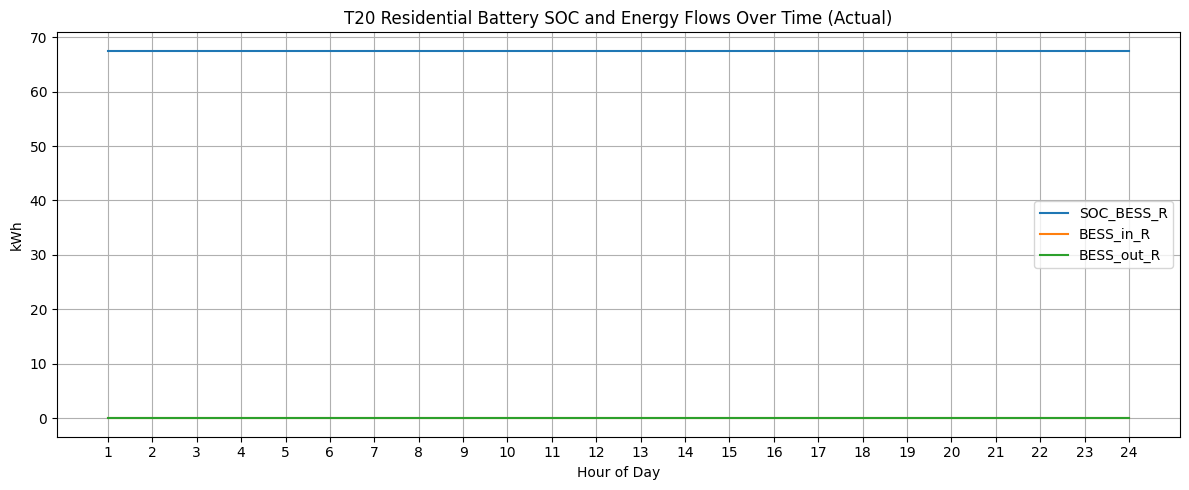

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

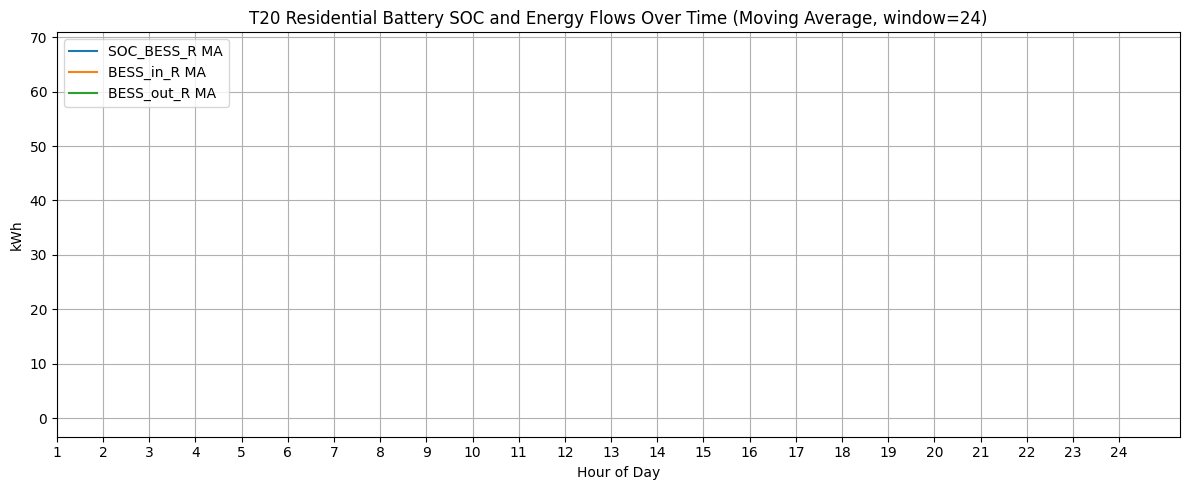

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Residential Battery (BESS_W) ---
if bess_R == 1:
    soc_r_vals = np.array([value(modelv1.SOC_BESS_R[t]) for t in timesteps])[mask]
    bess_in_r_vals = np.array([value(modelv1.BESS_in_R[t]) for t in timesteps])[mask]
    bess_out_r_vals = np.array([value(modelv1.BESS_out_R[t]) for t in timesteps])[mask]

    plot_series(
        filtered_dates,
        {'SOC_BESS_R': soc_r_vals, 'BESS_in_R': bess_in_r_vals, 'BESS_out_R': bess_out_r_vals},
        f'{name} Residential Battery SOC and Energy Flows Over Time',
        window=24  # optional moving average
    )

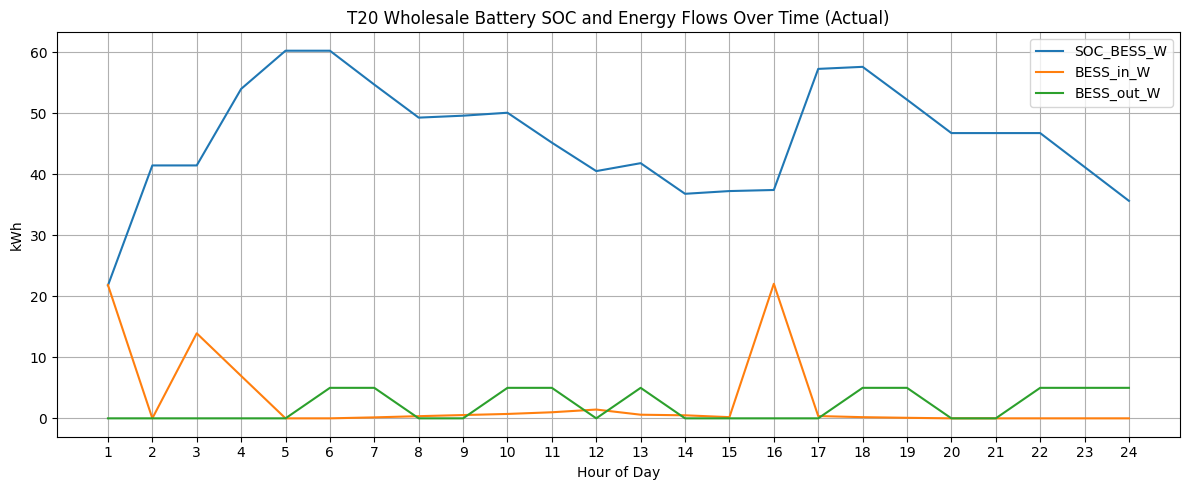

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

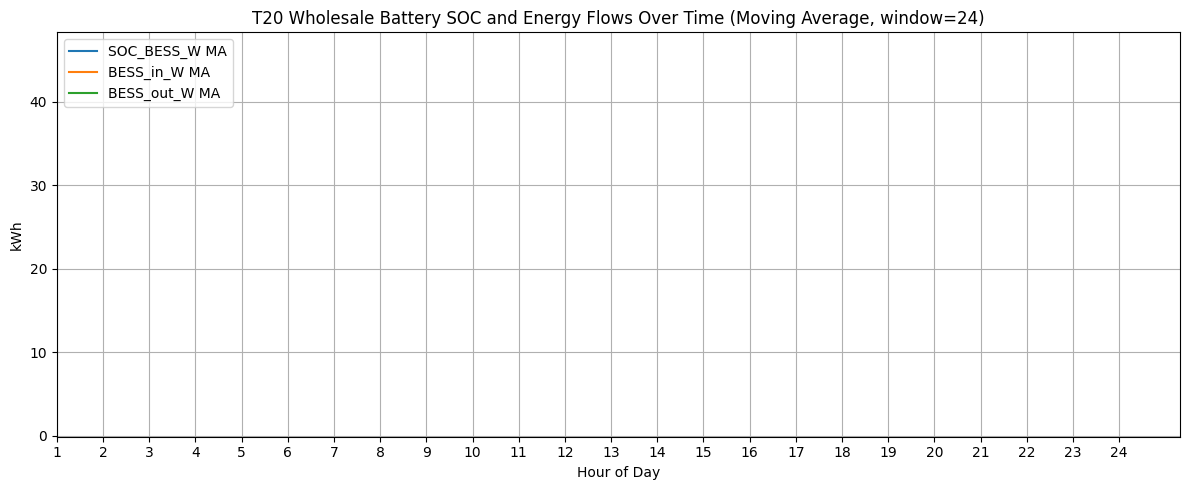

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Wholesale Battery (BESS_W) ---
if bess_W == 1:
    soc_w_vals = np.array([value(modelv1.SOC_BESS_W[t]) for t in timesteps])[mask]
    bess_in_w_vals = np.array([value(modelv1.BESS_in_W[t]) for t in timesteps])[mask]
    bess_out_w_vals = np.array([value(modelv1.BESS_out_W[t]) for t in timesteps])[mask]

    plot_series(
        filtered_dates,
        {'SOC_BESS_W': soc_w_vals, 'BESS_in_W': bess_in_w_vals, 'BESS_out_W': bess_out_w_vals},
        f'{name} Wholesale Battery SOC and Energy Flows Over Time',
        window=24  # optional moving average
    )

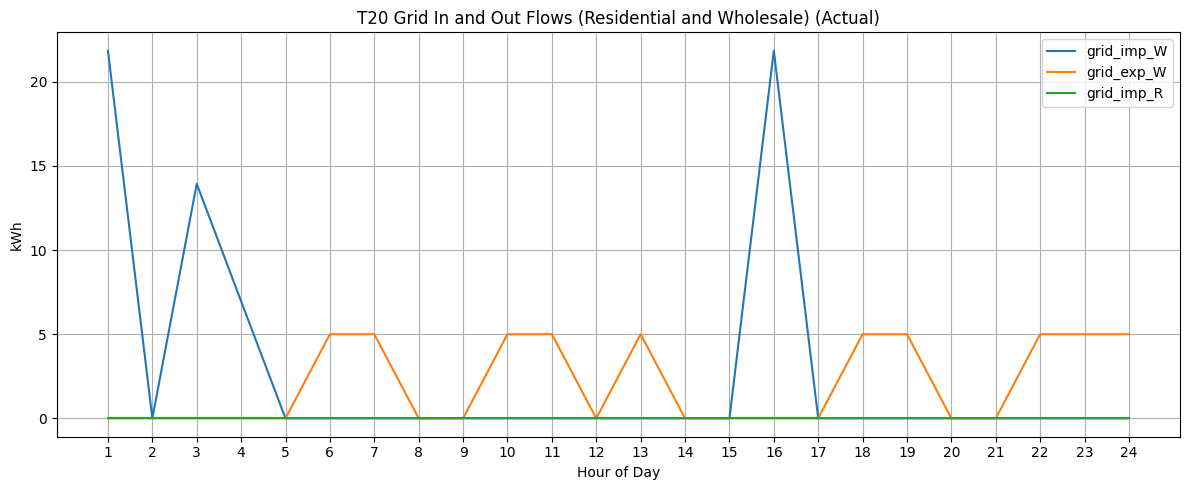

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

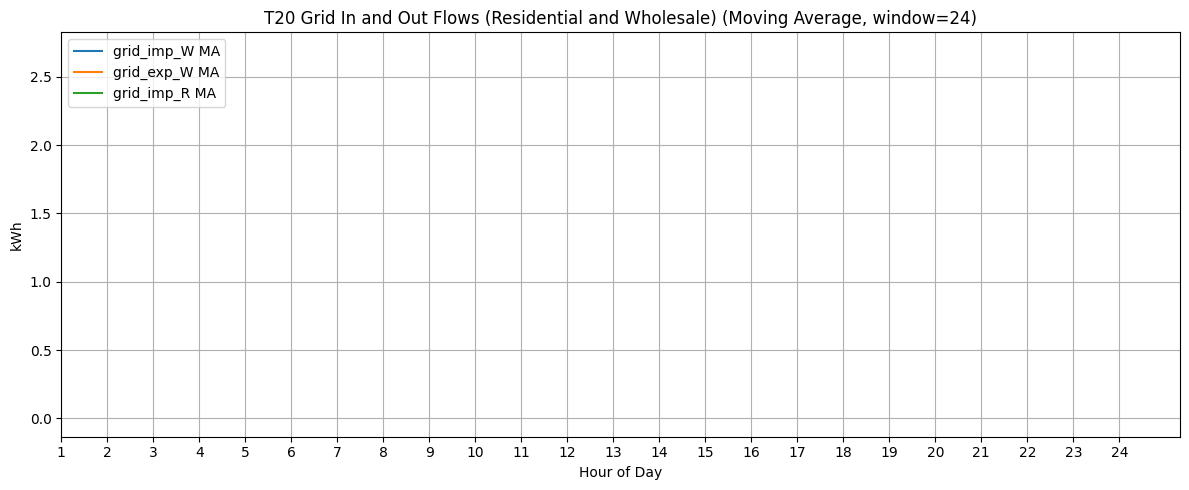

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Grid In/Out Flows ---
grid_imp_W_vals = np.array([value(modelv1.grid_imp_W[t]) for t in timesteps])[mask]
grid_exp_W_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
grid_imp_R_vals = np.array([value(modelv1.grid_imp_R[t]) for t in timesteps])[mask]

plot_series(
    filtered_dates,
    {'grid_imp_W': grid_imp_W_vals, 'grid_exp_W': grid_exp_W_vals, 'grid_imp_R': grid_imp_R_vals},
    f'{name} Grid In and Out Flows (Residential and Wholesale)',
    window = 24
)

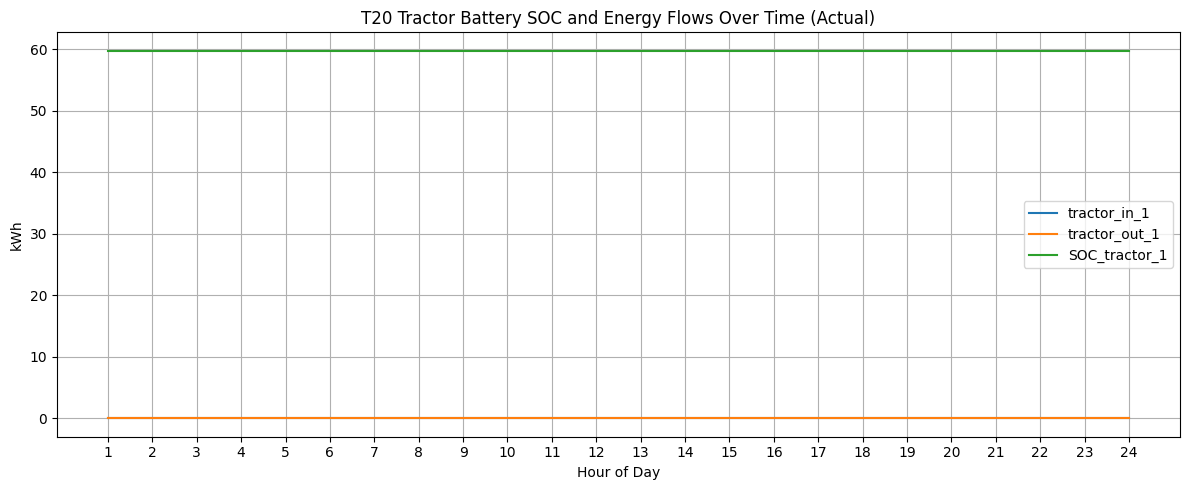

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

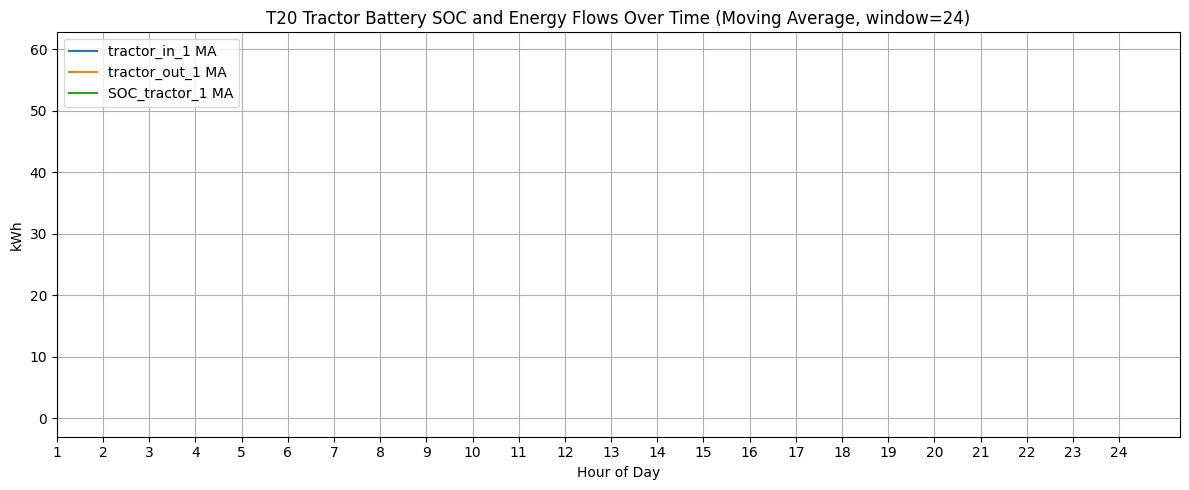

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Tractor Batteries ---
tractor_series = {}
for n in modelv1.N:
    tractor_series[f'tractor_in_{n}'] = np.array([value(modelv1.tractor_in[t,n]) for t in timesteps])[mask]
    tractor_series[f'tractor_out_{n}'] = np.array([value(modelv1.tractor_out[t,n]) for t in timesteps])[mask]
    tractor_series[f'SOC_tractor_{n}'] = np.array([value(modelv1.SOC_tractor[t,n]) for t in timesteps])[mask]

plot_series(
    filtered_dates,
    tractor_series,
    f'{name} Tractor Battery SOC and Energy Flows Over Time',
    window=24
)

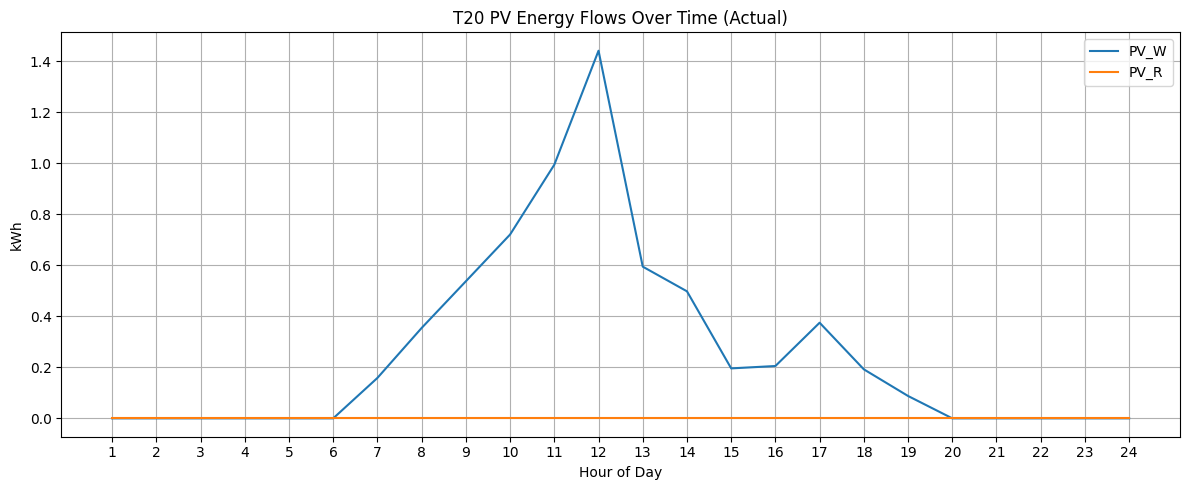

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

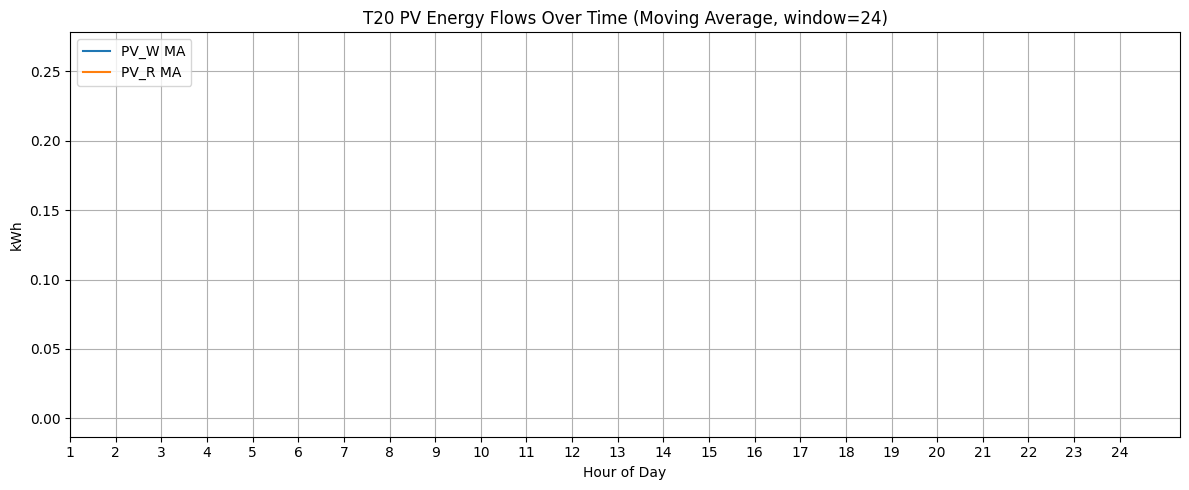

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- PV Energy Flows ---
if pv == 1:
    pv_W_vals = np.array([value(modelv1.PV_W[t]) for t in timesteps])[mask]
    pv_R_vals = np.array([value(modelv1.PV_R[t]) for t in timesteps])[mask]

    plot_series(
        filtered_dates,
        {'PV_W': pv_W_vals, 'PV_R': pv_R_vals},
        f'{name} PV Energy Flows Over Time',
        window=24
    )


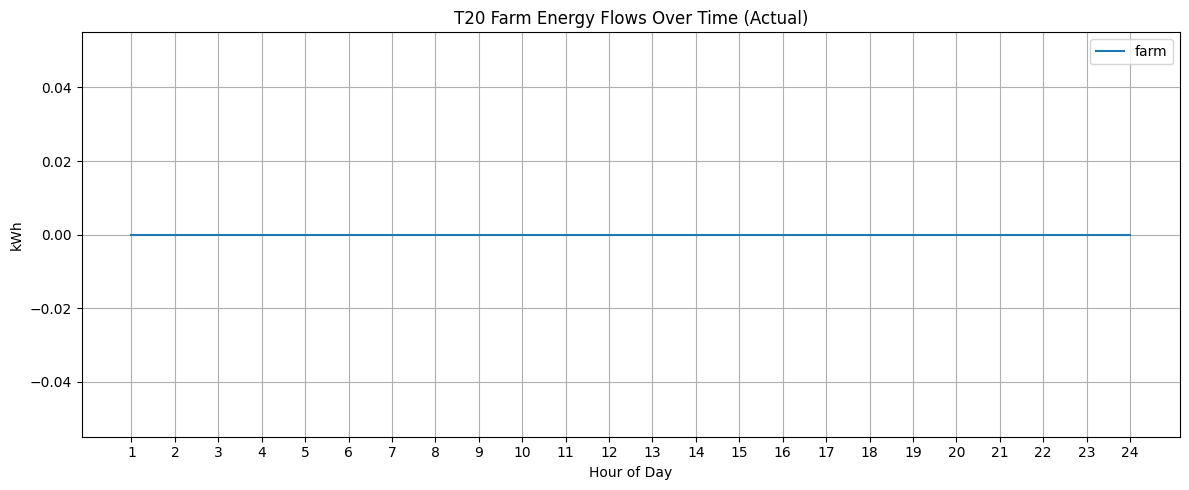

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

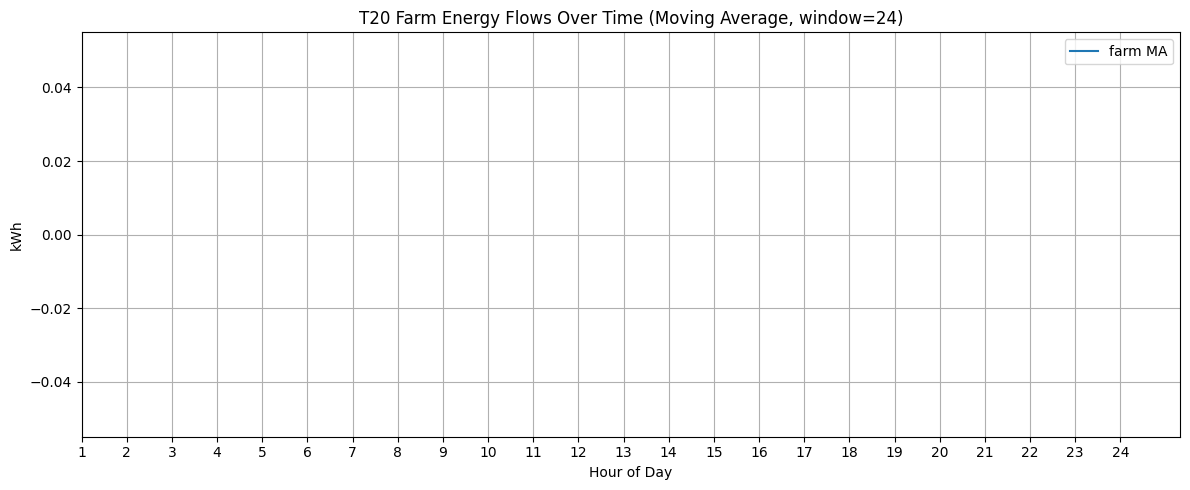

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- Farm Energy ---
farm_vals = np.array([value(modelv1.farm[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'farm': farm_vals}, f'{name} Farm Energy Flows Over Time', window=24)

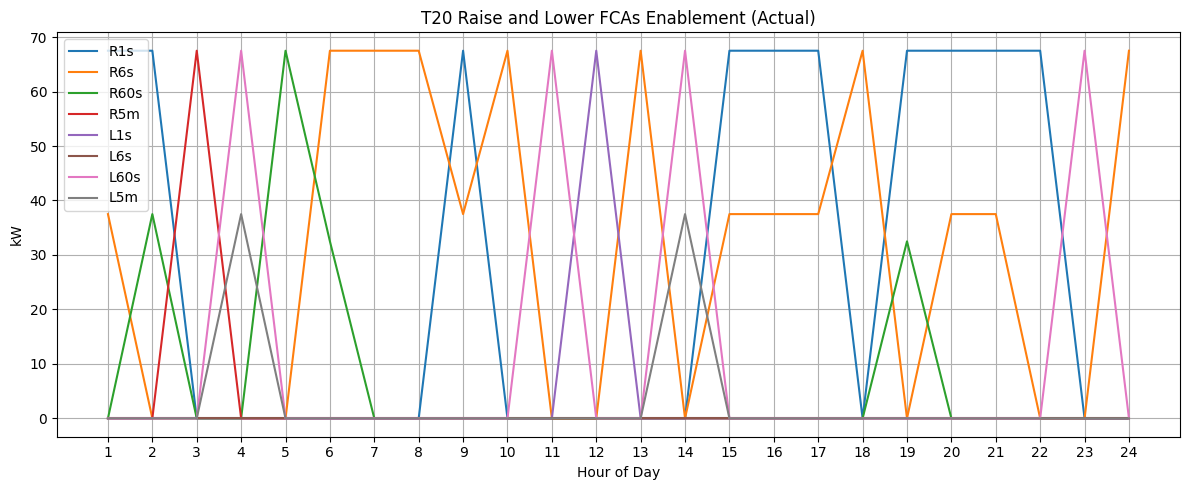

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

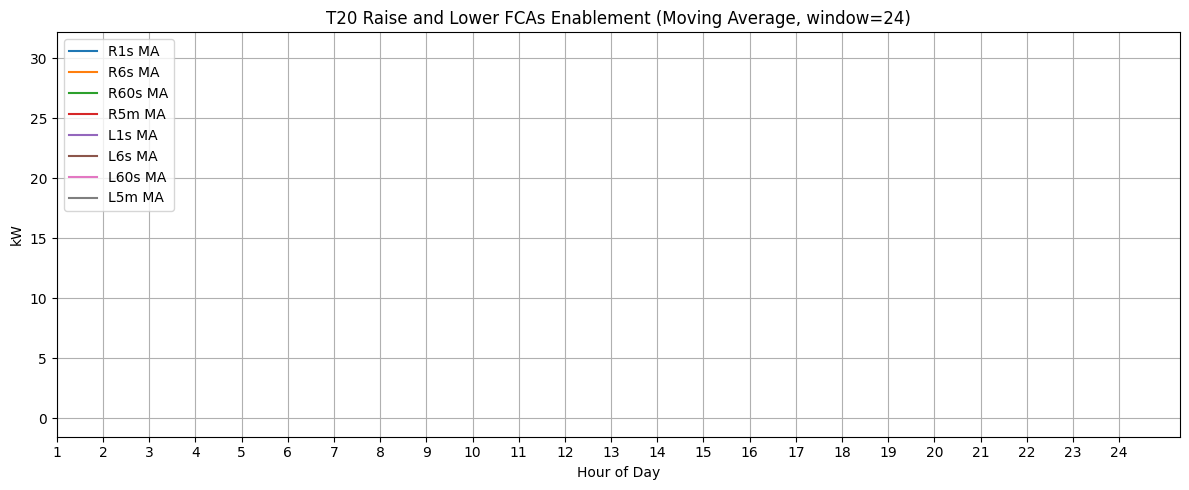

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

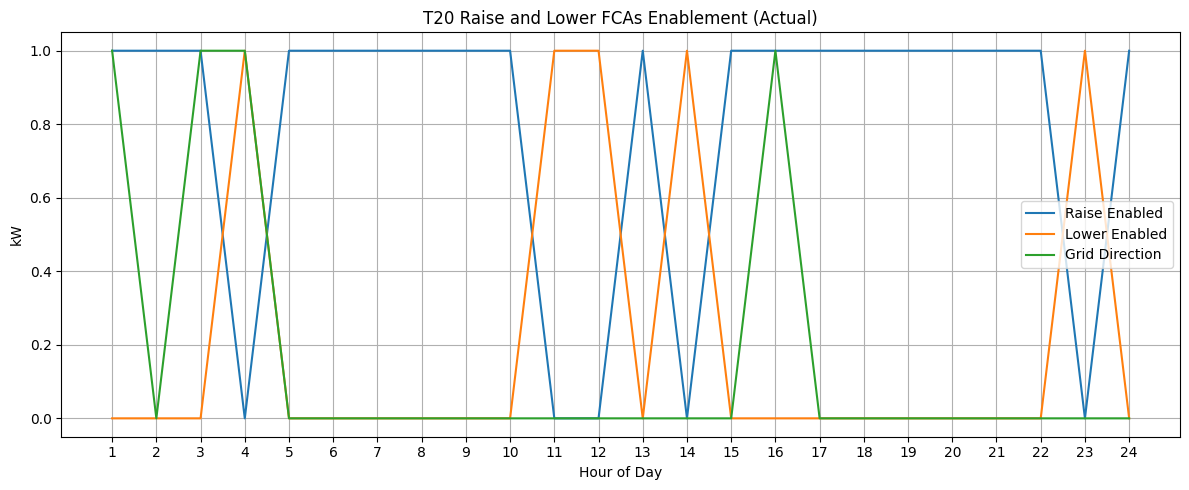

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

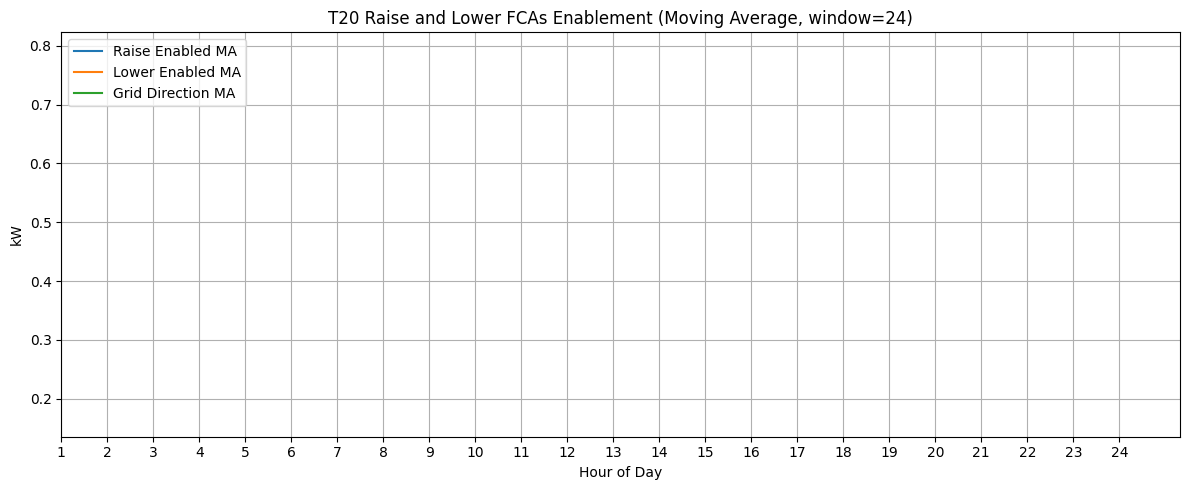

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- FCAS Enablement ---
if fcas == 1:
    fcas_series = {
        'R1s': np.array([value(modelv1.f_R1s[t]) for t in timesteps])[mask],
        'R6s': np.array([value(modelv1.f_R6s[t]) for t in timesteps])[mask],
        'R60s': np.array([value(modelv1.f_R60s[t]) for t in timesteps])[mask],
        'R5m': np.array([value(modelv1.f_R5m[t]) for t in timesteps])[mask],
        'L1s': np.array([value(modelv1.f_L1s[t]) for t in timesteps])[mask],
        'L6s': np.array([value(modelv1.f_L6s[t]) for t in timesteps])[mask],
        'L60s': np.array([value(modelv1.f_L60s[t]) for t in timesteps])[mask],
        'L5m': np.array([value(modelv1.f_L5m[t]) for t in timesteps])[mask]
    }
    plot_series(filtered_dates, fcas_series, f'{name} Raise and Lower FCAs Enablement', ylabel='kW', window=24)

    z_series = {
        'Raise Enabled': np.array([value(modelv1.z_raise[t]) for t in timesteps])[mask],
        'Lower Enabled': np.array([value(modelv1.z_lower[t]) for t in timesteps])[mask],
        'Grid Direction': np.array([value(modelv1.grid_dir[t]) for t in timesteps])[mask]
    }
    plot_series(filtered_dates, z_series, f'{name} Raise and Lower FCAs Enablement', ylabel='kW',window=24)

# V-01

In [ ]:
# Testing for V-01
ele_plan_vals = excel_ele_plan.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'price': ele_plan_vals}, f'{name} Electricity Plan Prices', window=24)

# V-04

In [ ]:
# Testing for V-04
PV_gen_vals = excel_PV.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'kWh': PV_gen_vals}, f'{name} PV Generation', window=24)

# V-06

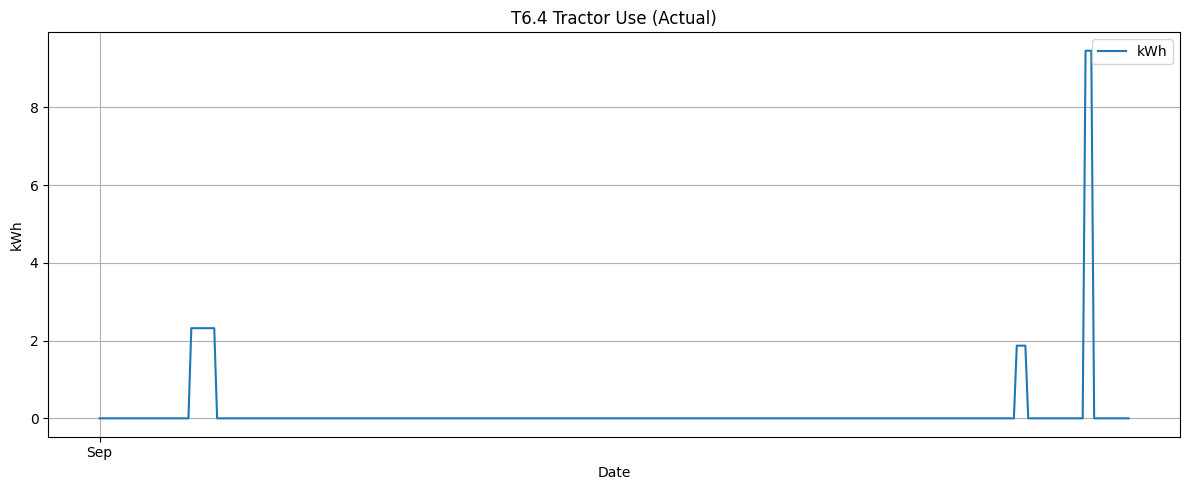

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

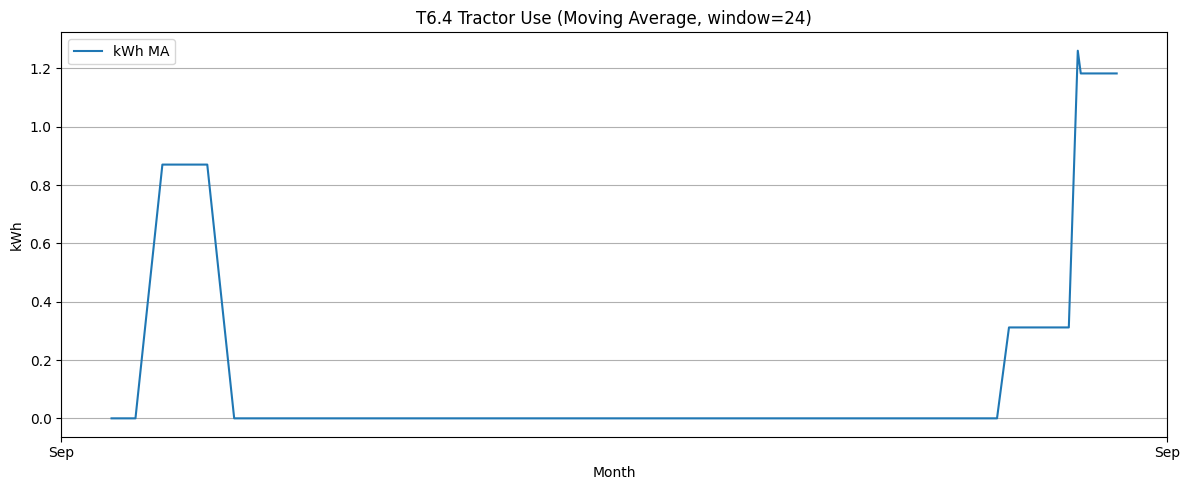

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-06
tractor_use_vals = excel_tractor_use.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'kWh': tractor_use_vals}, f'{name} Tractor Use', window=24)

# V-07

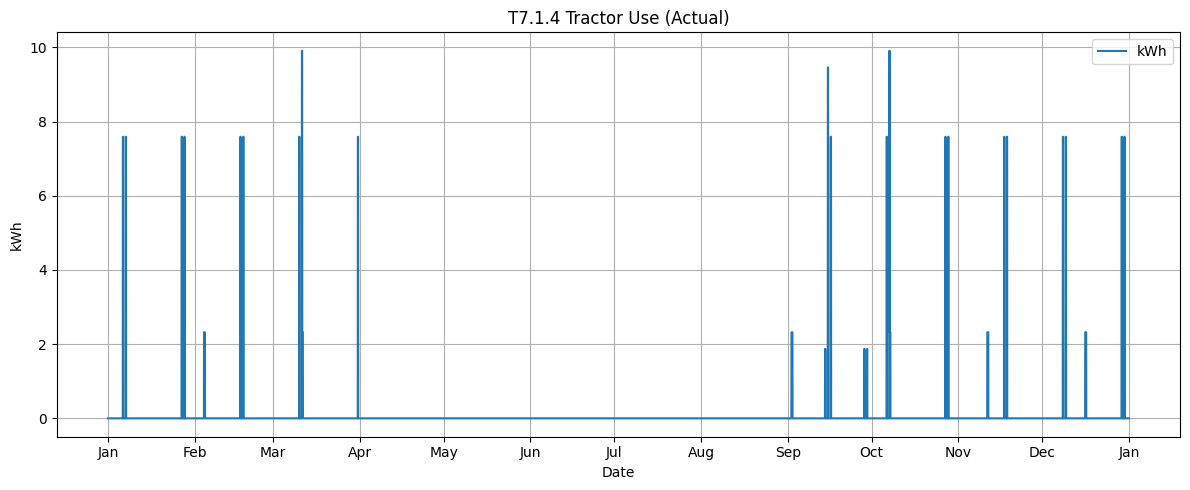

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

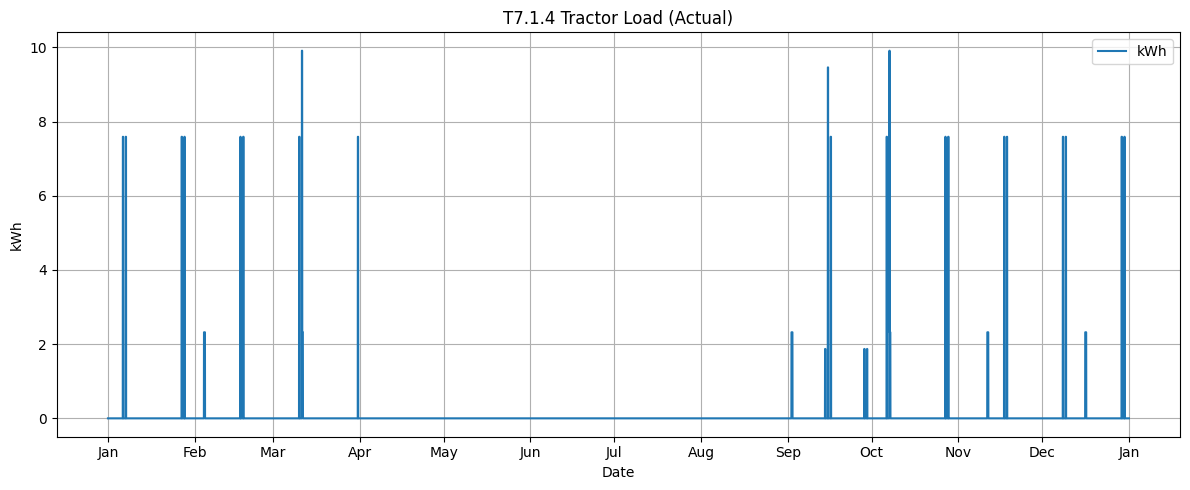

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-07
tractor_use_vals = excel_tractor_use.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'kWh': tractor_use_vals}, f'{name} Tractor Use', window=None)
tractor_load_vals = np.array([value(modelv1.tractor_load[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': tractor_load_vals}, f'{name} Tractor Load', window=None)

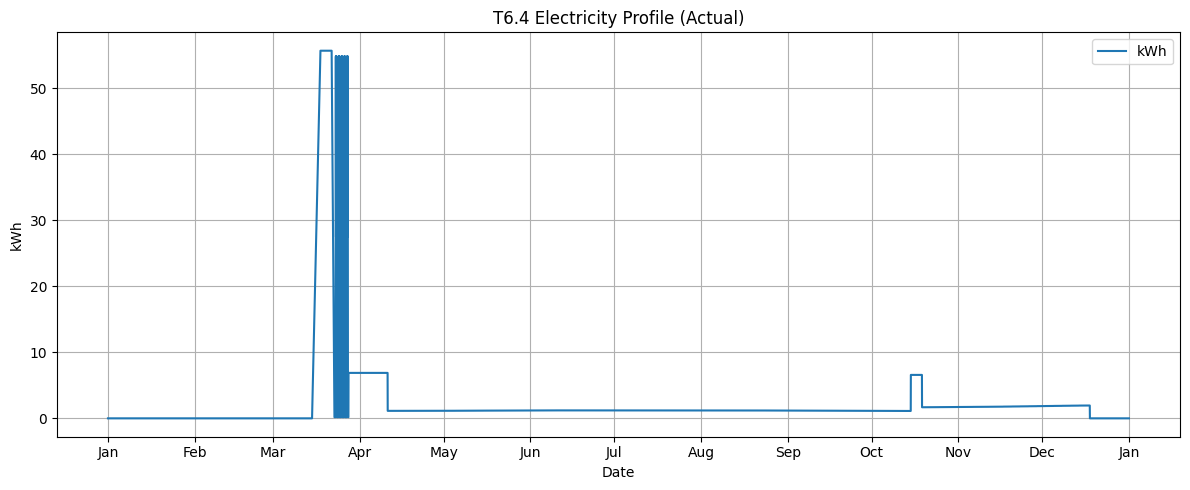

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

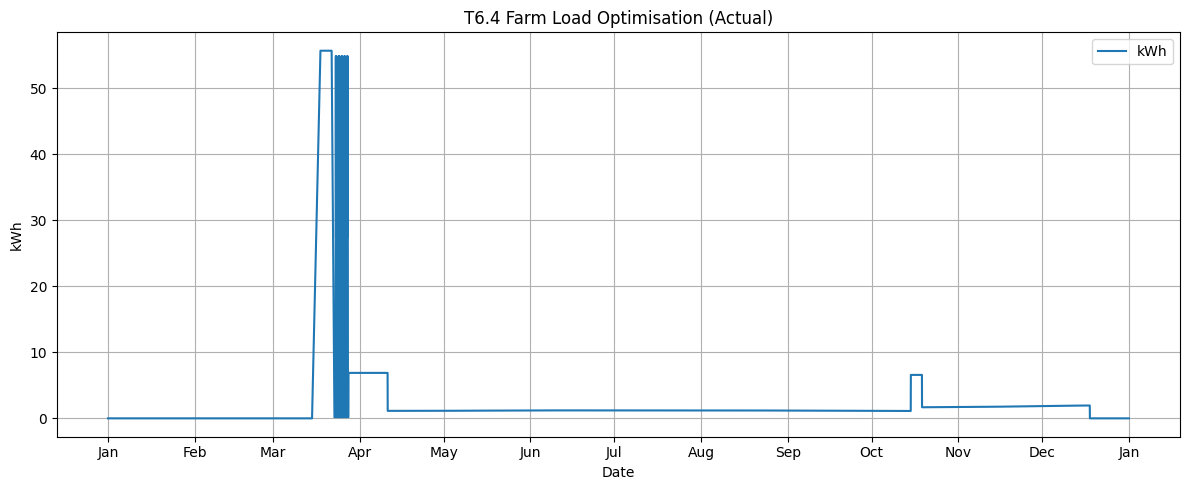

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

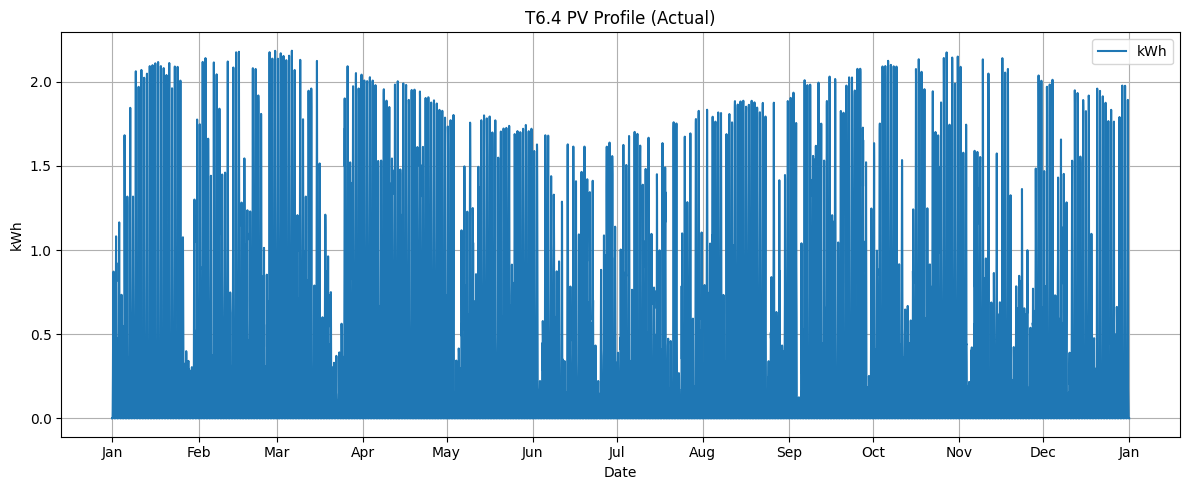

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

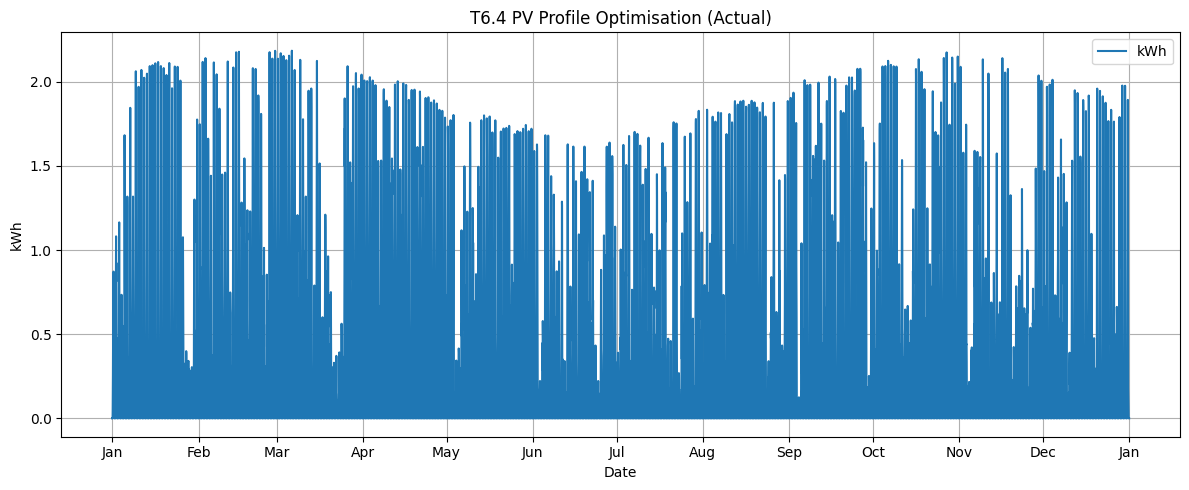

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

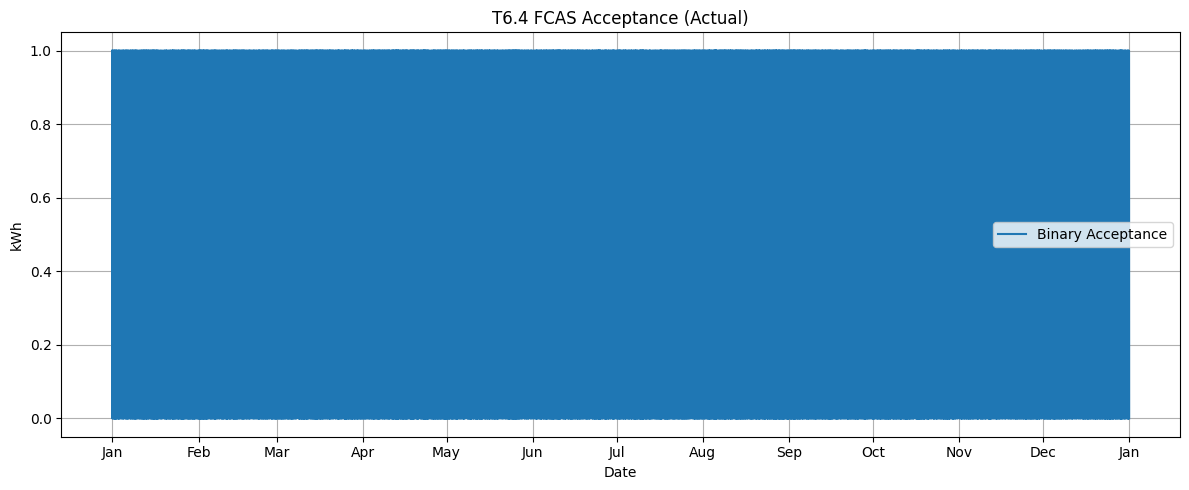

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

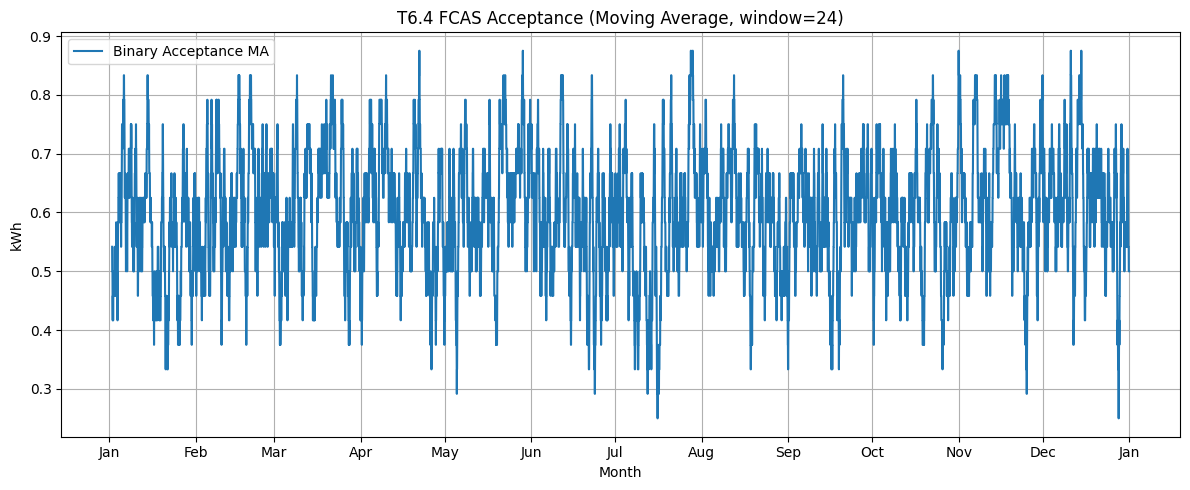

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

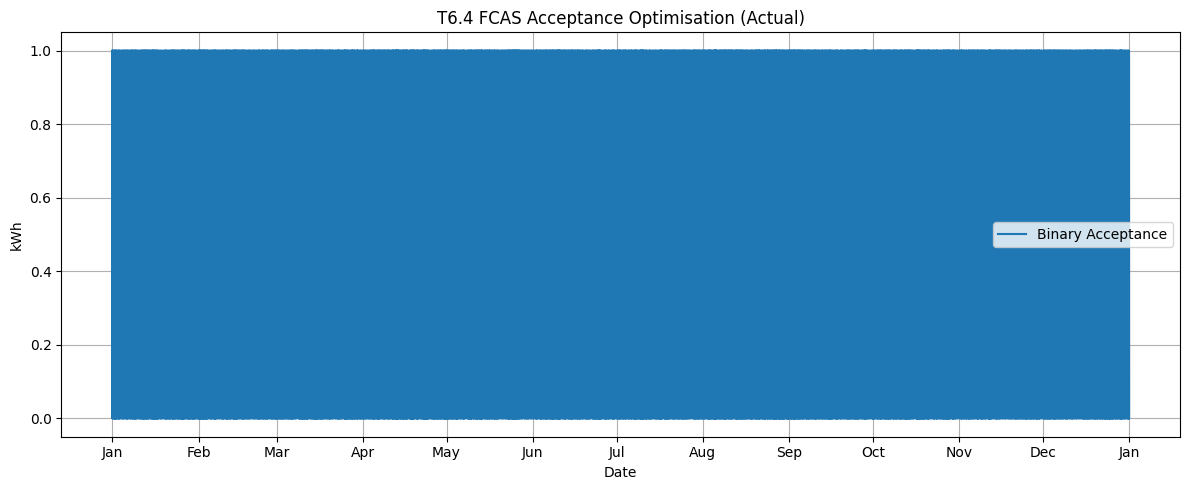

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

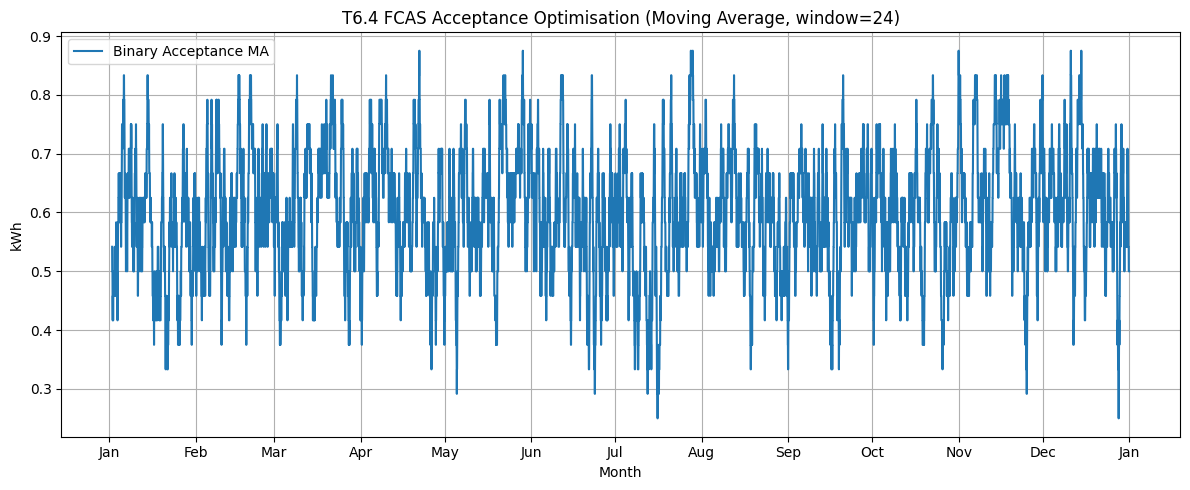

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

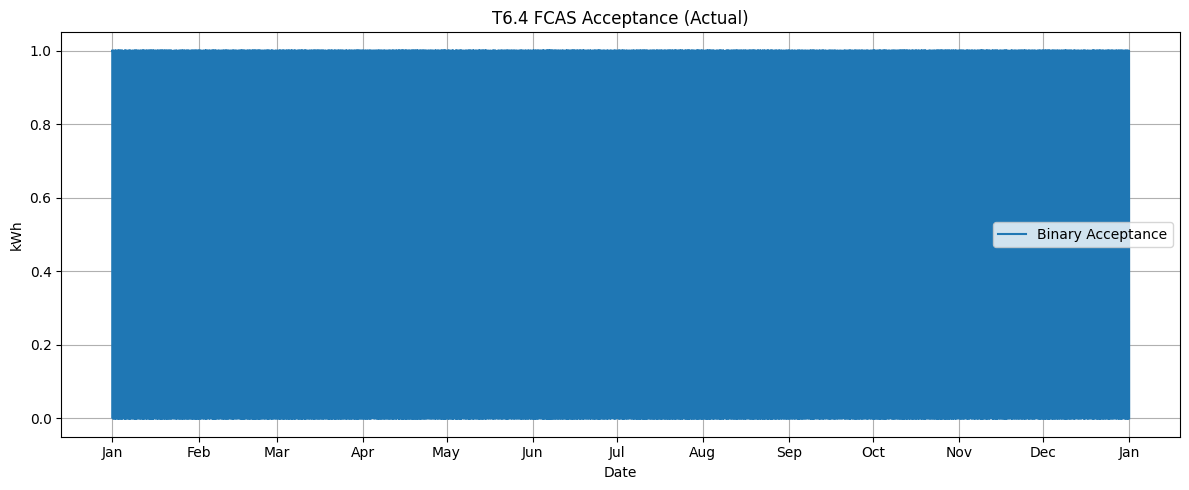

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

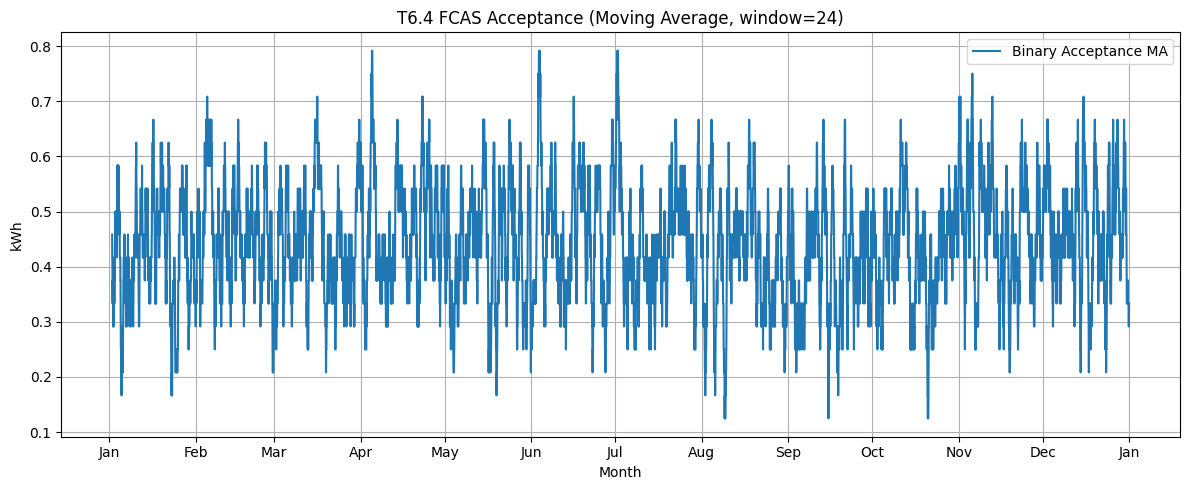

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

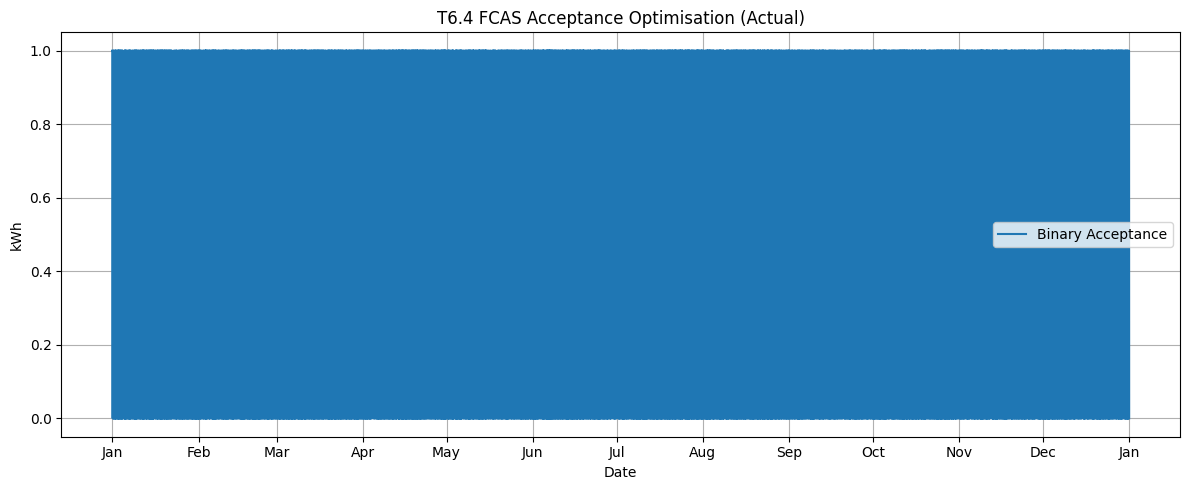

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

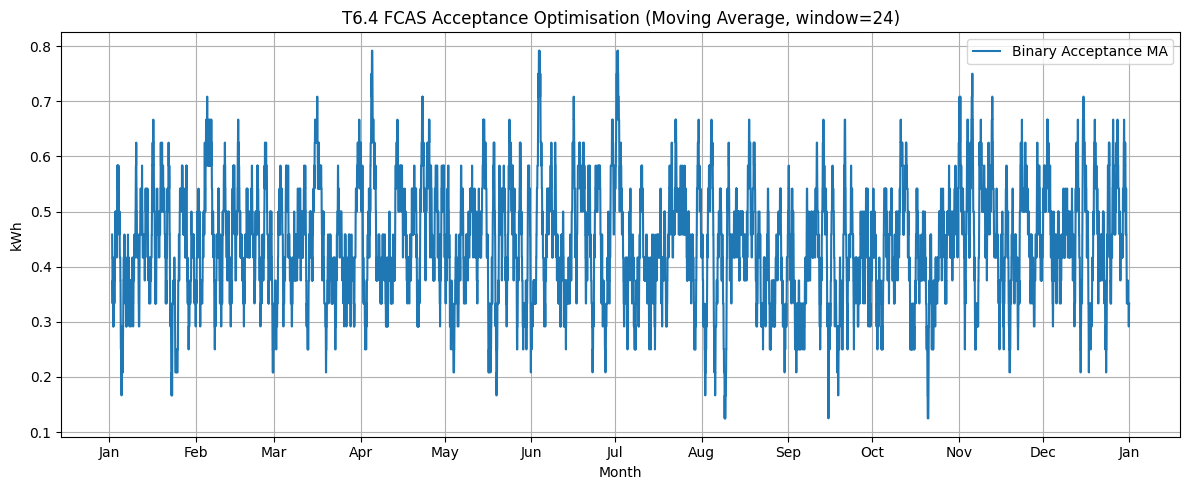

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

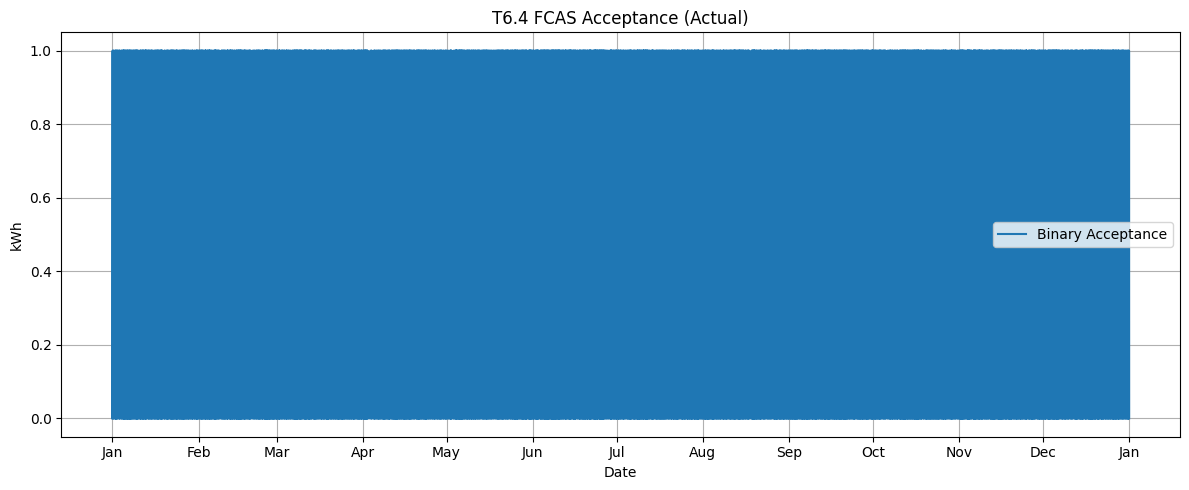

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

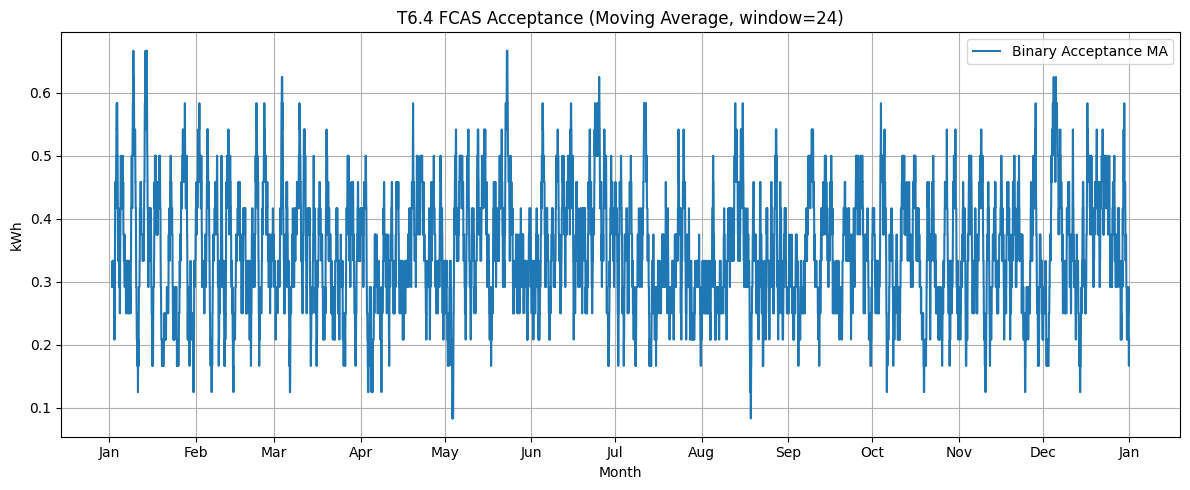

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

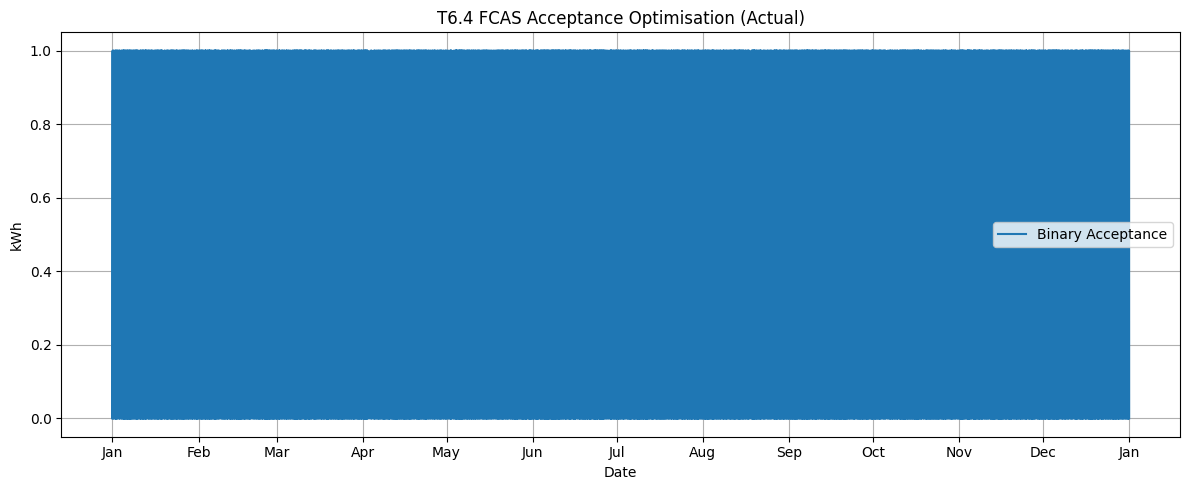

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

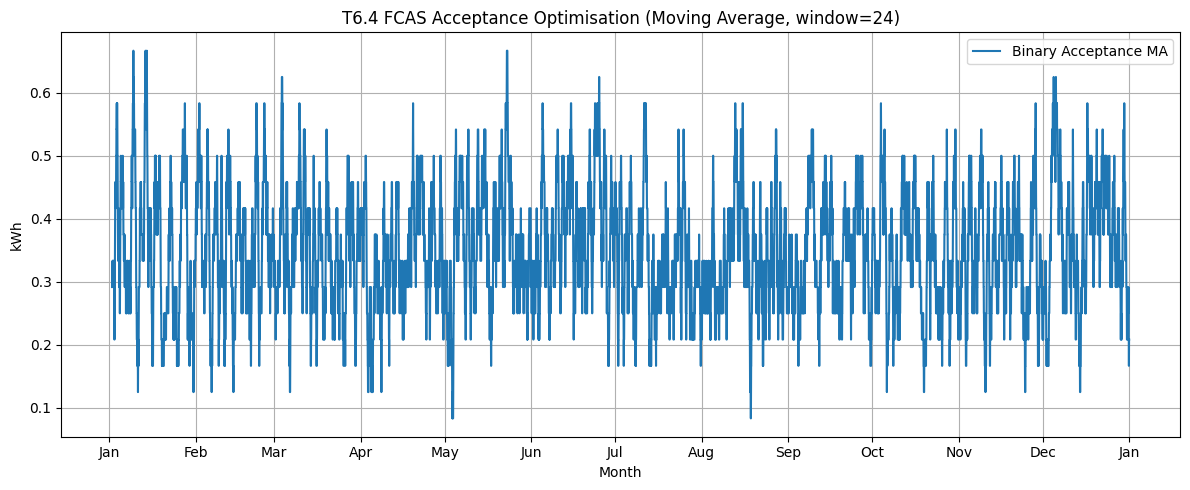

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

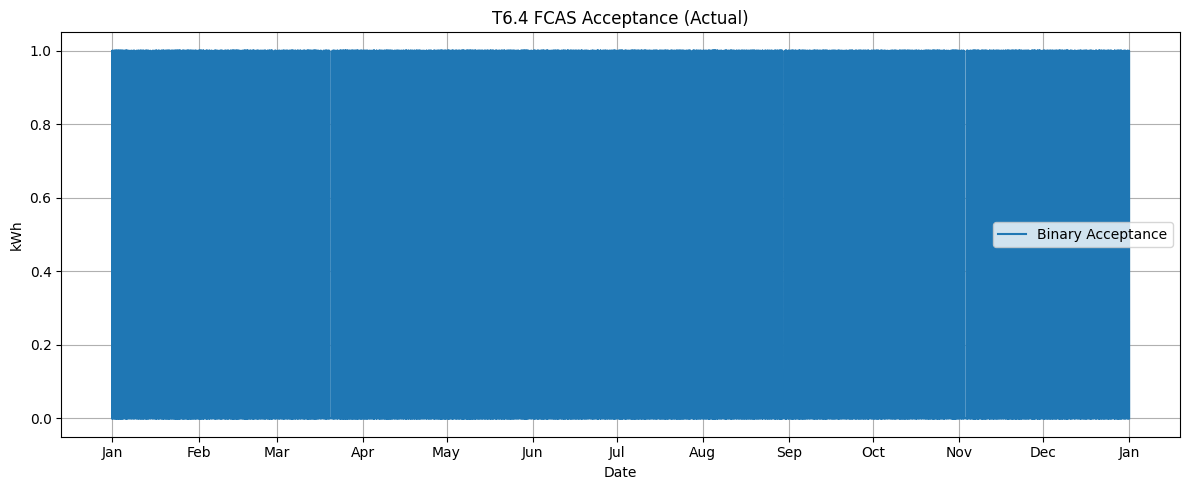

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

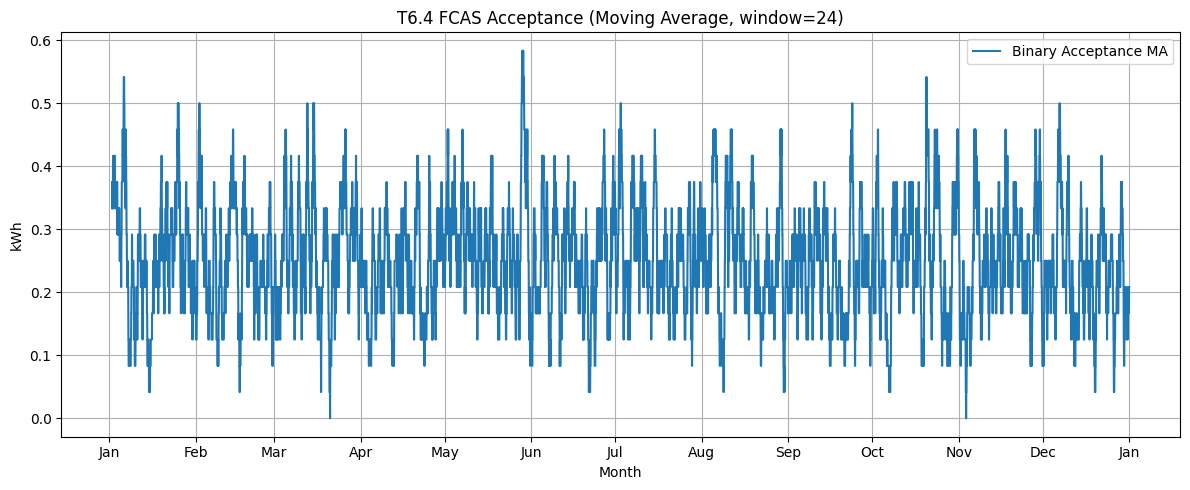

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

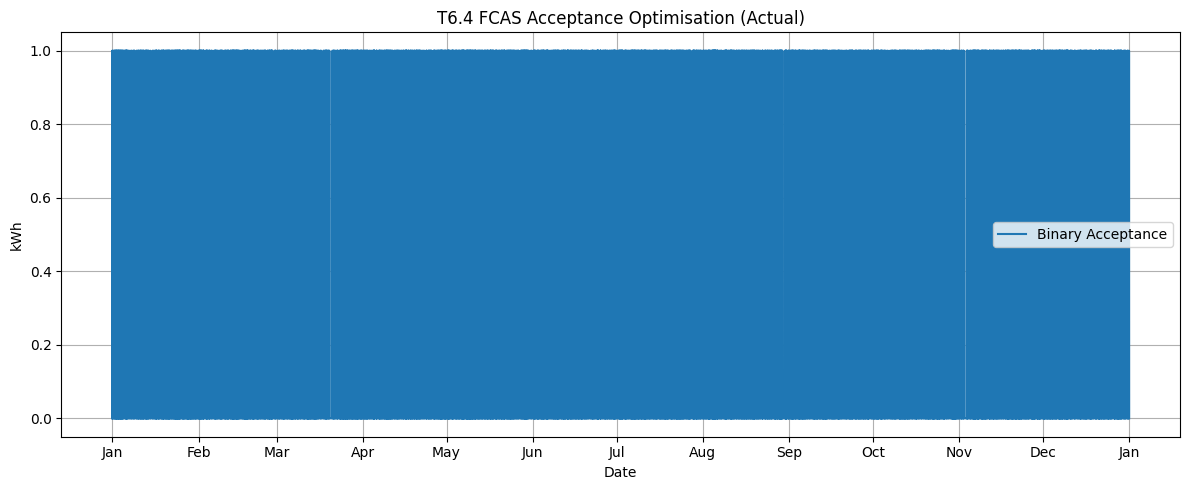

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

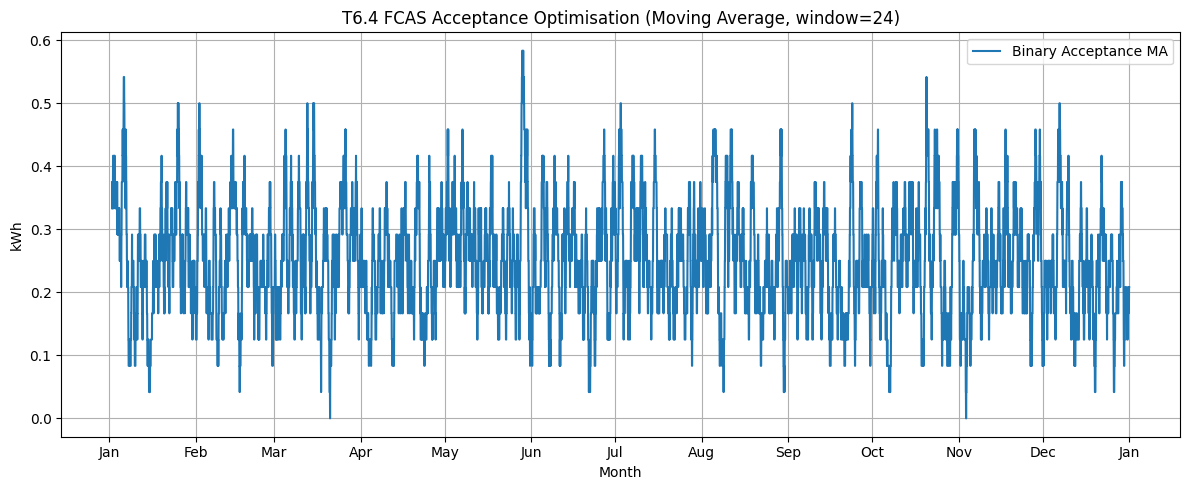

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

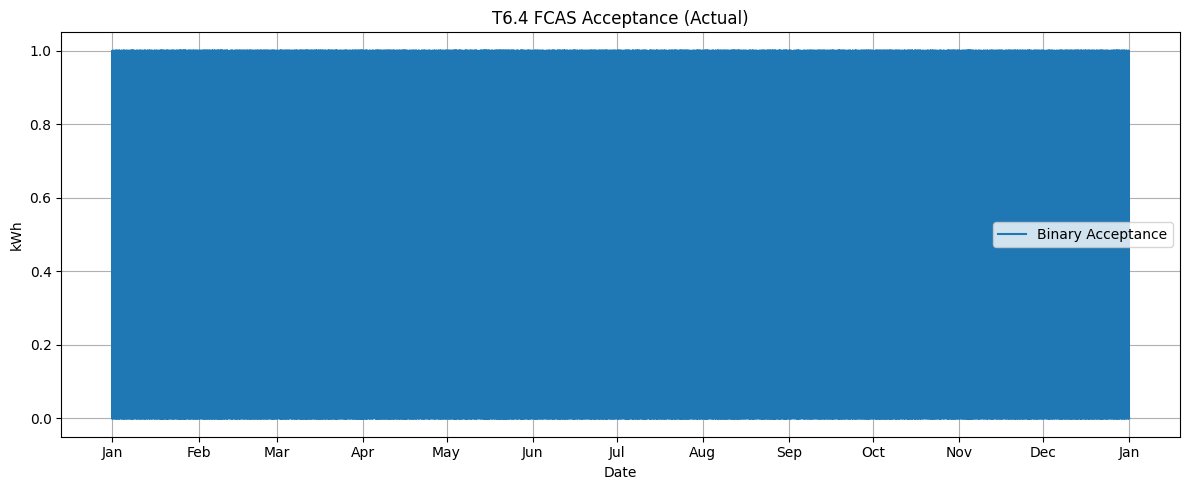

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

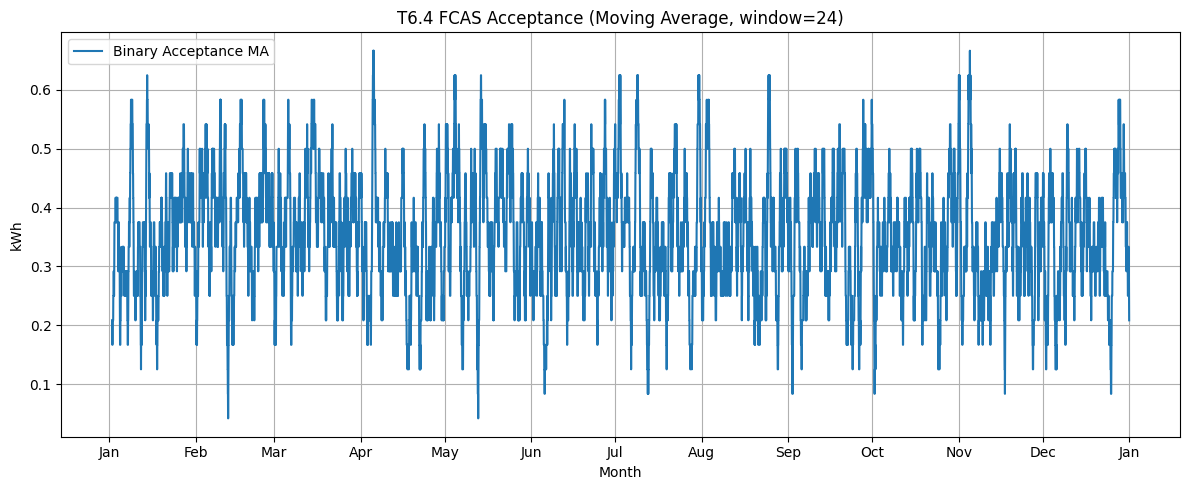

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

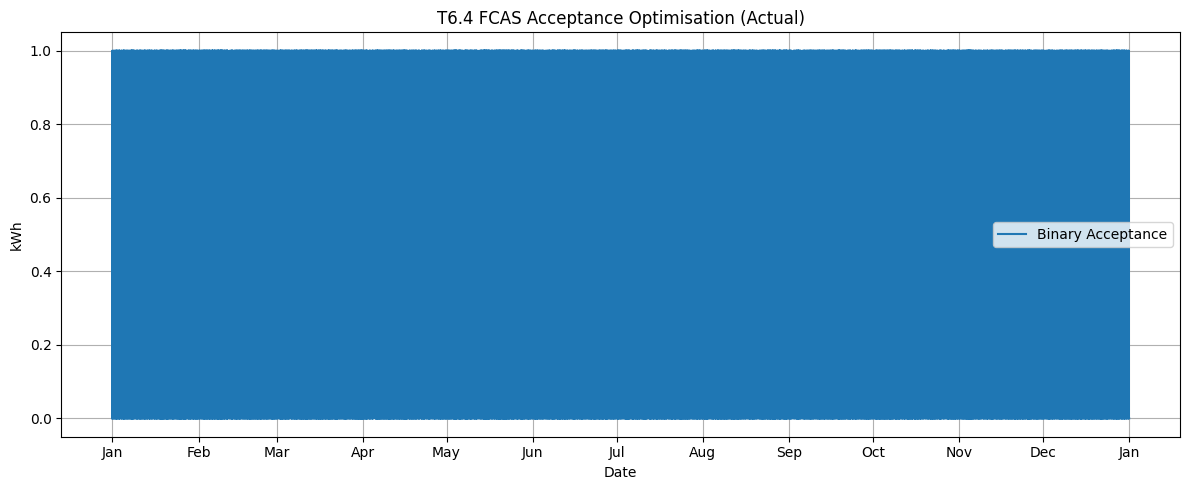

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

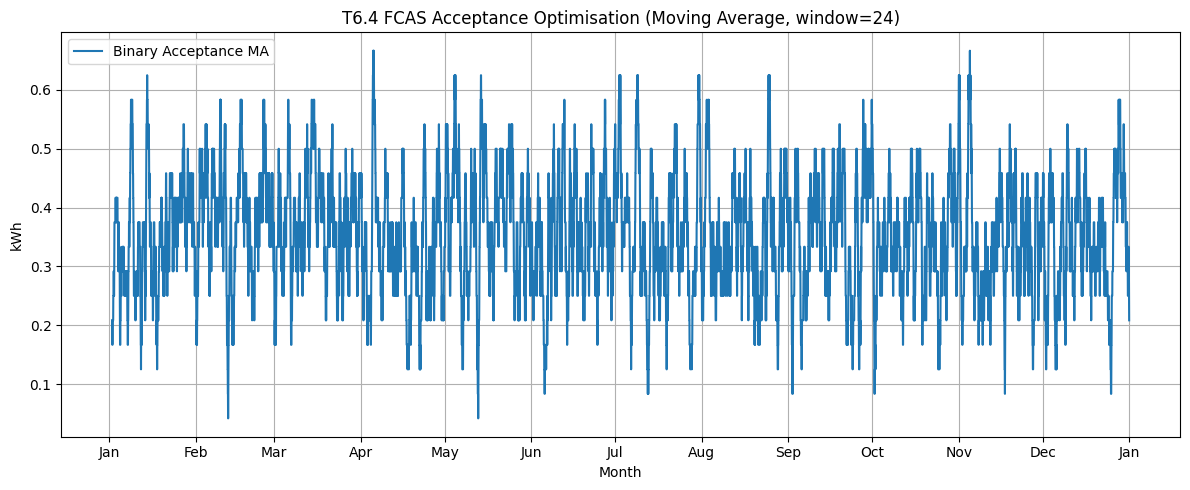

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

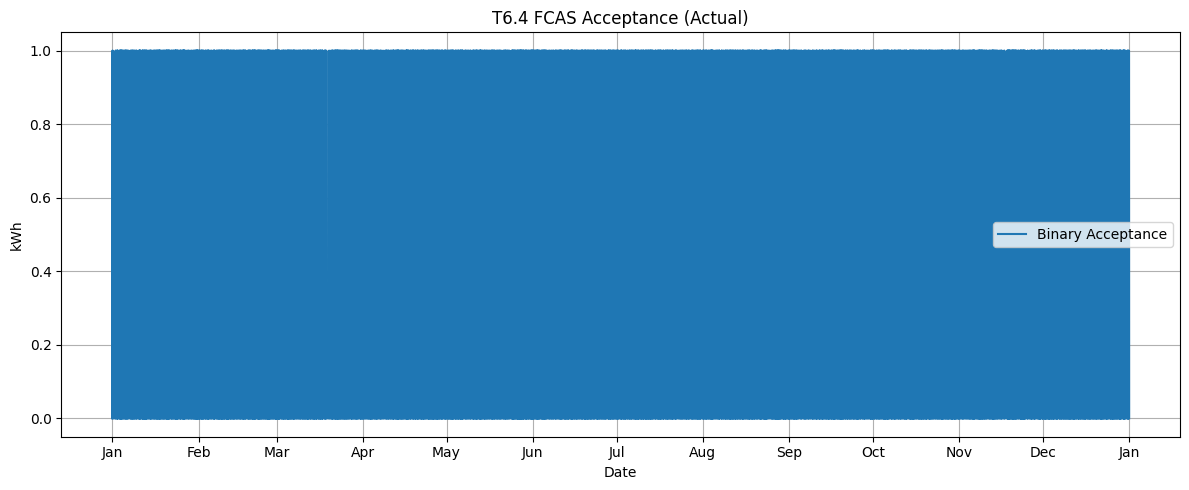

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

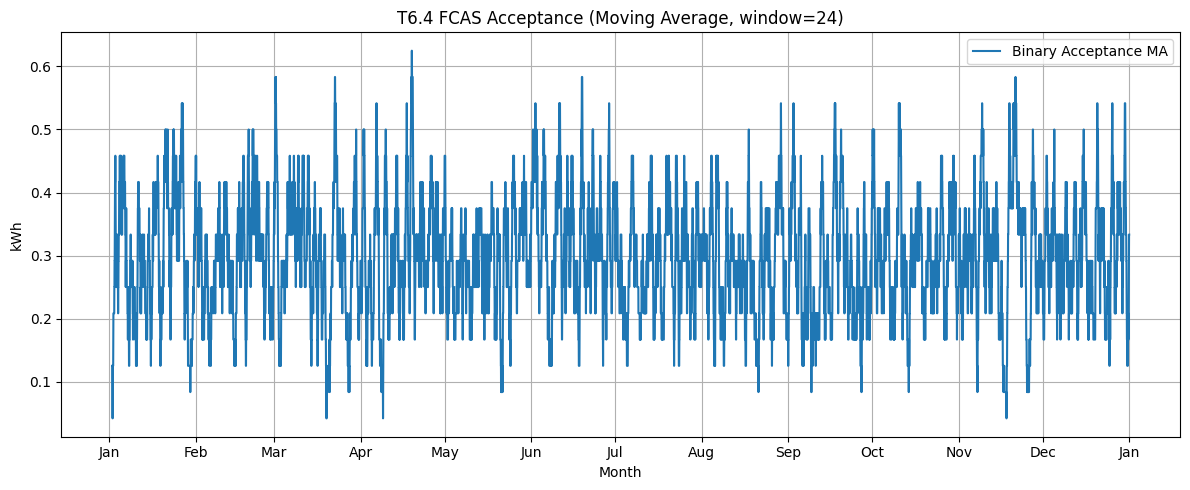

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

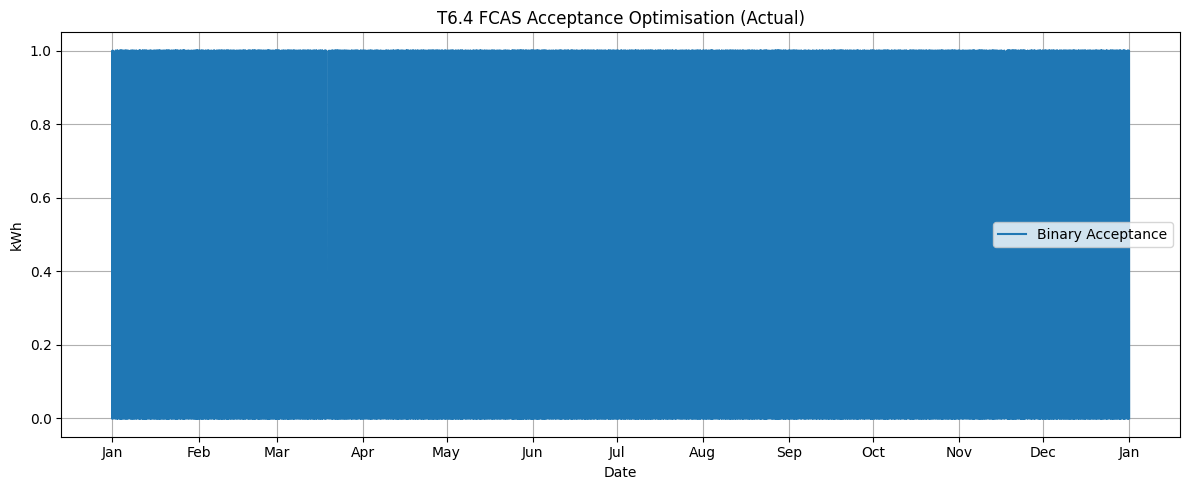

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

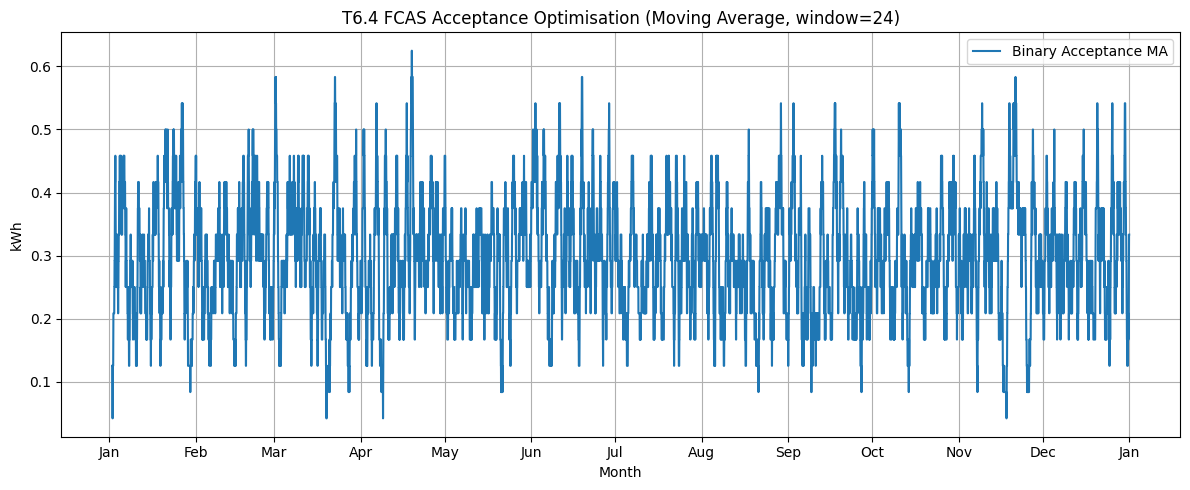

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

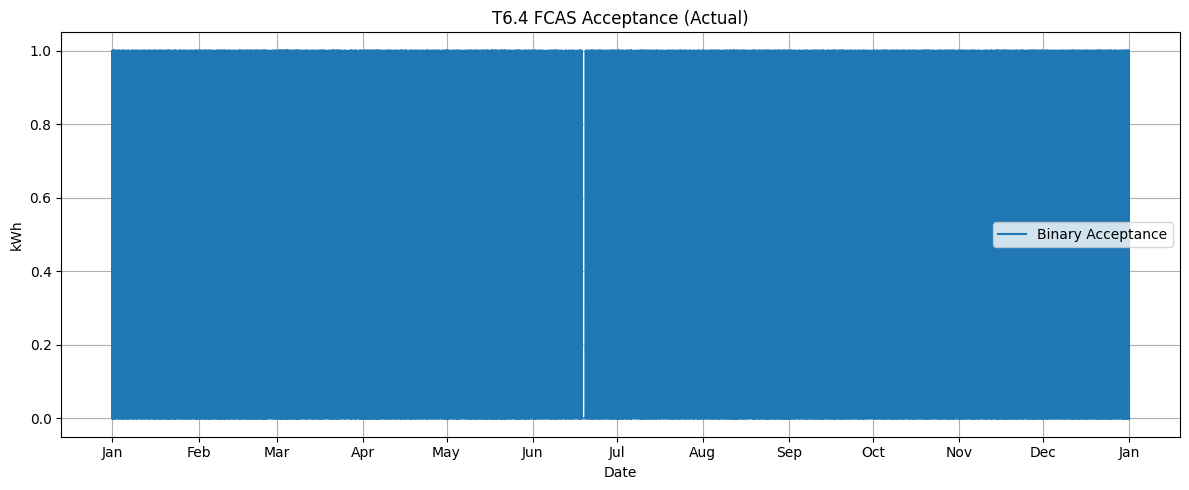

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

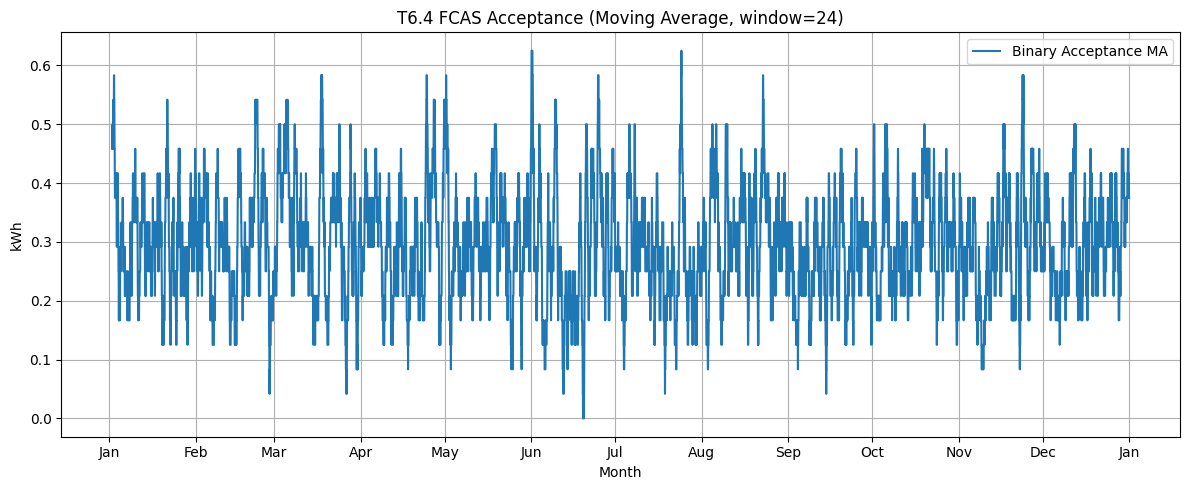

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

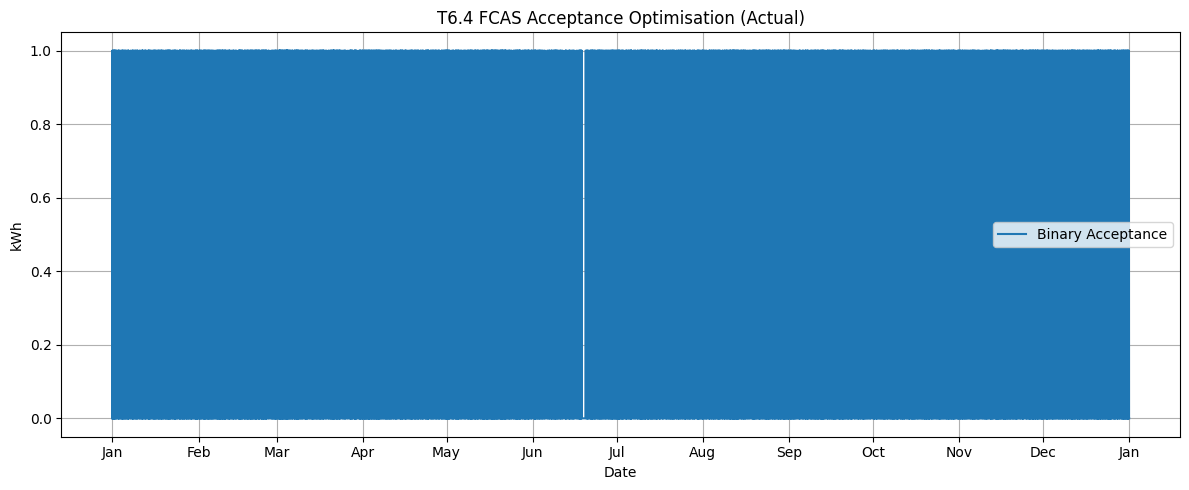

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

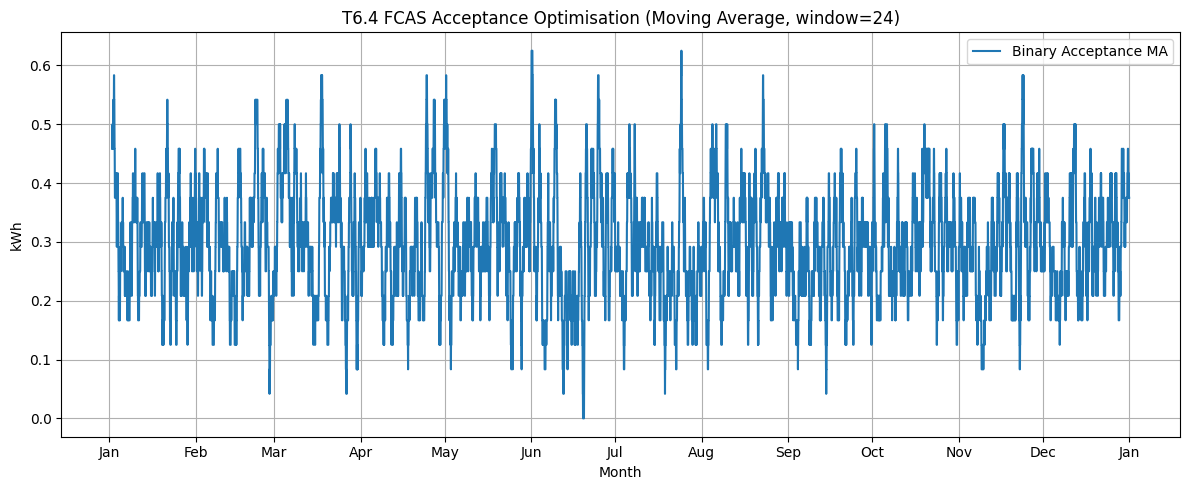

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

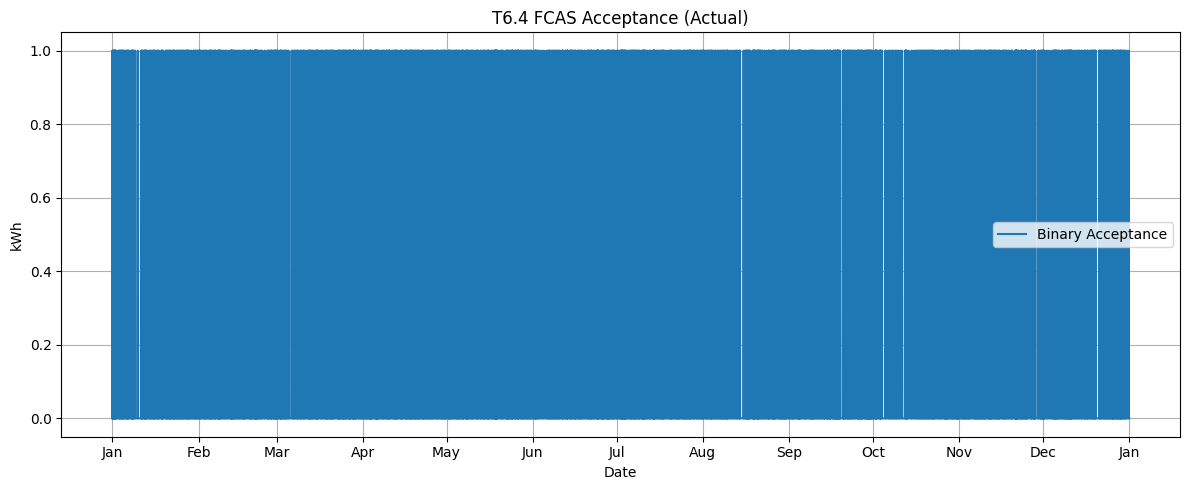

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

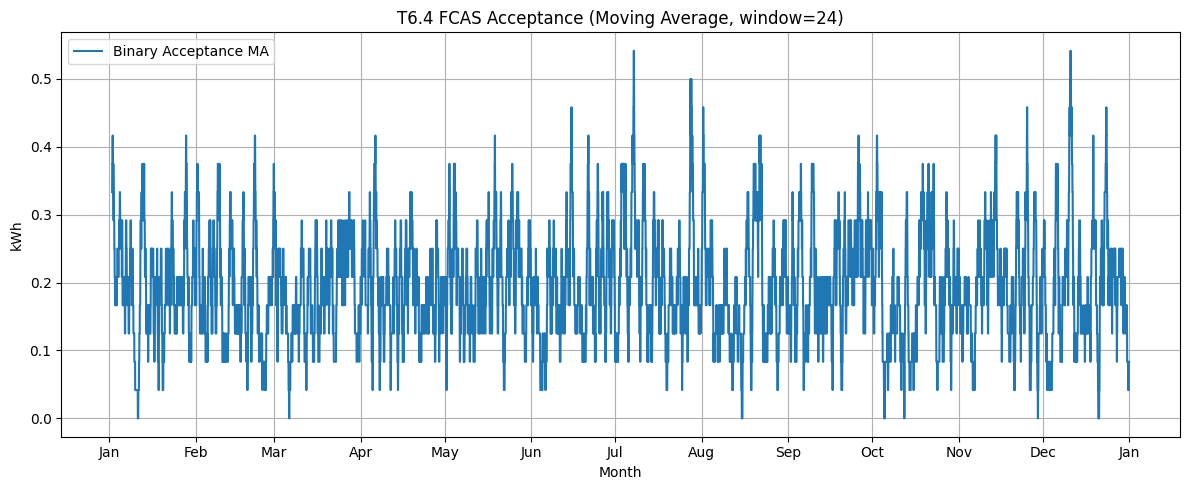

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

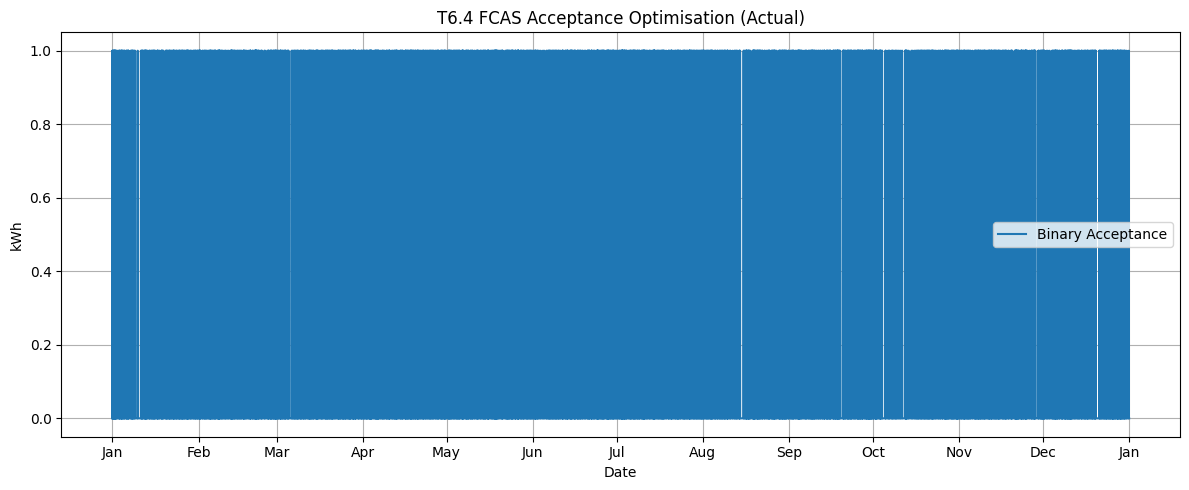

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

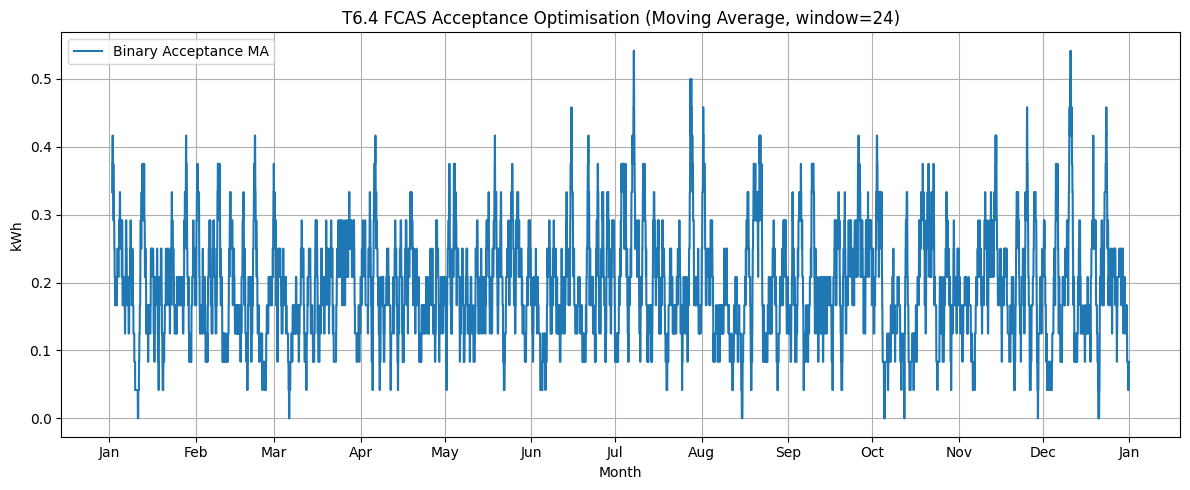

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# T7.2
ele_profile_vals = excel_ele_profile.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'kWh': ele_profile_vals}, f'{name} Electricity Profile', window=None)
farm_load_vals = np.array([value(modelv1.farm_load[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': farm_load_vals}, f'{name} Farm Load Optimisation', window=None)

# T7.3
PV_profile_vals = excel_PV.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'kWh': PV_profile_vals}, f'{name} PV Profile', window=None)
PV_vals = np.array([value(modelv1.PV[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': PV_vals}, f'{name} PV Profile Optimisation', window=None)

# T7.4
acc_R1_vals = acc_raise_1s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_R1_vals}, f'{name} FCAS Acceptance', window=24)
e_R1_vals = np.array([value(modelv1.e_R1s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_R1_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_R6_vals = acc_raise_6s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_R6_vals}, f'{name} FCAS Acceptance', window=24)
e_R6_vals = np.array([value(modelv1.e_R6s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_R6_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_R60_vals = acc_raise_60s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_R60_vals}, f'{name} FCAS Acceptance', window=24)
e_R60_vals = np.array([value(modelv1.e_R60s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_R60_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_R5_vals = acc_raise_5m.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_R5_vals}, f'{name} FCAS Acceptance', window=24)
e_R5_vals = np.array([value(modelv1.e_R5m[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_R5_vals}, f'{name} FCAS Acceptance Optimisation', window=24)

acc_L1_vals = acc_lower_1s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_L1_vals}, f'{name} FCAS Acceptance', window=24)
e_L1_vals = np.array([value(modelv1.e_L1s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_L1_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_L6_vals = acc_lower_6s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_L6_vals}, f'{name} FCAS Acceptance', window=24)
e_L6_vals = np.array([value(modelv1.e_L6s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_L6_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_L60_vals = acc_lower_60s.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_L60_vals}, f'{name} FCAS Acceptance', window=24)
e_L60_vals = np.array([value(modelv1.e_L60s[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_L60_vals}, f'{name} FCAS Acceptance Optimisation', window=24)
acc_L5_vals = acc_lower_5m.iloc[:len(timesteps), 0].to_numpy()[mask]
plot_series(filtered_dates, {'Binary Acceptance': acc_L5_vals}, f'{name} FCAS Acceptance', window=24)
e_L5_vals = np.array([value(modelv1.e_L5m[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary Acceptance': e_L5_vals}, f'{name} FCAS Acceptance Optimisation', window=24)



# V-09

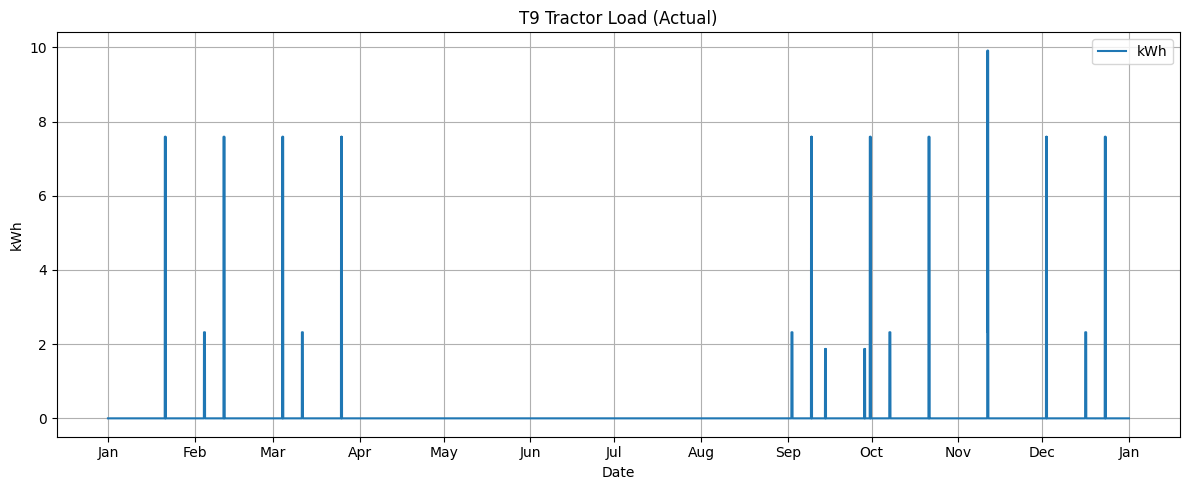

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

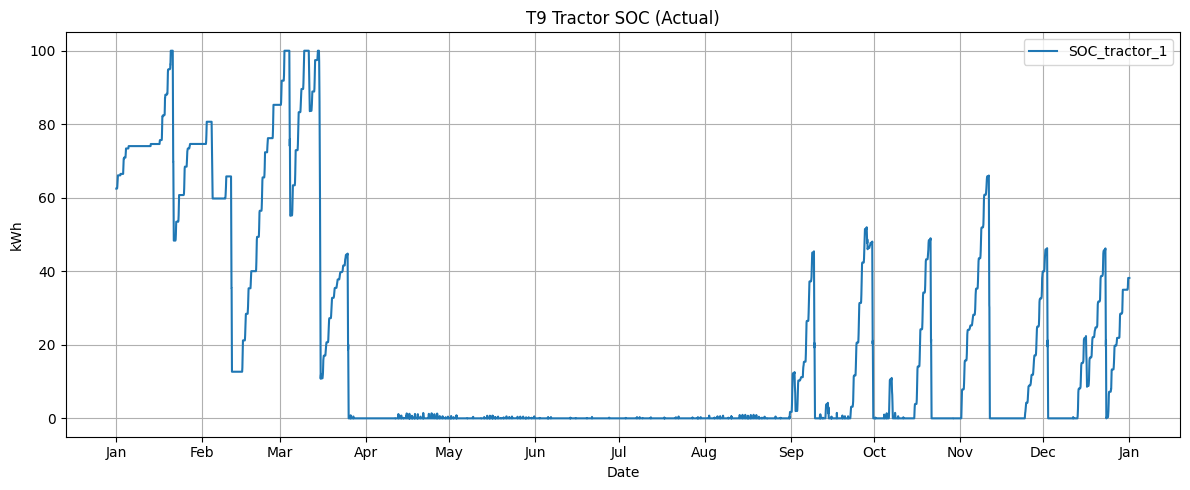

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

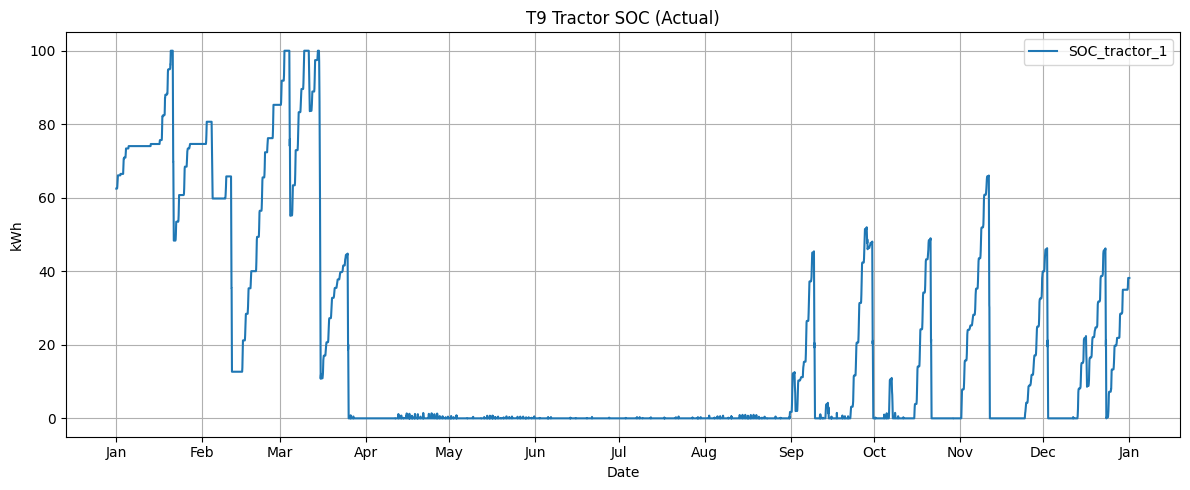

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

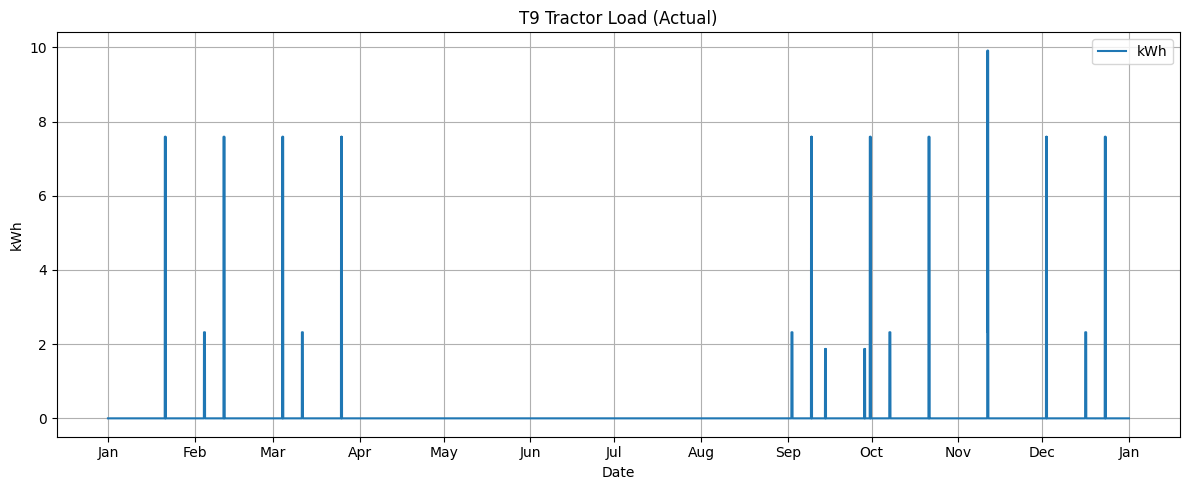

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

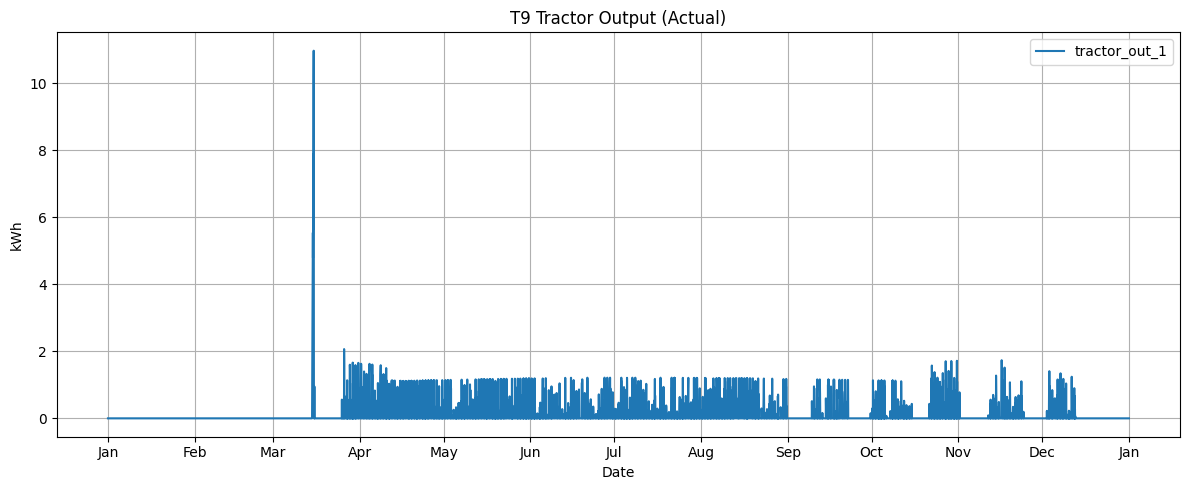

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

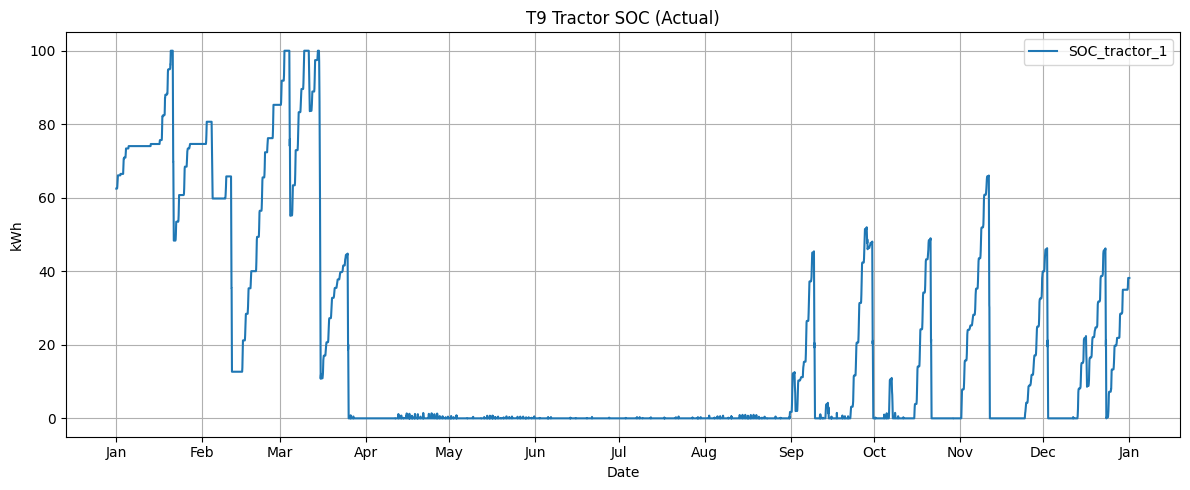

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

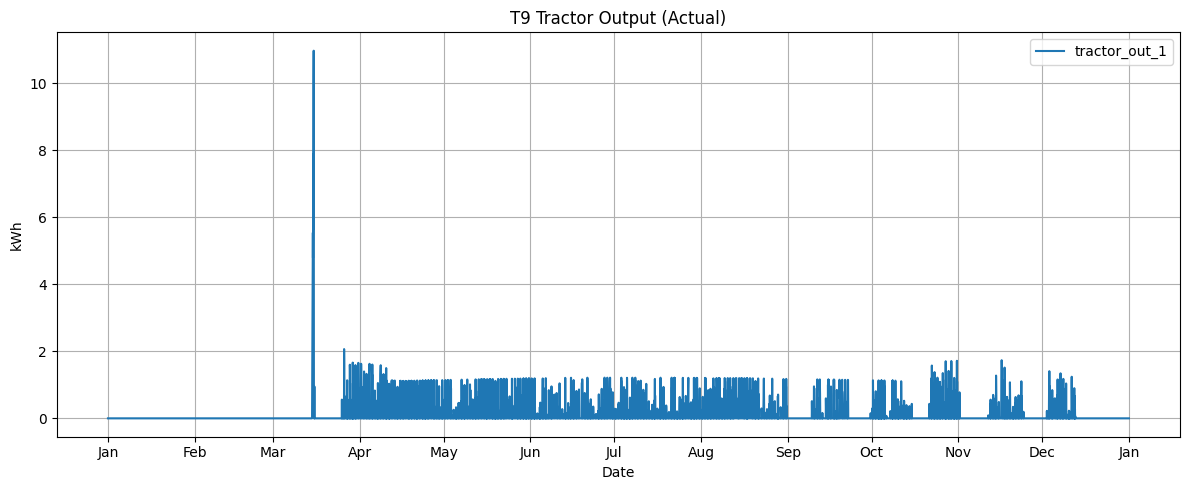

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

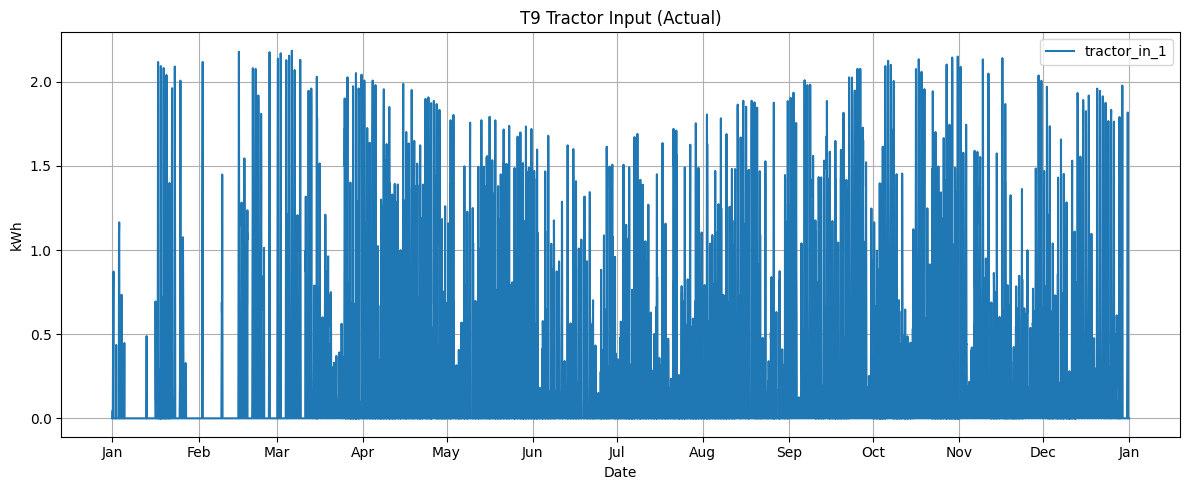

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

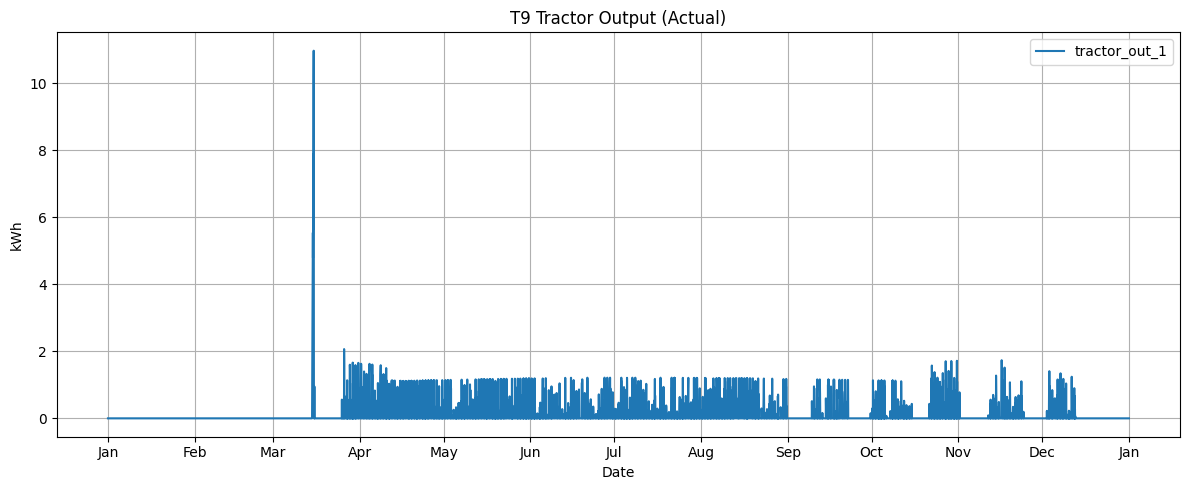

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

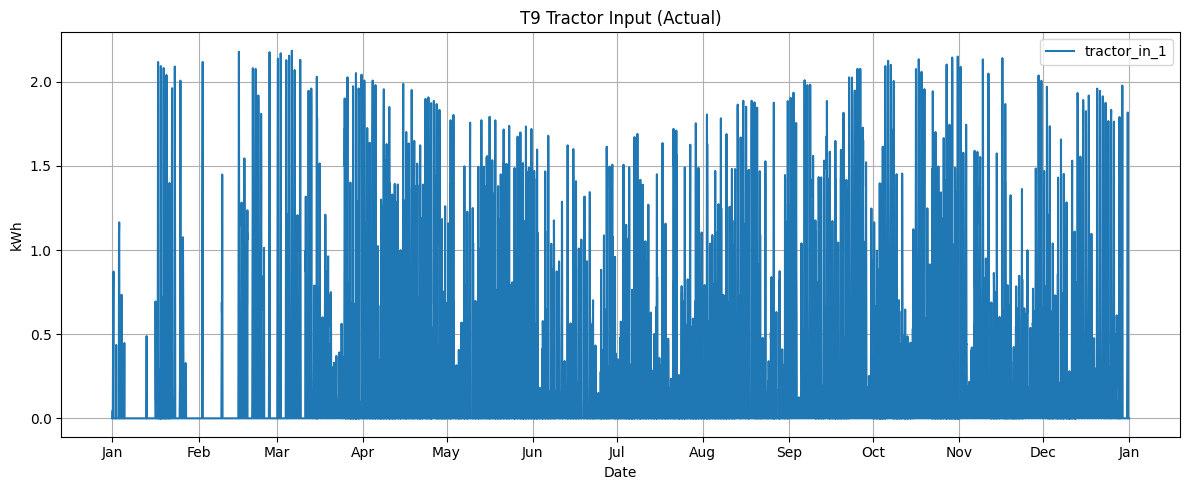

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-09
tractor_soc_series = {}
tractor_out_series = {}
tractor_in_series = {}
for n in modelv1.N:
    tractor_soc_series[f'SOC_tractor_{n}'] = np.array([value(modelv1.SOC_tractor[t,n]) for t in timesteps])[mask]
    tractor_out_series[f'tractor_out_{n}'] = np.array([value(modelv1.tractor_out[t,n]) for t in timesteps])[mask]
    tractor_in_series[f'tractor_in_{n}'] = np.array([value(modelv1.tractor_in[t,n]) for t in timesteps])[mask]

# T9.1
tractor_load_vals = np.array([value(modelv1.tractor_load[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': tractor_load_vals}, f'{name} Tractor Load', window=None)
plot_series(filtered_dates, tractor_soc_series, f'{name} Tractor SOC', window=None)

# T9.2
plot_series(filtered_dates, tractor_soc_series, f'{name} Tractor SOC', window=None)

# T9.3
tractor_load_vals = np.array([value(modelv1.tractor_load[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': tractor_load_vals}, f'{name} Tractor Load', window=None)
plot_series(filtered_dates, tractor_out_series, f'{name} Tractor Output', window=None)

# T9.4
plot_series(filtered_dates, tractor_soc_series, f'{name} Tractor SOC', window=None)
plot_series(filtered_dates, tractor_out_series, f'{name} Tractor Output', window=None)
plot_series(filtered_dates, tractor_in_series, f'{name} Tractor Input', window=None)

# T9.5
plot_series(filtered_dates, tractor_out_series, f'{name} Tractor Output', window=None)
plot_series(filtered_dates, tractor_in_series, f'{name} Tractor Input', window=None)



# V-10

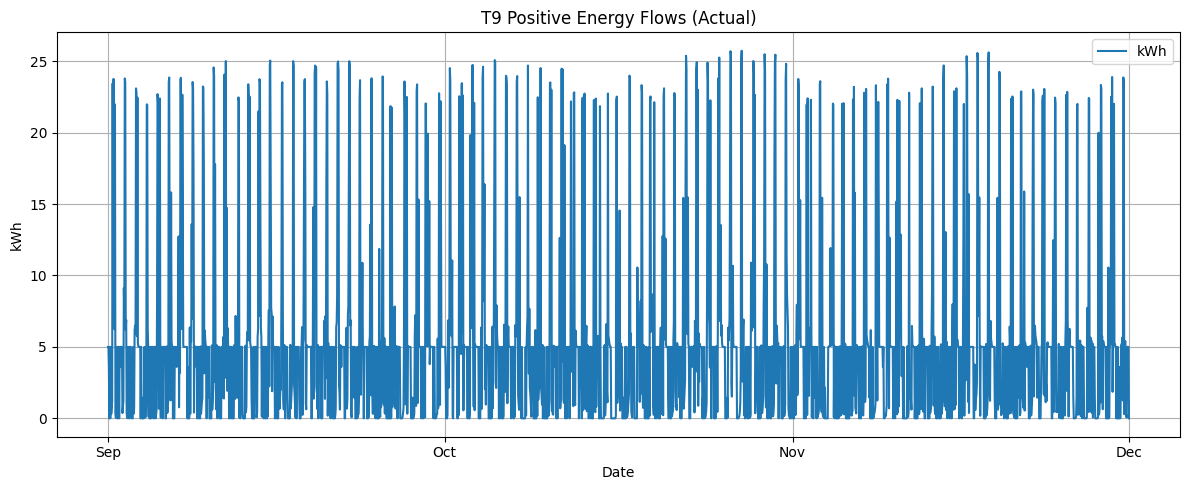

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

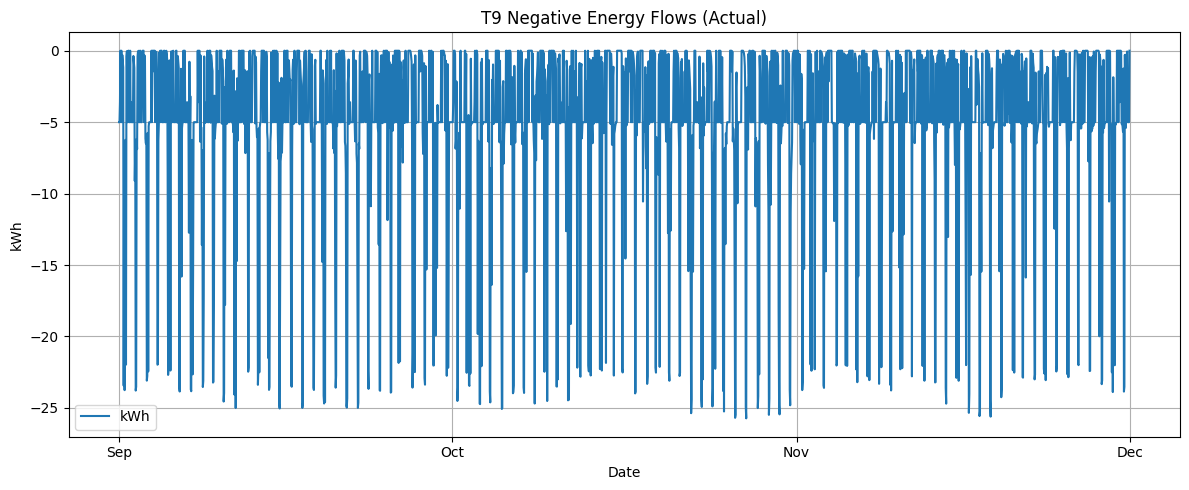

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

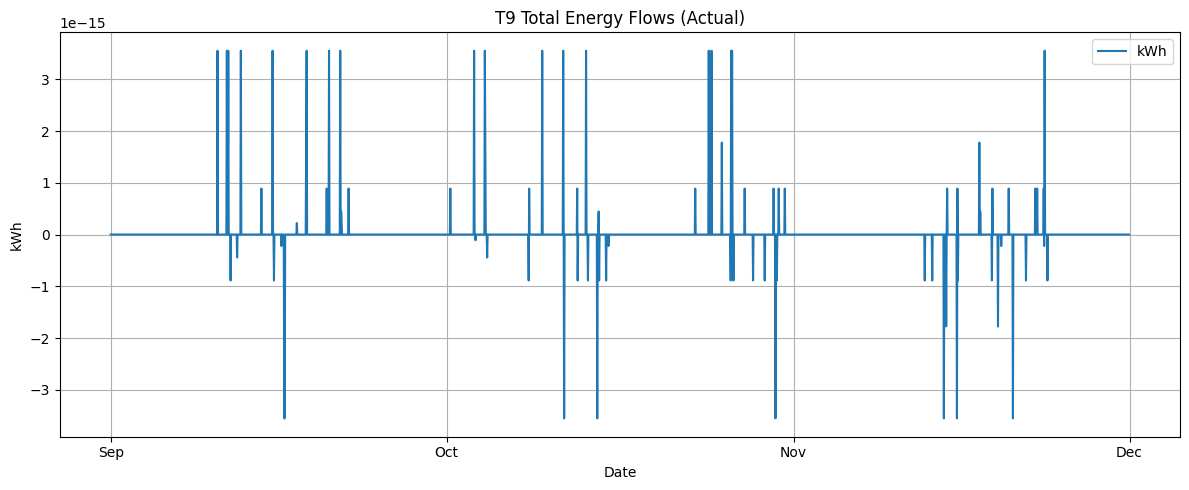

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-10
tractor_out_series = {}
tractor_in_series = {}
for n in modelv1.N:
    tractor_out_series[f'tractor_out_{n}'] = np.array([value(modelv1.tractor_out[t,n]) for t in timesteps])[mask]
    tractor_in_series[f'tractor_in_{n}'] = np.array([value(modelv1.tractor_in[t,n]) for t in timesteps])[mask]

# T10.1.1
grid_imp_w_vals = np.array([value(modelv1.grid_imp_W[t]) for t in timesteps])[mask]
grid_imp_r_vals = np.array([value(modelv1.grid_imp_R[t]) for t in timesteps])[mask]
pv_w_vals = np.array([value(modelv1.PV_W[t]) for t in timesteps])[mask]
pv_r_vals = np.array([value(modelv1.PV_R[t]) for t in timesteps])[mask]
bess_out_w_vals = np.array([value(modelv1.BESS_out_W[t]) for t in timesteps])[mask]
bess_out_r_vals = np.array([value(modelv1.BESS_out_R[t]) for t in timesteps])[mask]

positive = grid_imp_w_vals + grid_imp_r_vals + pv_w_vals + pv_r_vals + bess_out_w_vals + bess_out_r_vals + tractor_out_series['tractor_out_1']
plot_series(filtered_dates, {'kWh': positive}, f'{name} Positive Energy Flows', window=None)

farm_vals = np.array([value(modelv1.farm[t]) for t in timesteps])[mask]
bess_in_r_vals = np.array([value(modelv1.BESS_in_R[t]) for t in timesteps])[mask]
bess_in_w_vals = np.array([value(modelv1.BESS_in_W[t]) for t in timesteps])[mask]
grid_exp_w_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]

negative = -(farm_vals + bess_in_r_vals + bess_in_w_vals + grid_exp_w_vals + tractor_in_series['tractor_in_1'])
plot_series(filtered_dates, {'kWh': negative}, f'{name} Negative Energy Flows', window=None)

total = positive + negative
plot_series(filtered_dates, {'kWh': total}, f'{name} Total Energy Flows', window=None)


# V-11

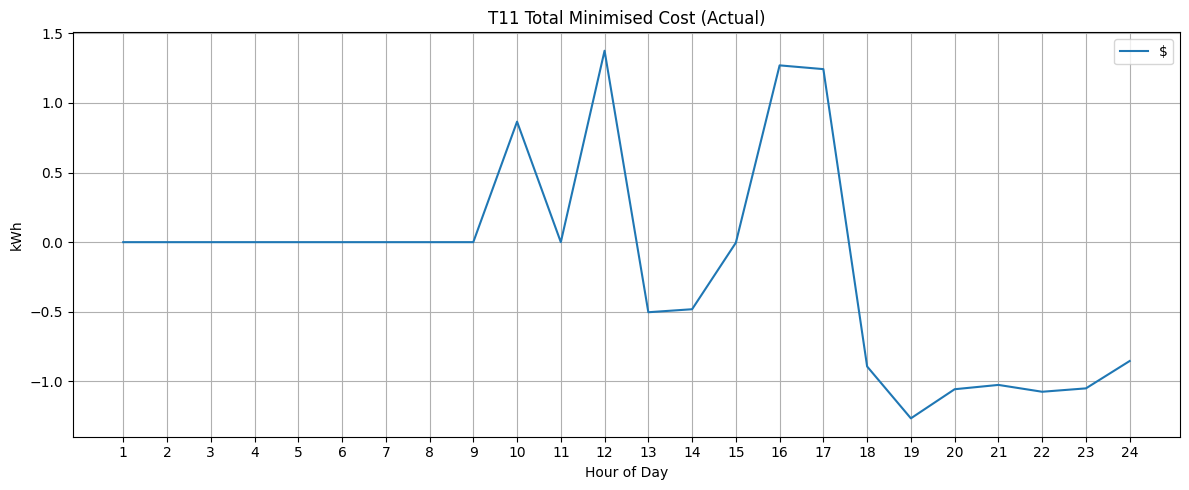

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

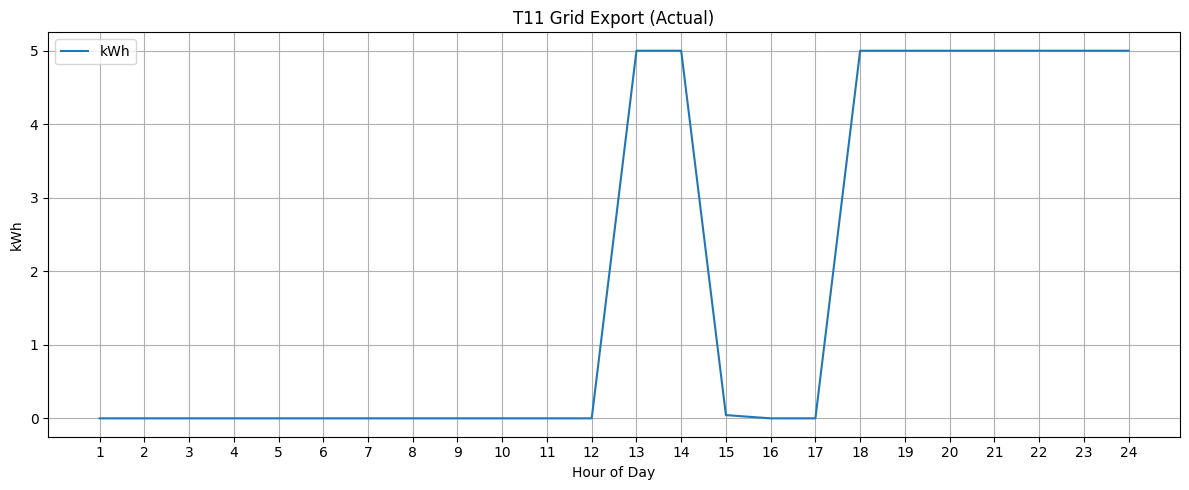

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-11
grid_cost_ts = np.array([
    value(modelv1.price_W[t]) * (value(modelv1.grid_imp_W[t]) - value(modelv1.grid_exp_W[t]))
    + value(modelv1.price_R[t]) * (value(modelv1.grid_imp_R[t]) - value(modelv1.farm[t]))
    - value(delta_FCAS) * ((1 - value(modelv1.VPP[t])) * (
        value(modelv1.e_R1s[t]) * value(modelv1.price_R1s[t]) * value(modelv1.f_R1s[t]) +
        value(modelv1.e_R6s[t]) * value(modelv1.price_R6s[t]) * value(modelv1.f_R6s[t]) +
        value(modelv1.e_R60s[t]) * value(modelv1.price_R60s[t]) * value(modelv1.f_R60s[t]) +
        value(modelv1.e_R5m[t]) * value(modelv1.price_R5m[t]) * value(modelv1.f_R5m[t]) +
        value(modelv1.e_L1s[t]) * value(modelv1.price_L1s[t]) * value(modelv1.f_L1s[t]) +
        value(modelv1.e_L6s[t]) * value(modelv1.price_L6s[t]) * value(modelv1.f_L6s[t]) +
        value(modelv1.e_L60s[t]) * value(modelv1.price_L60s[t]) * value(modelv1.f_L60s[t]) +
        value(modelv1.e_L5m[t]) * value(modelv1.price_L5m[t]) * value(modelv1.f_L5m[t])
    ))
    for t in modelv1.T
])
grid_cost_ts = grid_cost_ts[mask]
plot_series(filtered_dates, {'$': grid_cost_ts}, f'{name} Total Minimised Cost', window=None)
grid_exp_w_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_exp_w_vals}, f'{name} Grid Export', window=None)





# V-15

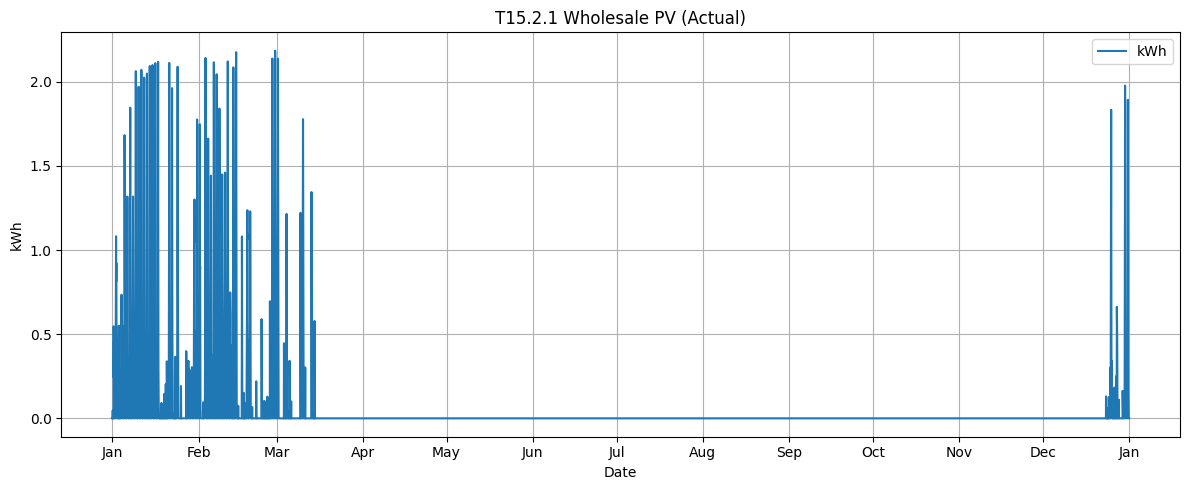

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

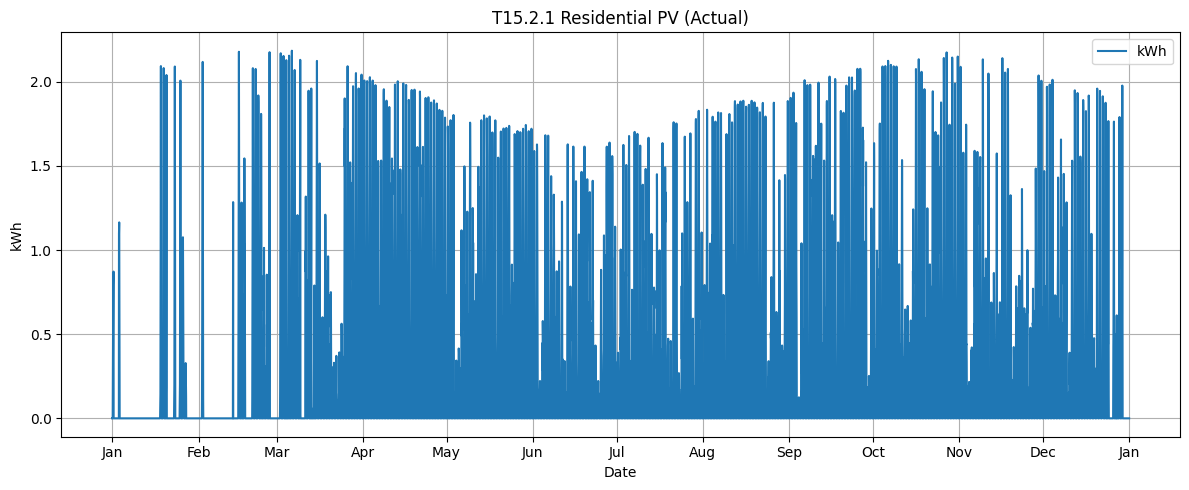

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

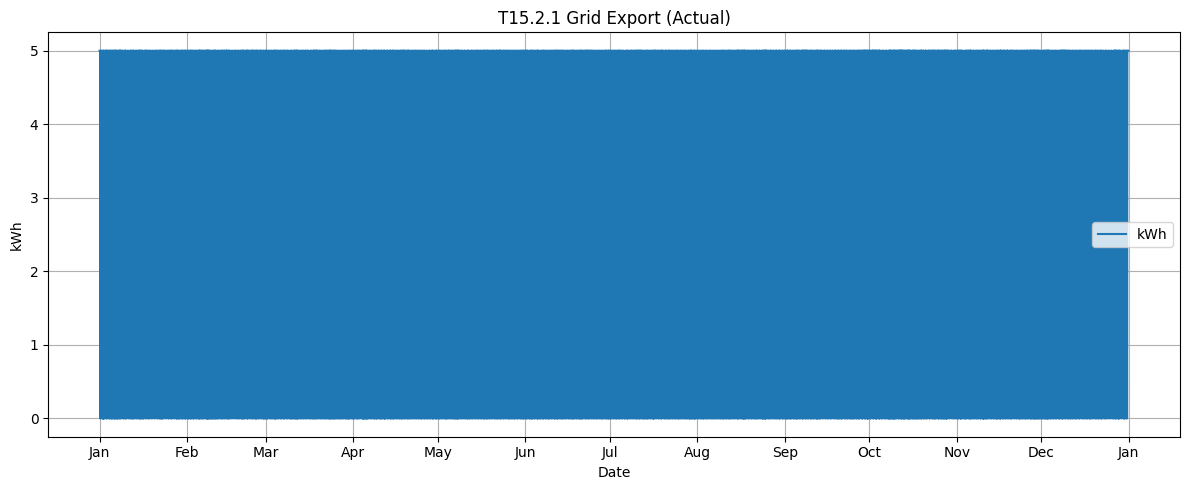

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-15
pv_w_vals = np.array([value(modelv1.PV_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_w_vals}, f'{name} Wholesale PV', window=None)
pv_r_vals = np.array([value(modelv1.PV_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_r_vals}, f'{name} Residential PV', window=None)
grid_exp_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_exp_vals}, f'{name} Grid Export', window=None)

# V-16

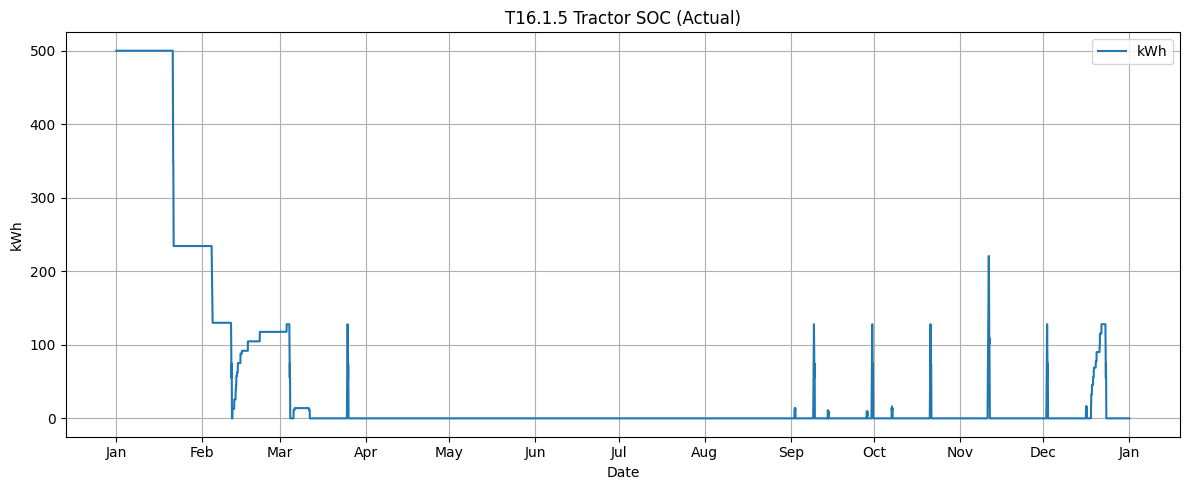

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

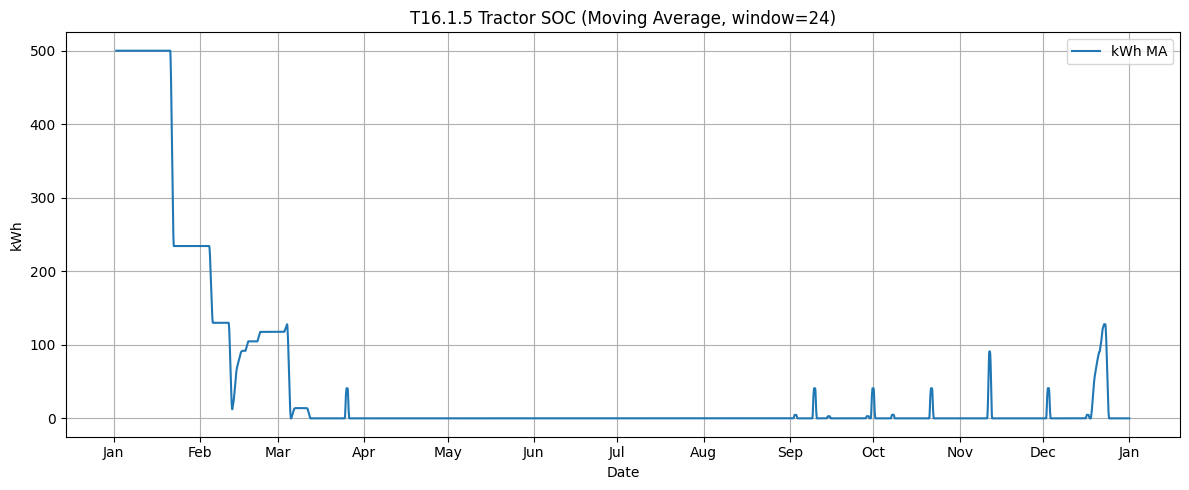

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tractor_soc_series = {}
for n in modelv1.N:
    tractor_soc_series[f'SOC_tractor_{n}'] = np.array([value(modelv1.SOC_tractor[t,n]) for t in timesteps])[mask]
total_soc = np.sum(list(tractor_soc_series.values()), axis=0)
plot_series(filtered_dates, {"kWh": total_soc}, f'{name} Tractor SOC', window=24)

# V-17

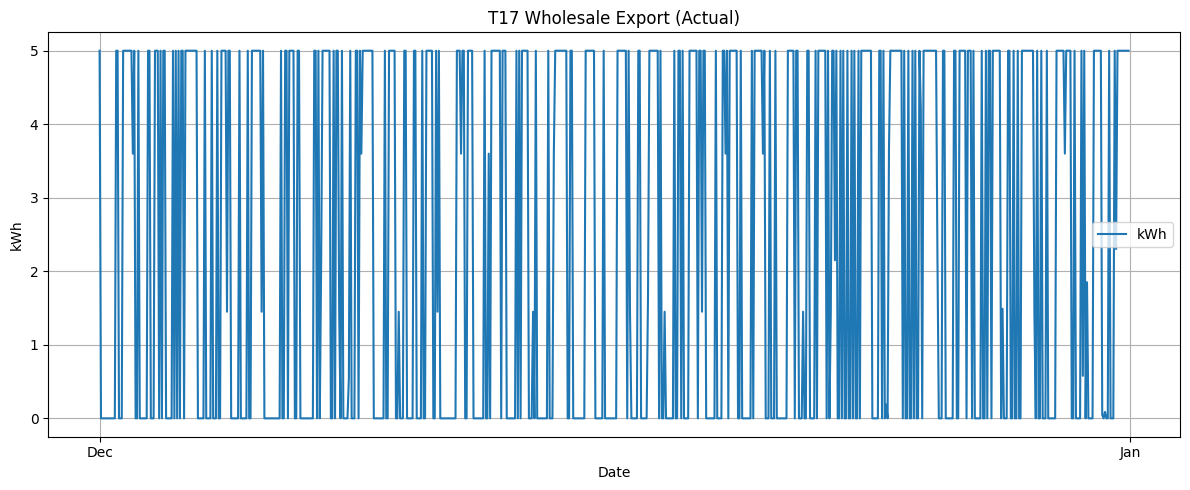

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

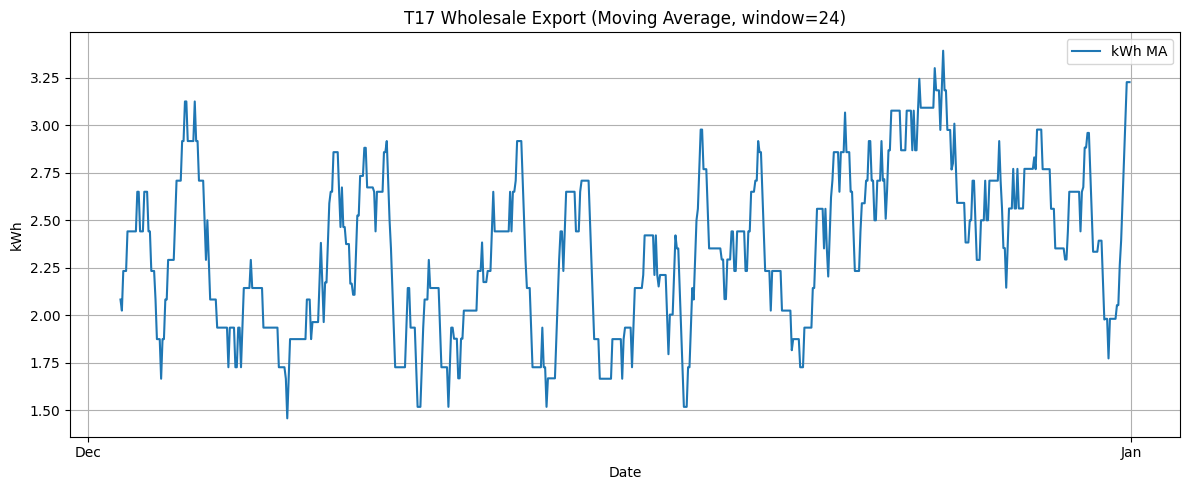

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

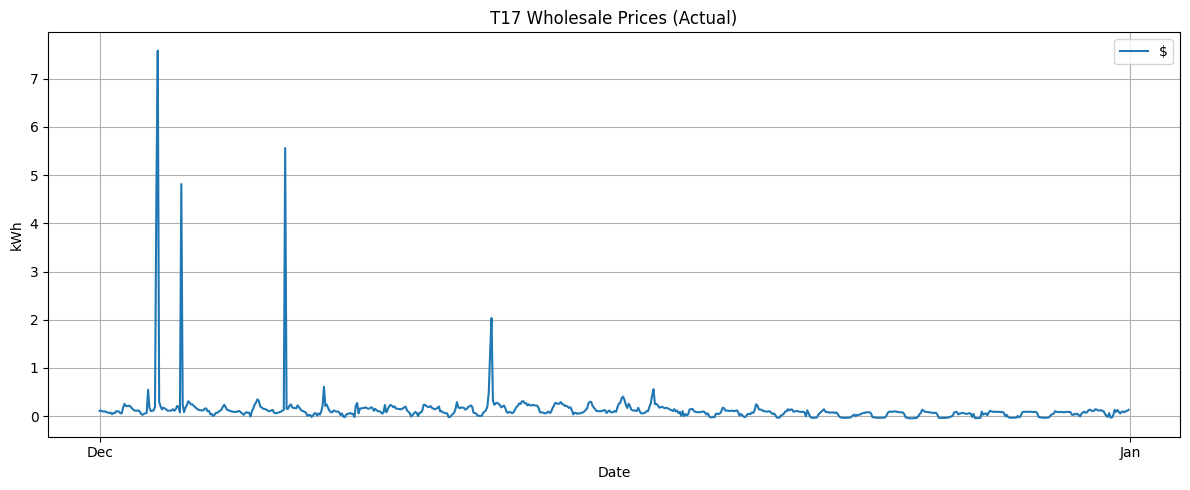

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

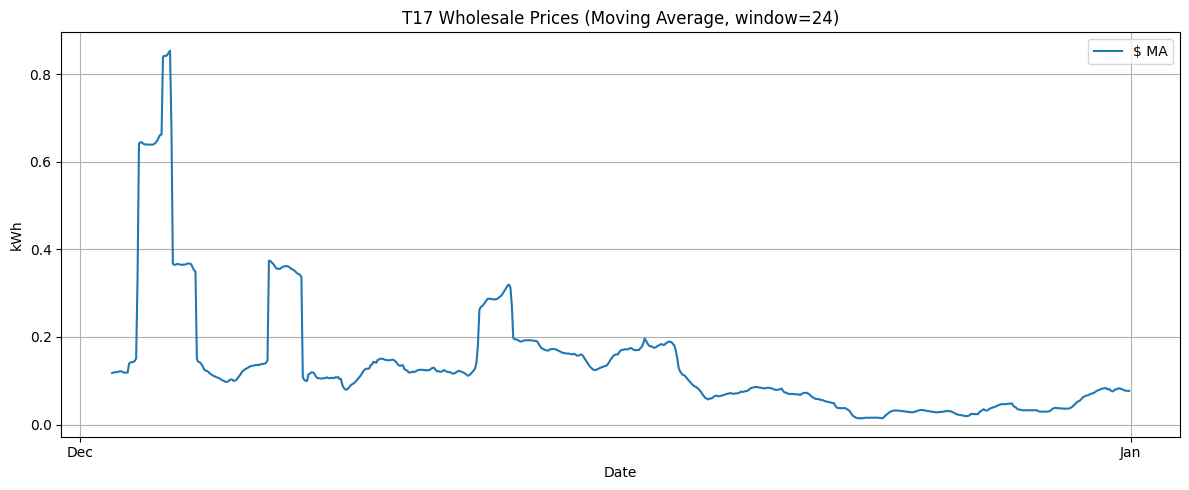

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

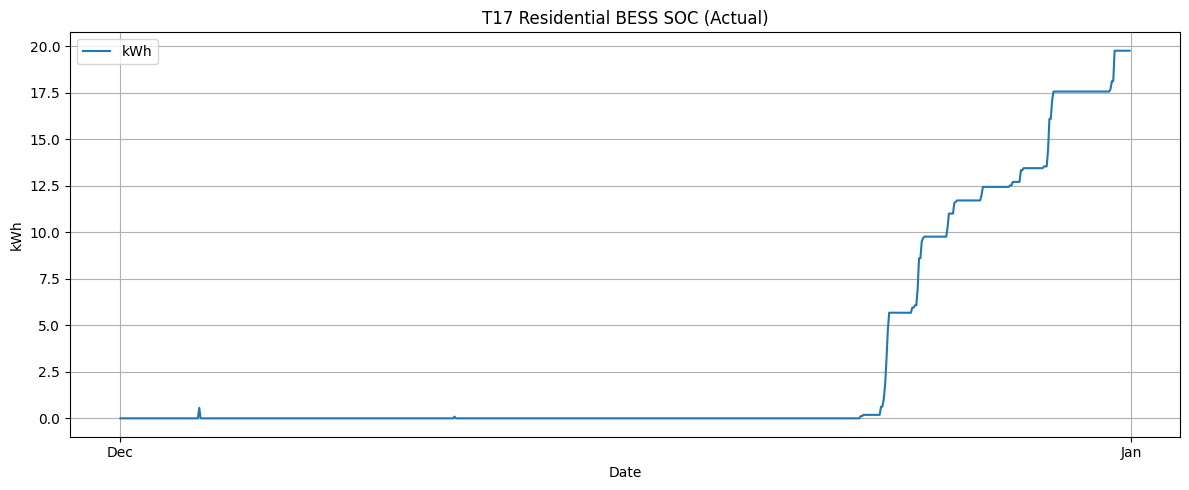

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

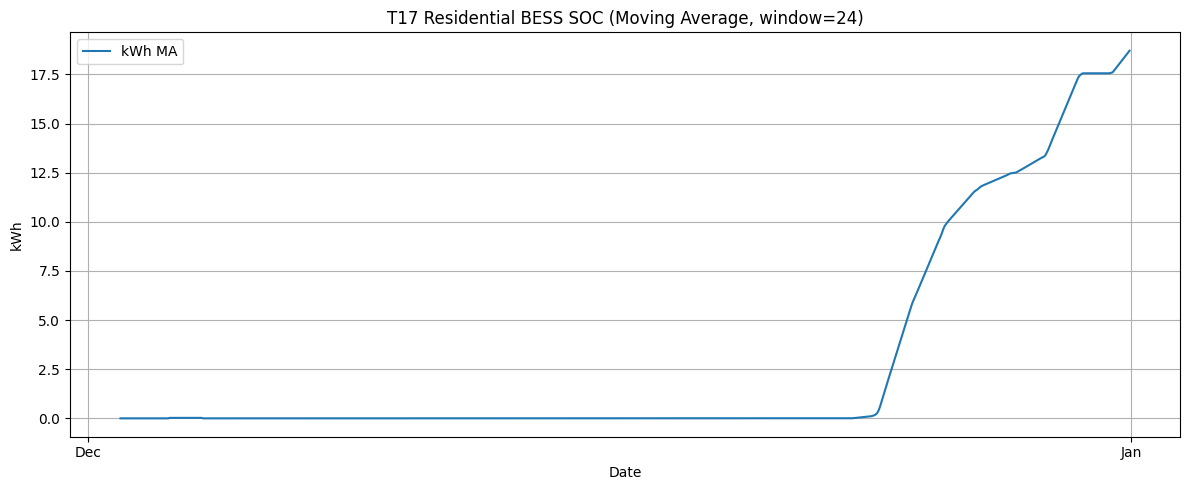

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

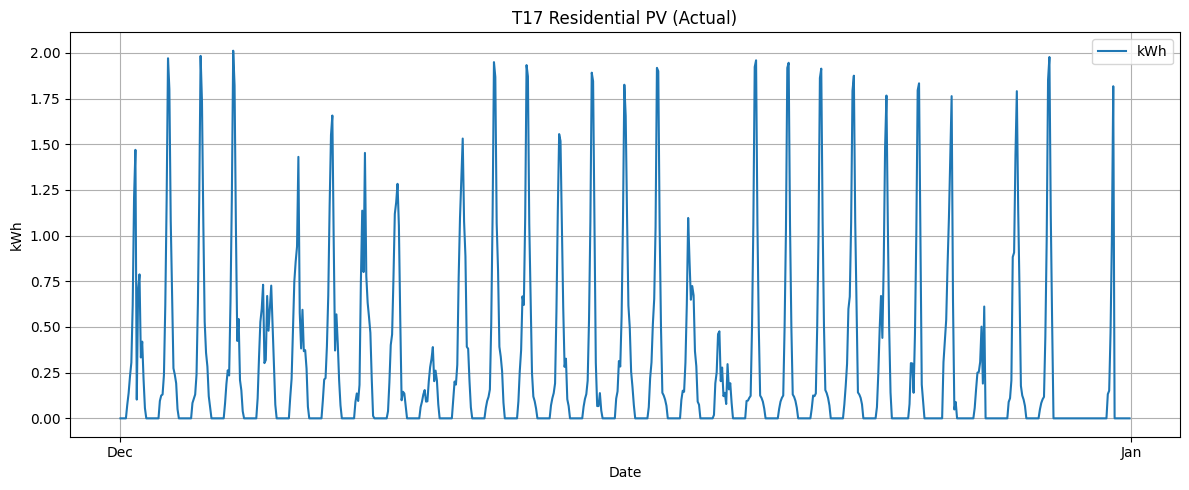

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

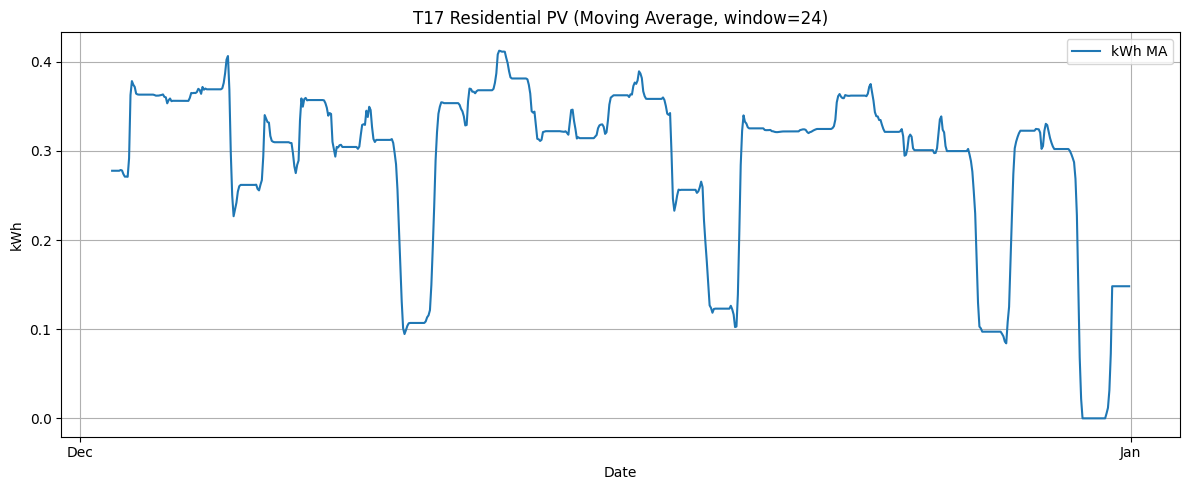

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

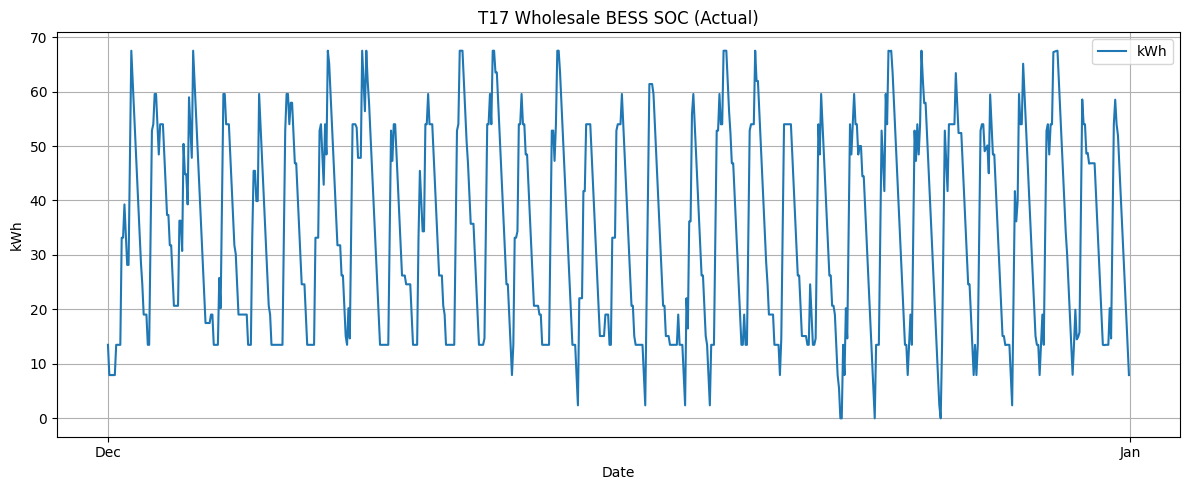

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

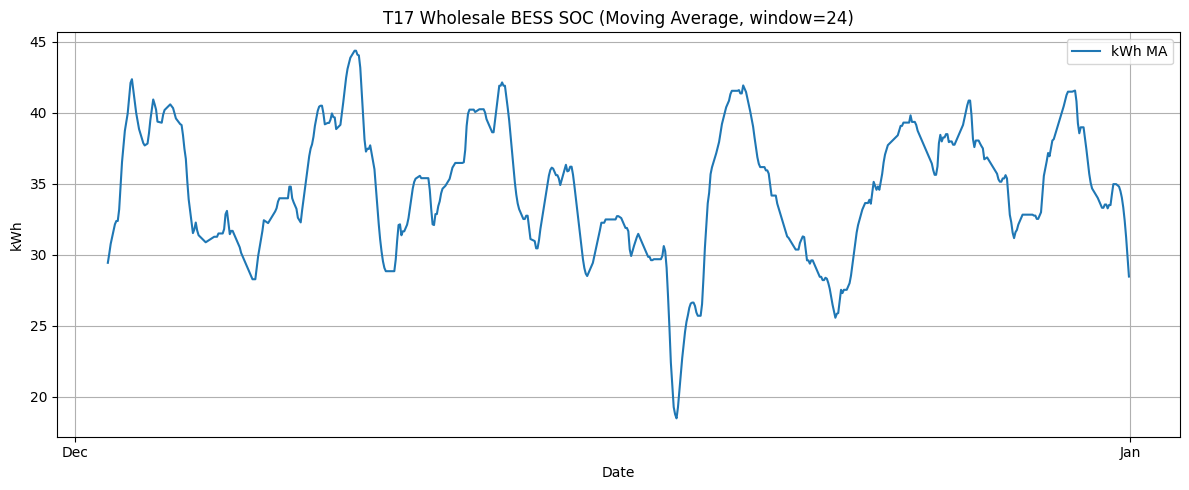

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

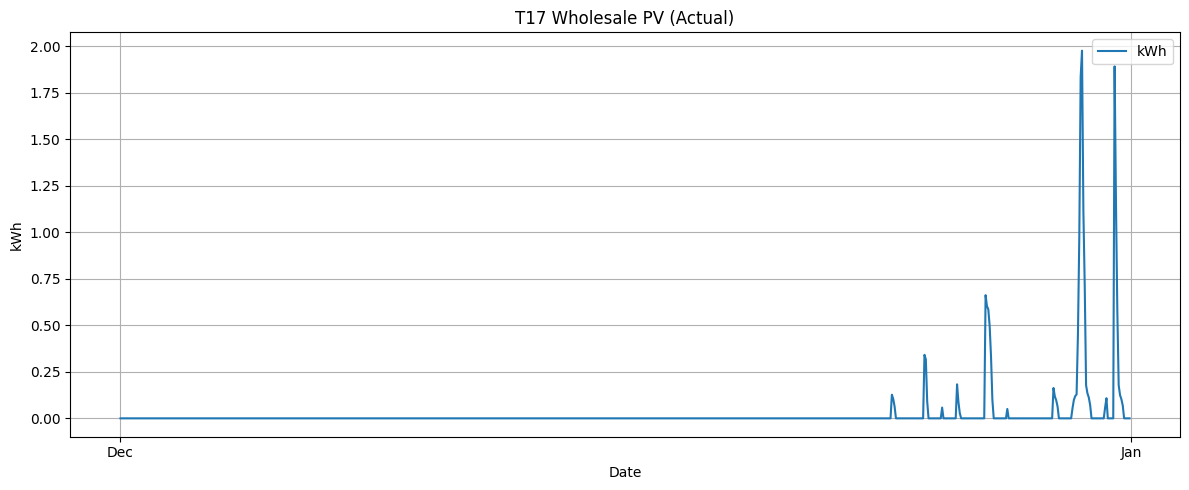

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

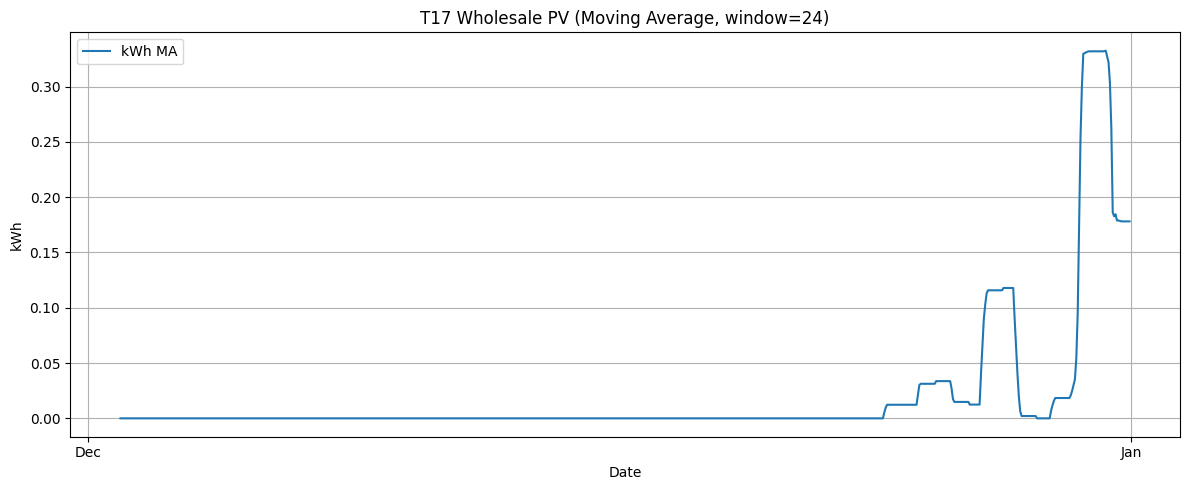

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Testing for V-15
# T17.2
grid_exp_w_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_exp_w_vals}, f'{name} Wholesale Export', window=24)
price_w_vals = np.array([value(modelv1.price_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'$': price_w_vals}, f'{name} Wholesale Prices', window=24)

# T17.3
soc_bess_r_vals = np.array([value(modelv1.SOC_BESS_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_r_vals}, f'{name} Residential BESS SOC', window=24)
pv_r_vals = np.array([value(modelv1.PV_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_r_vals}, f'{name} Residential PV', window=24)

# T17.4
soc_bess_w_vals = np.array([value(modelv1.SOC_BESS_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_w_vals}, f'{name} Wholesale BESS SOC', window=24)
pv_w_vals = np.array([value(modelv1.PV_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_w_vals}, f'{name} Wholesale PV', window=24)

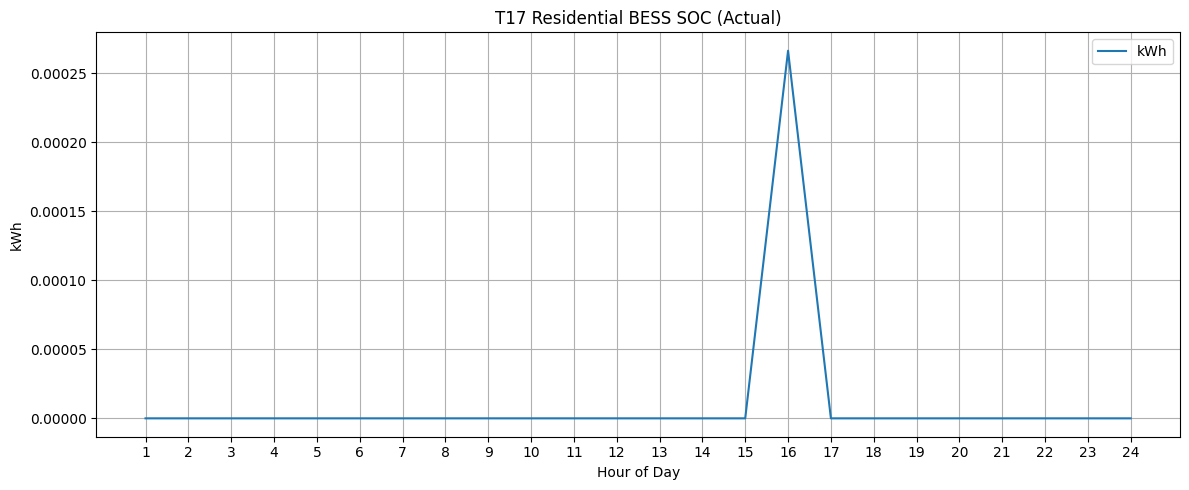

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

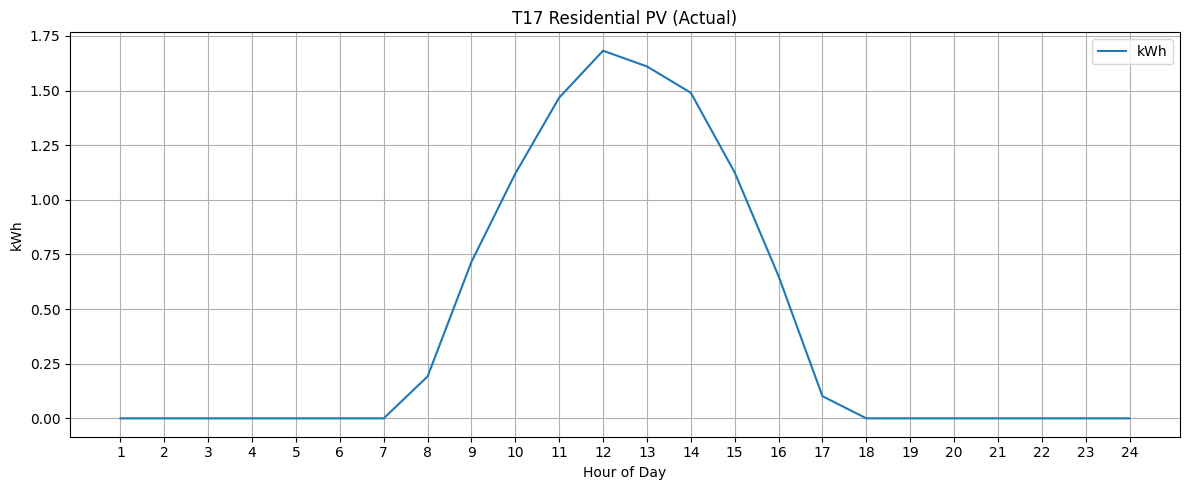

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

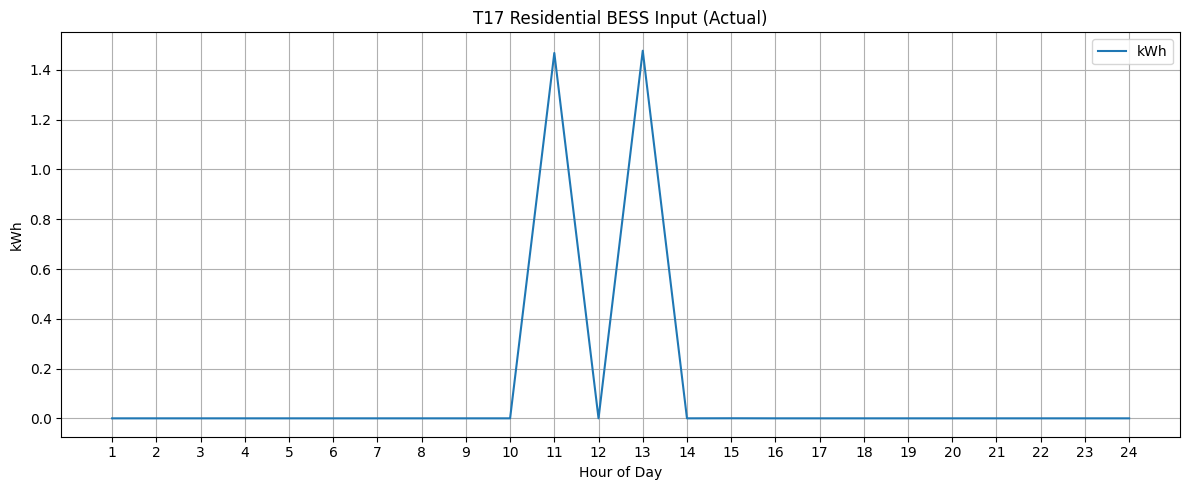

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

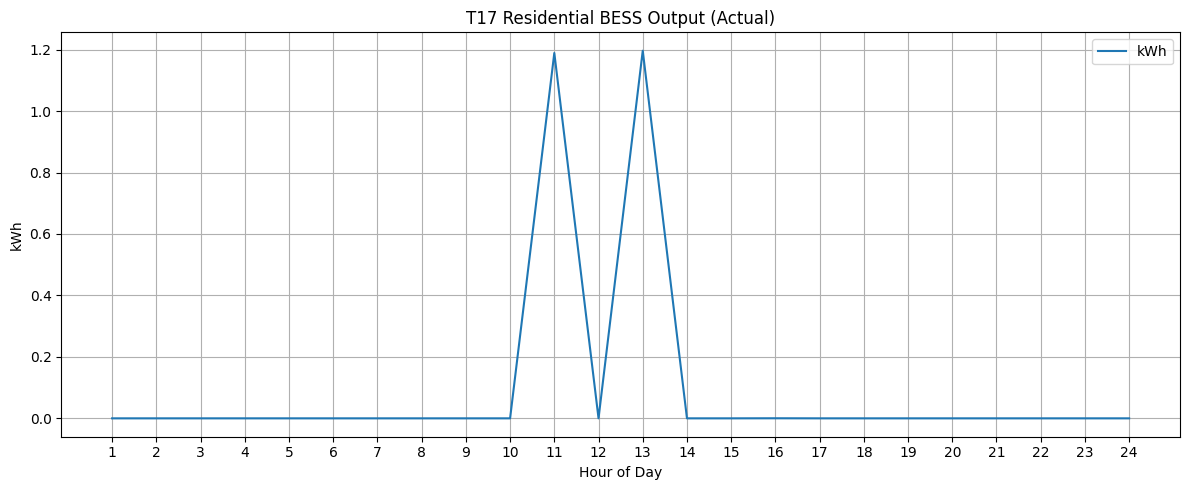

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

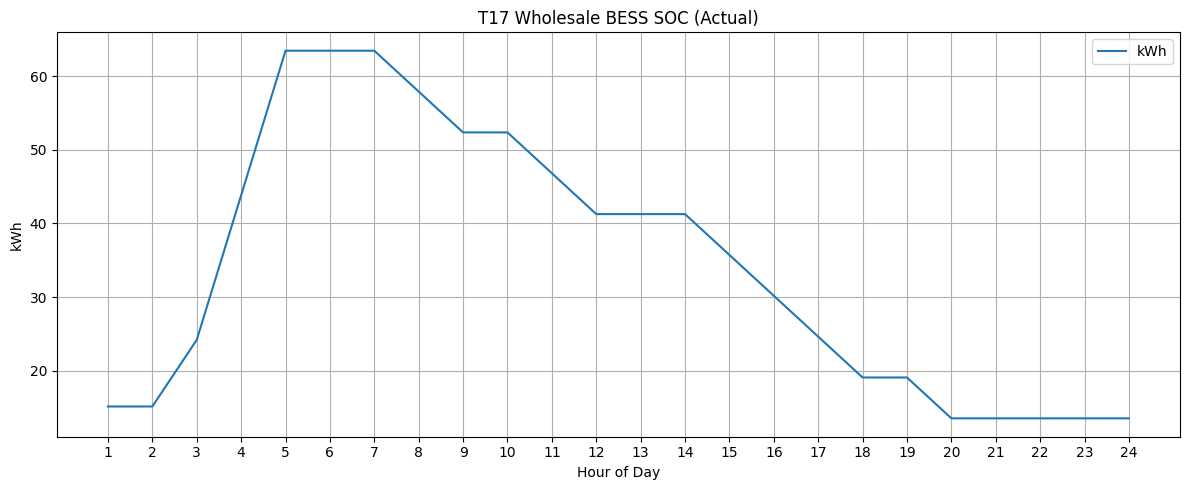

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

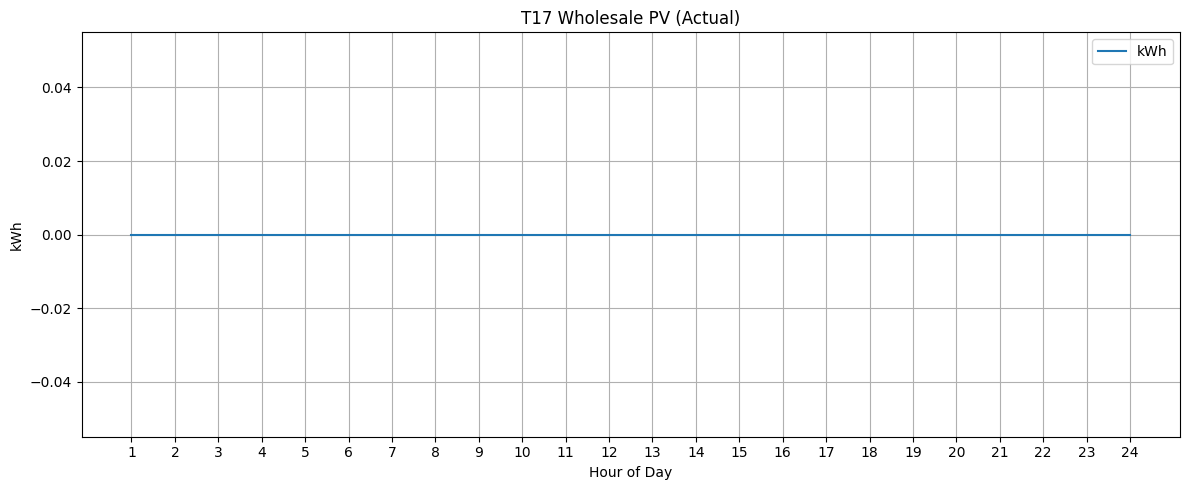

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

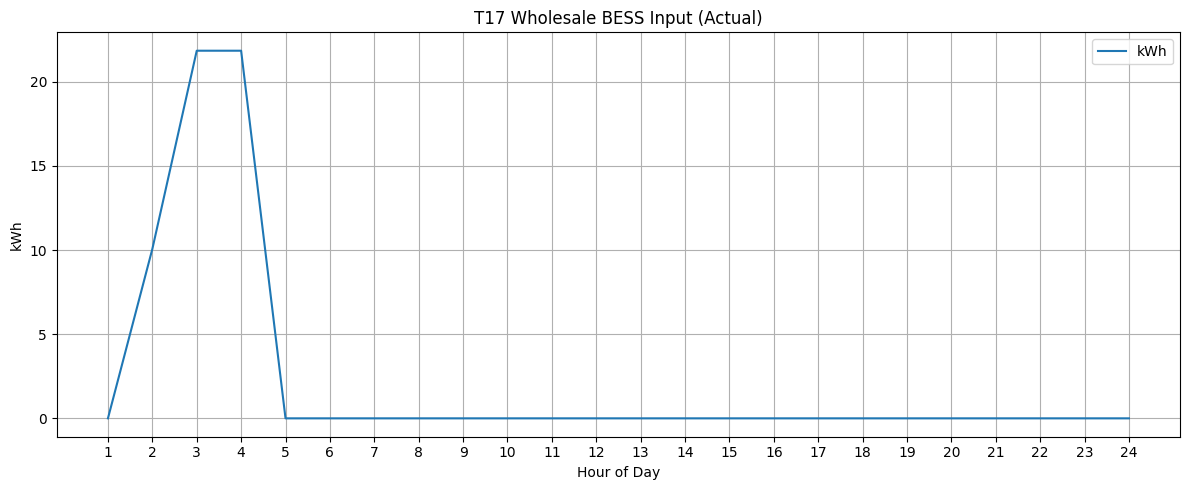

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

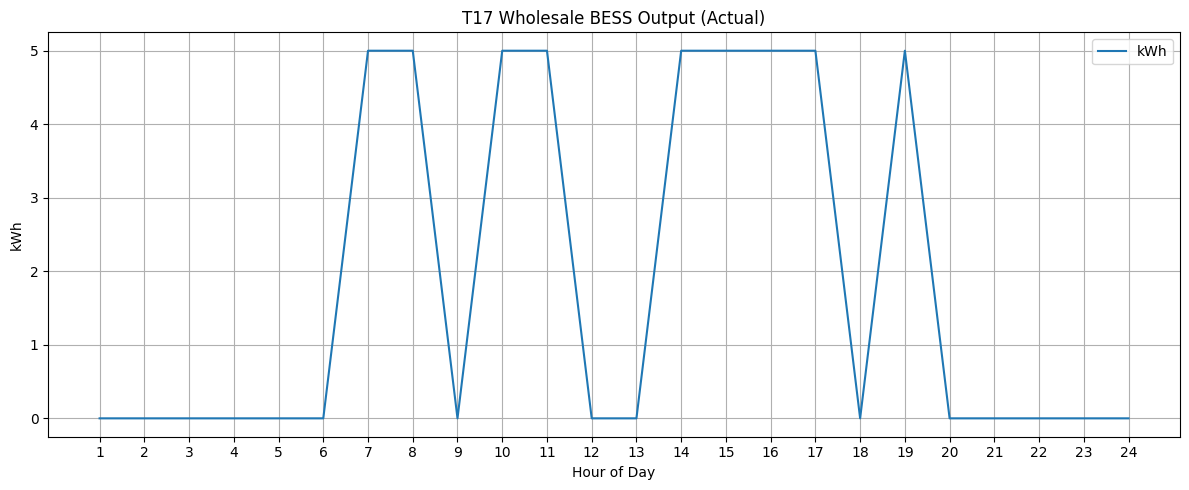

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

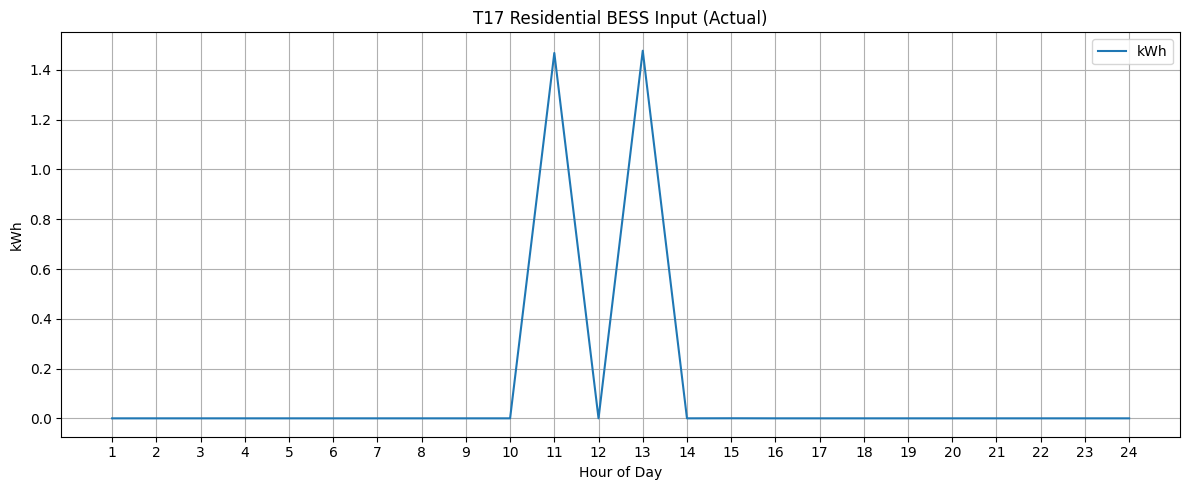

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

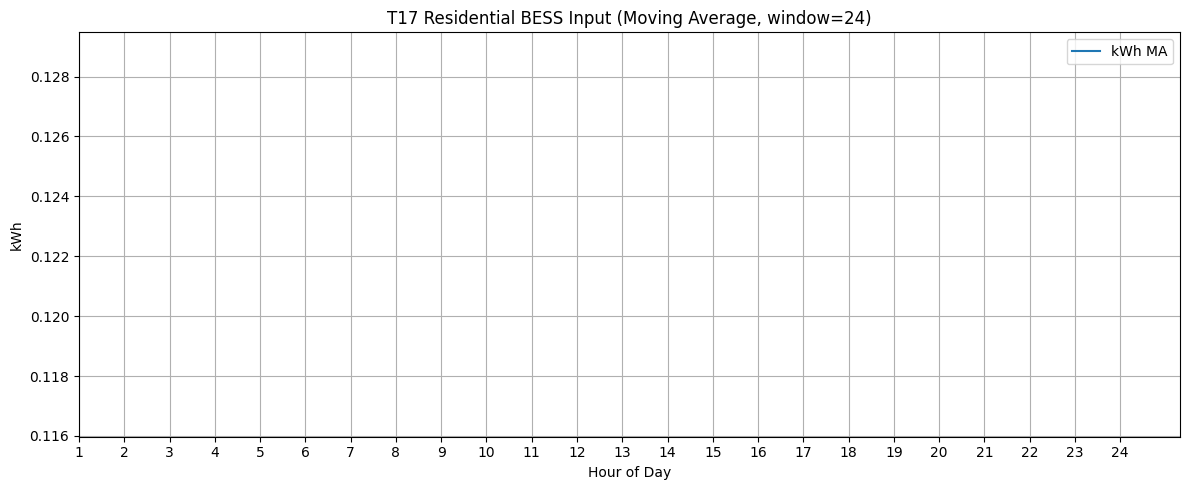

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

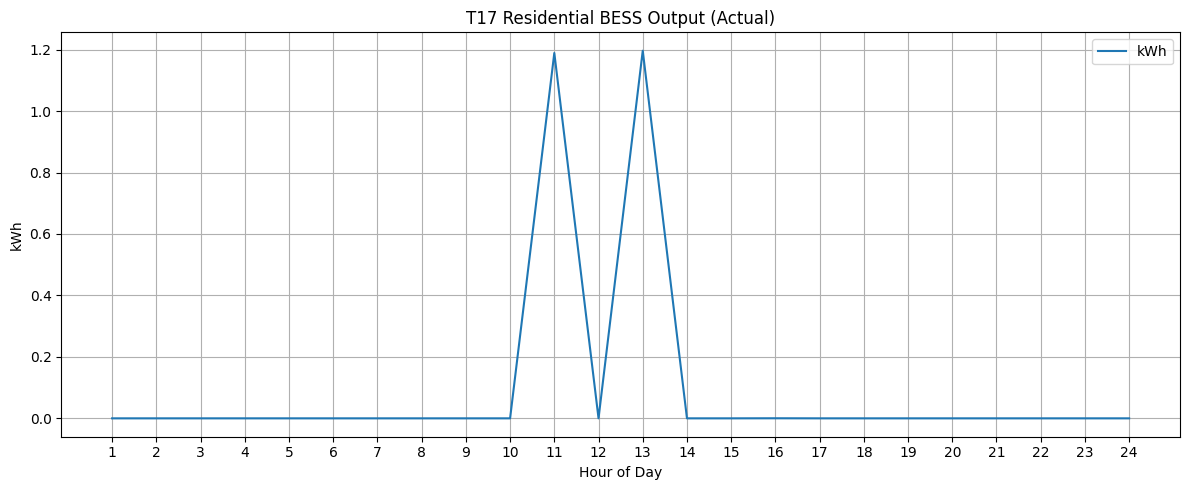

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

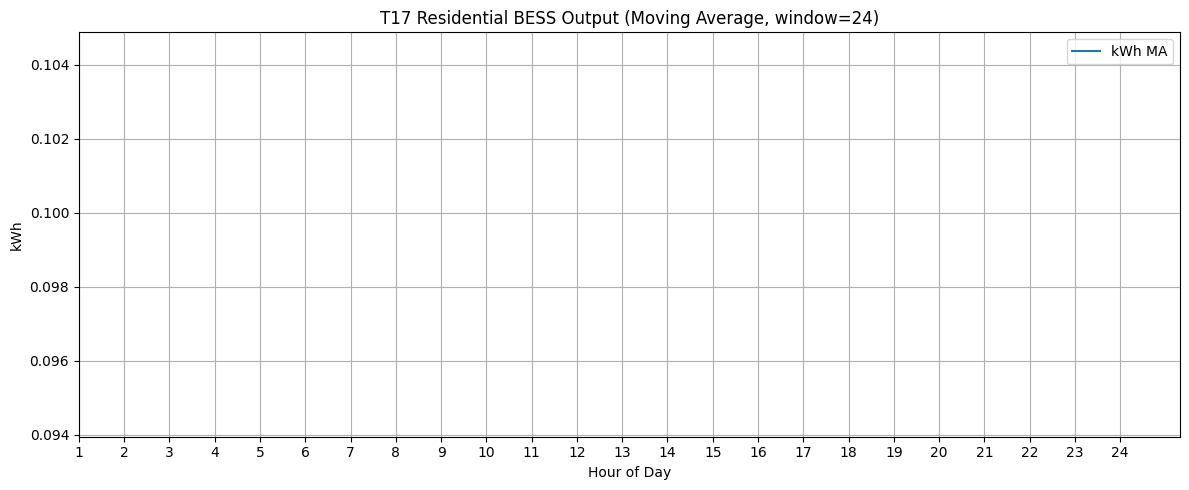

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

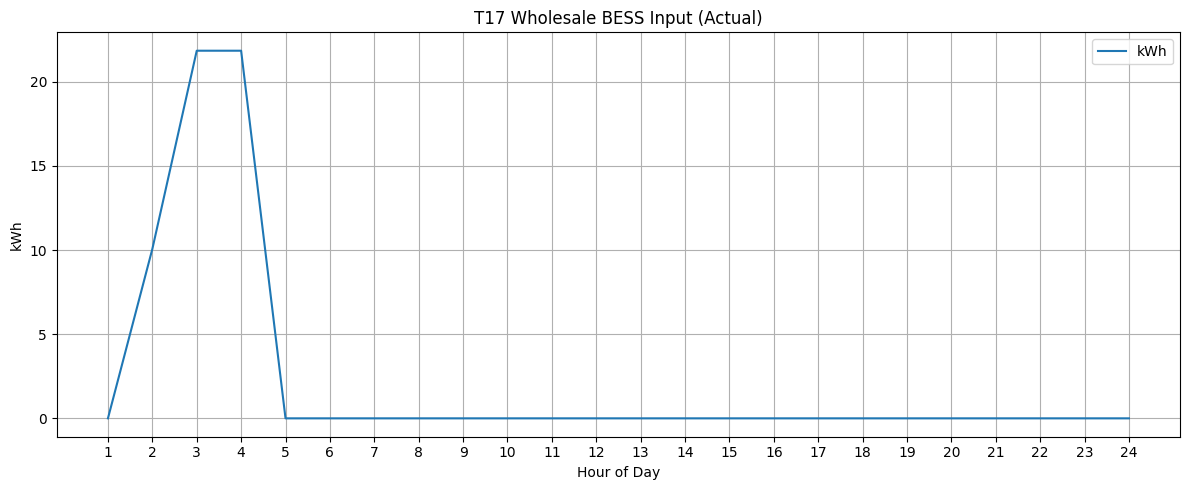

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

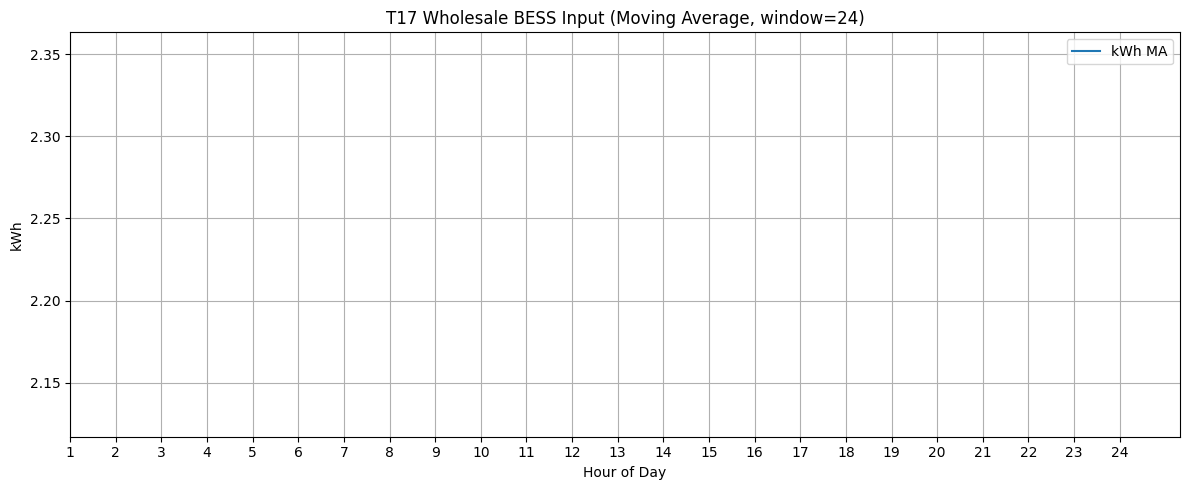

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

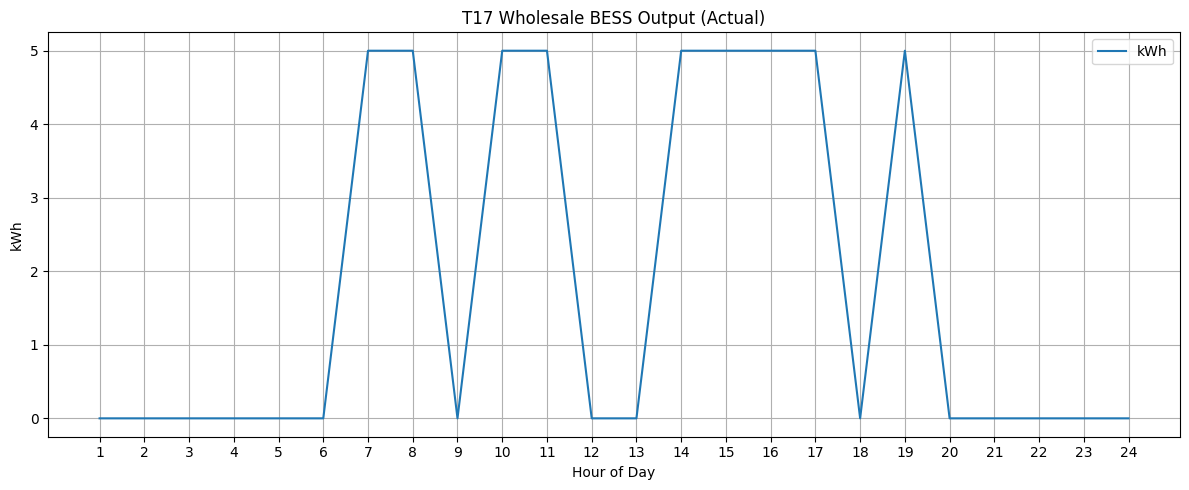

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

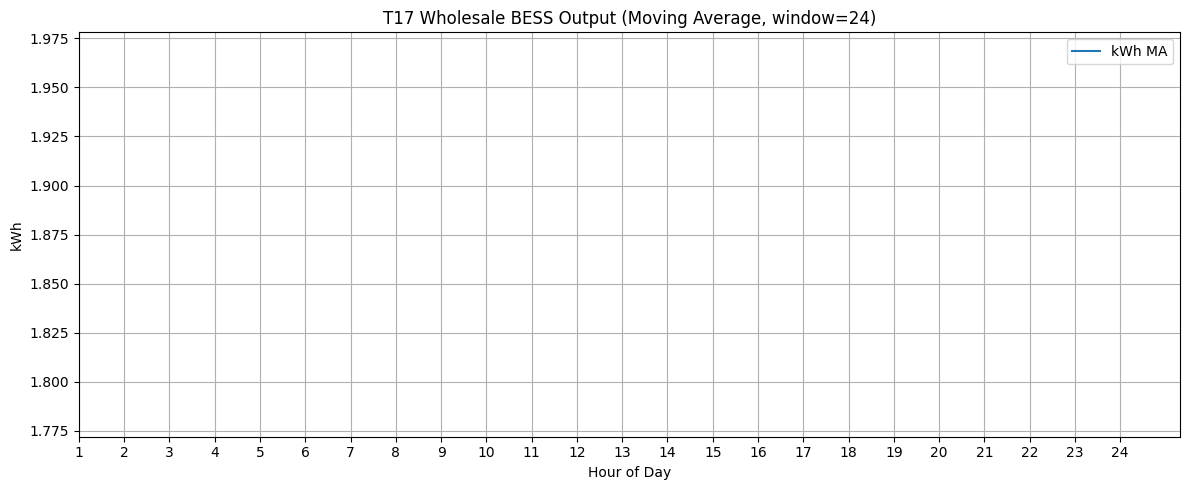

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

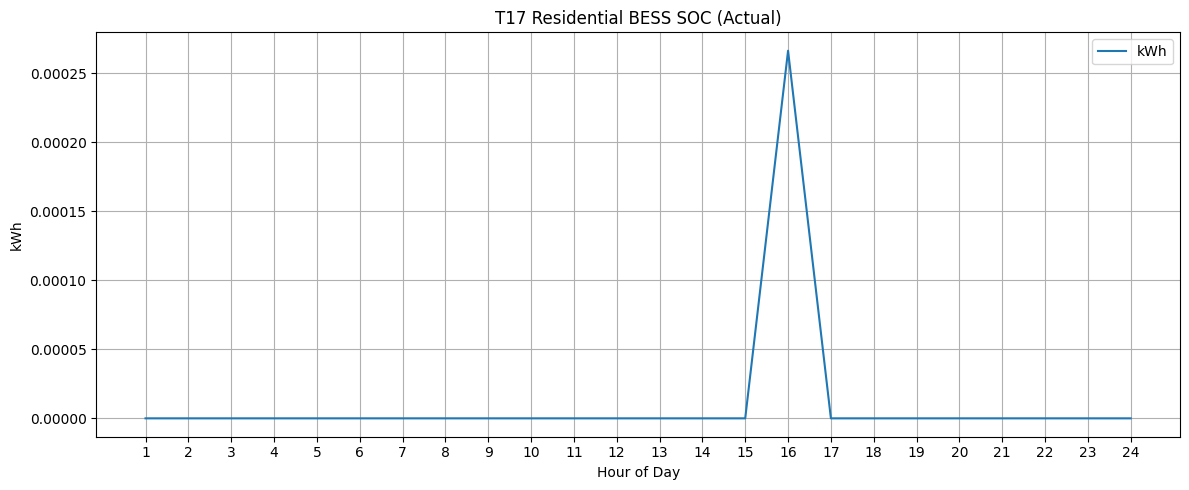

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

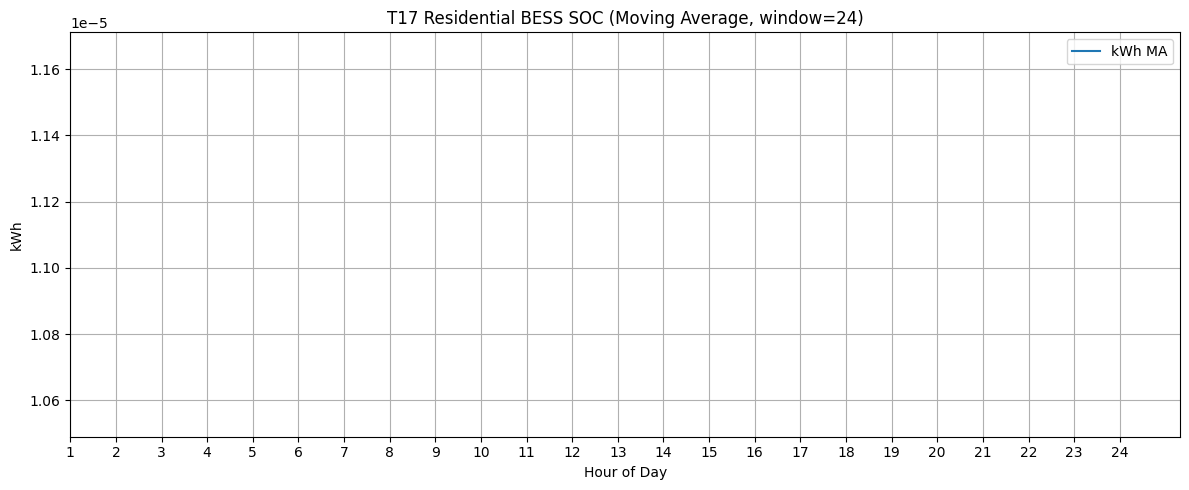

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

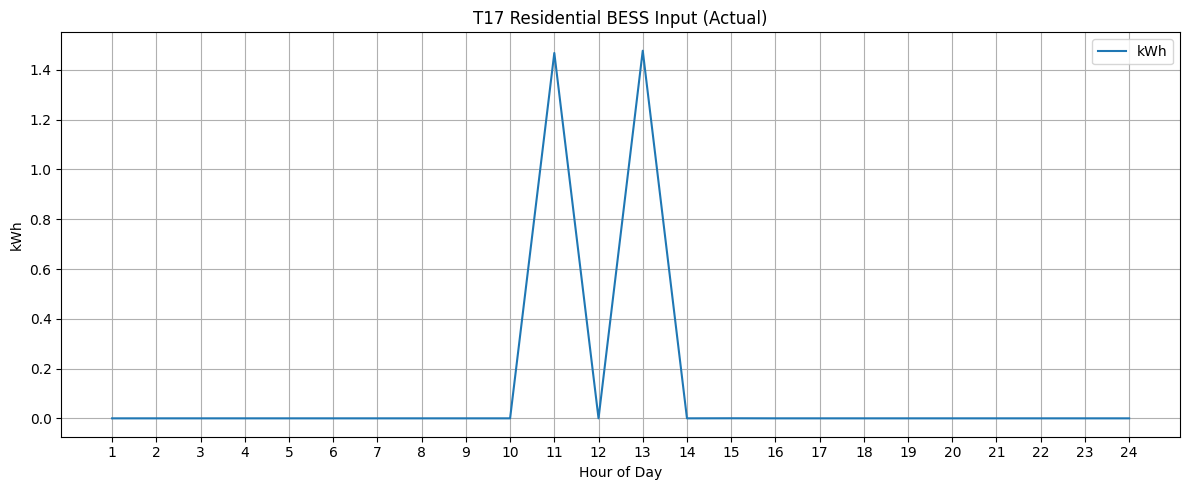

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

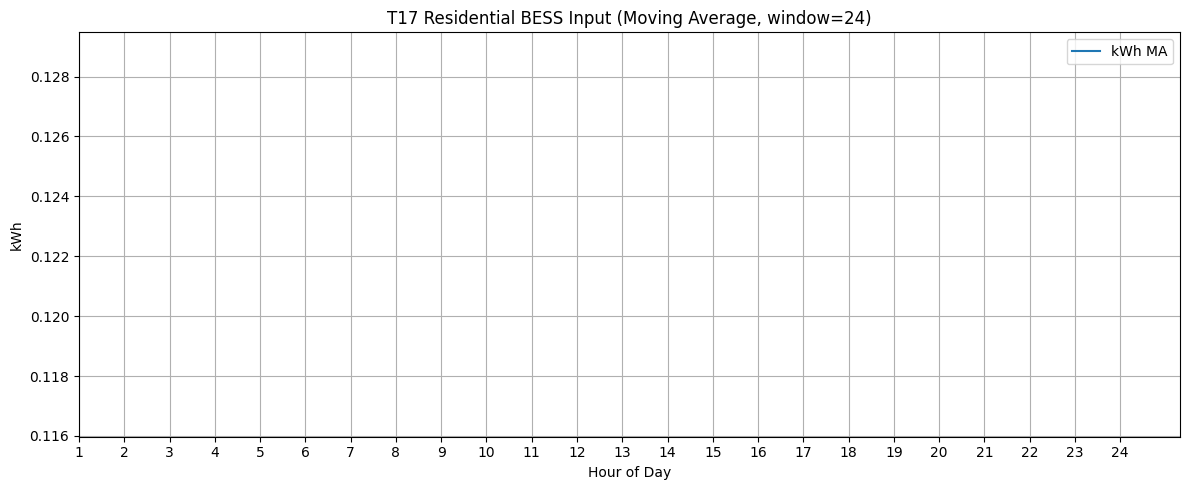

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

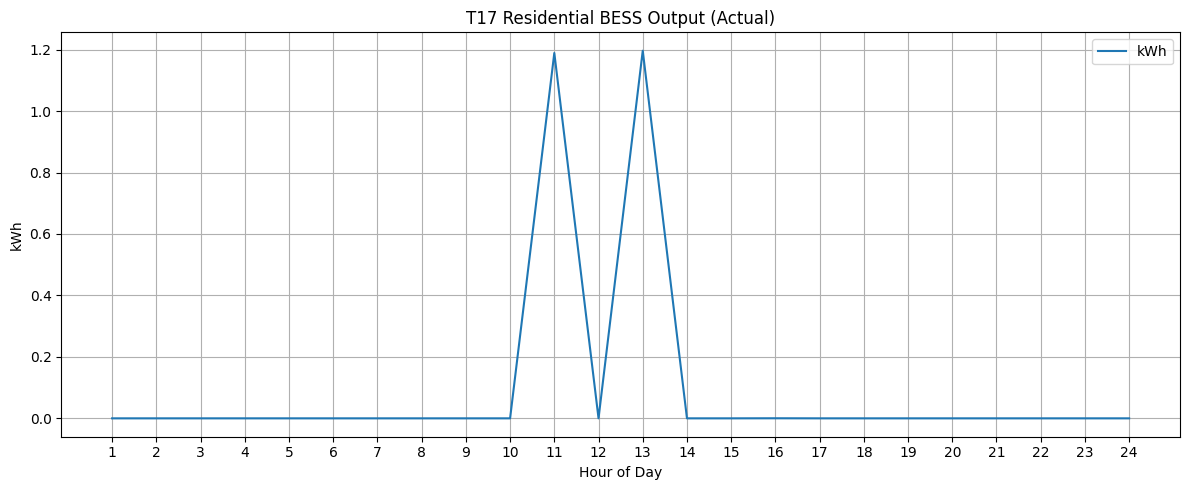

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

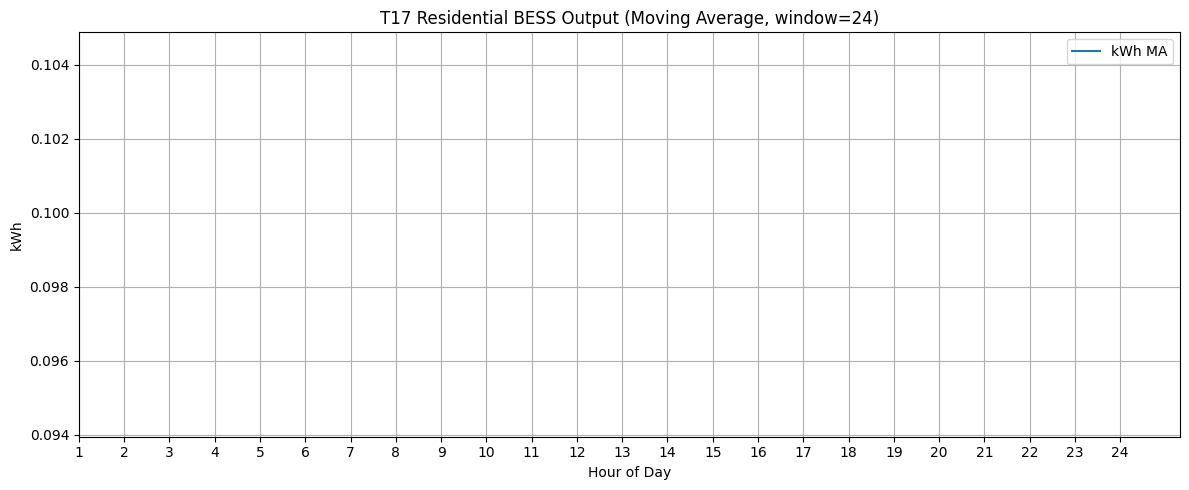

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

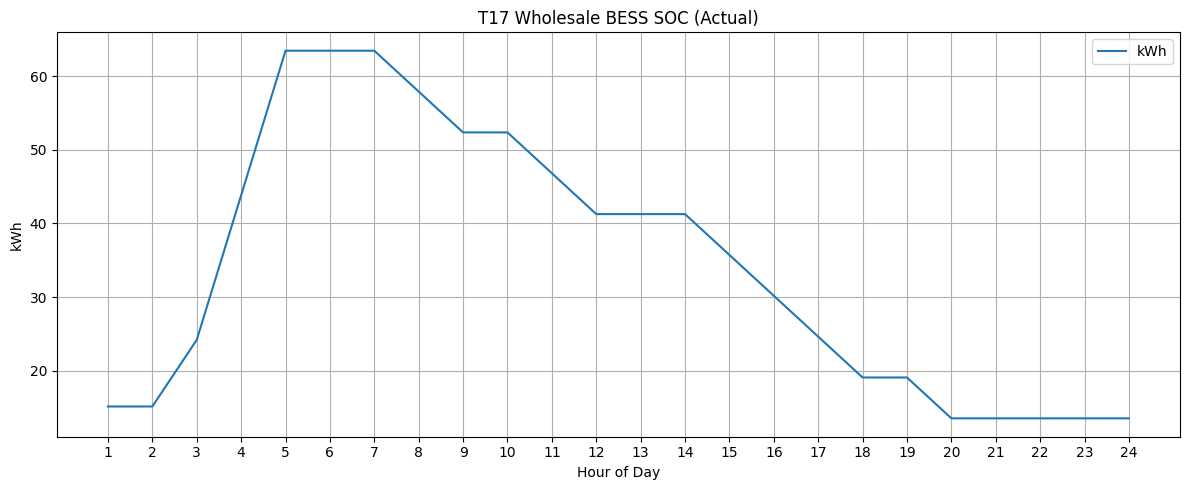

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

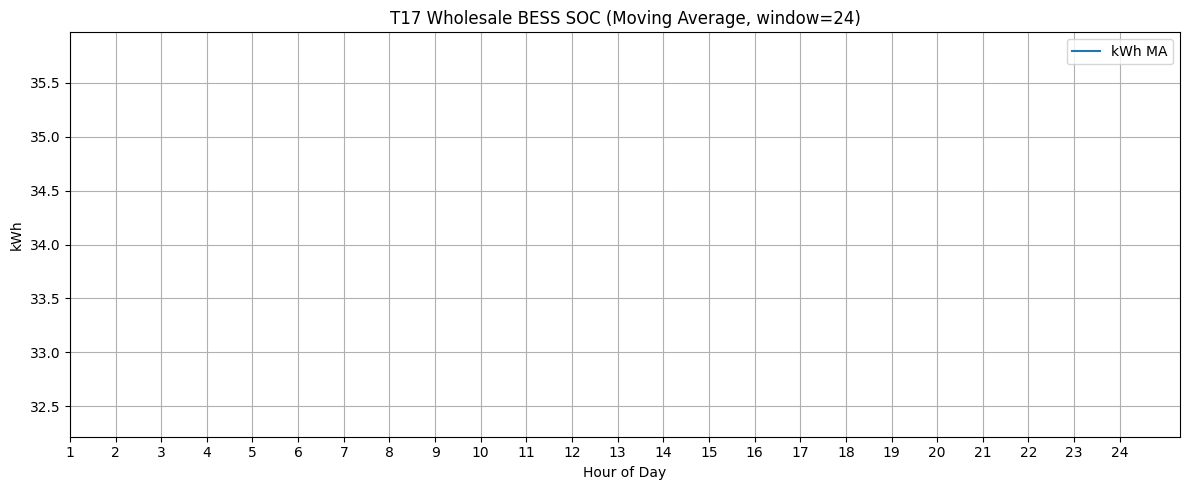

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

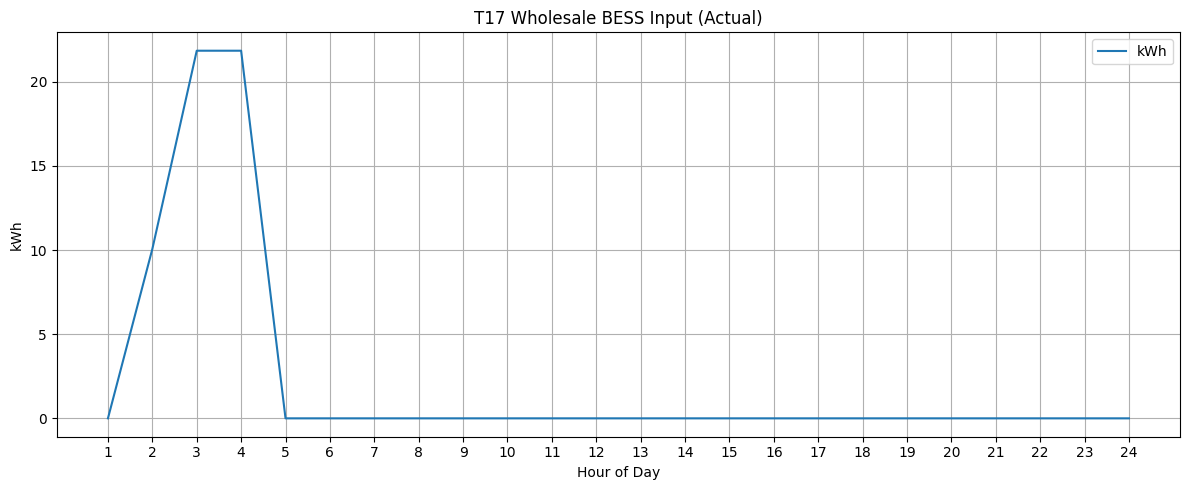

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

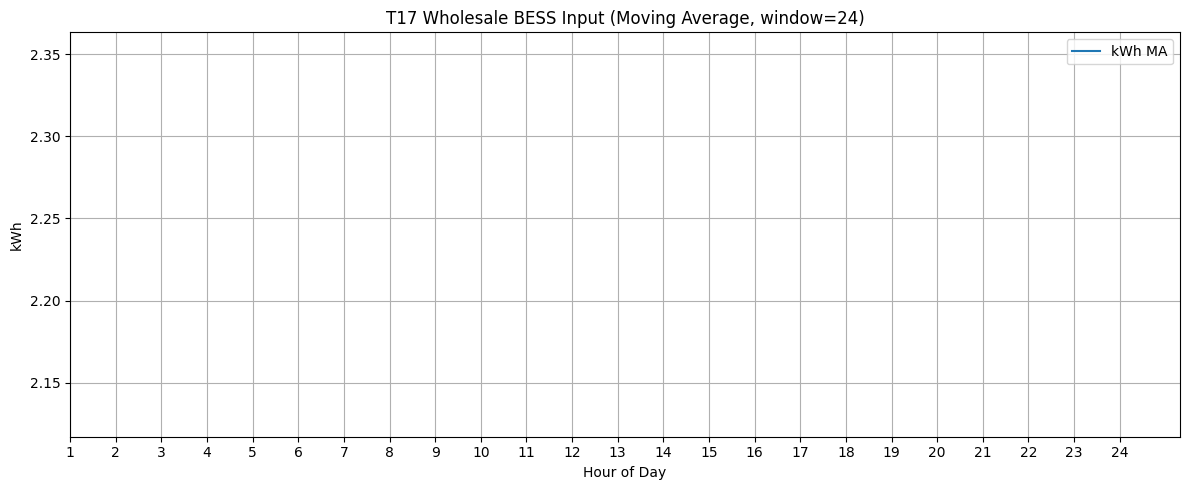

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

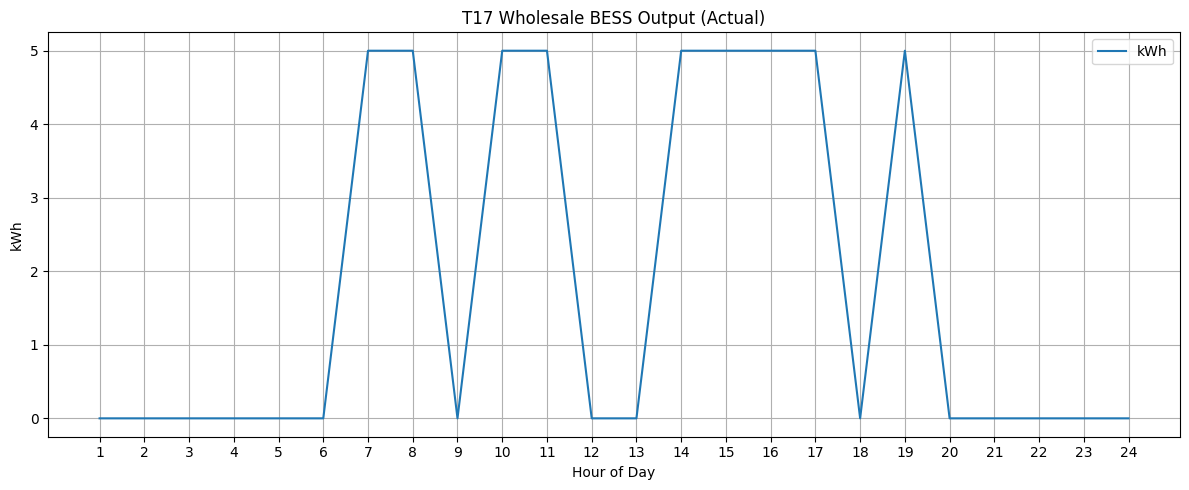

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

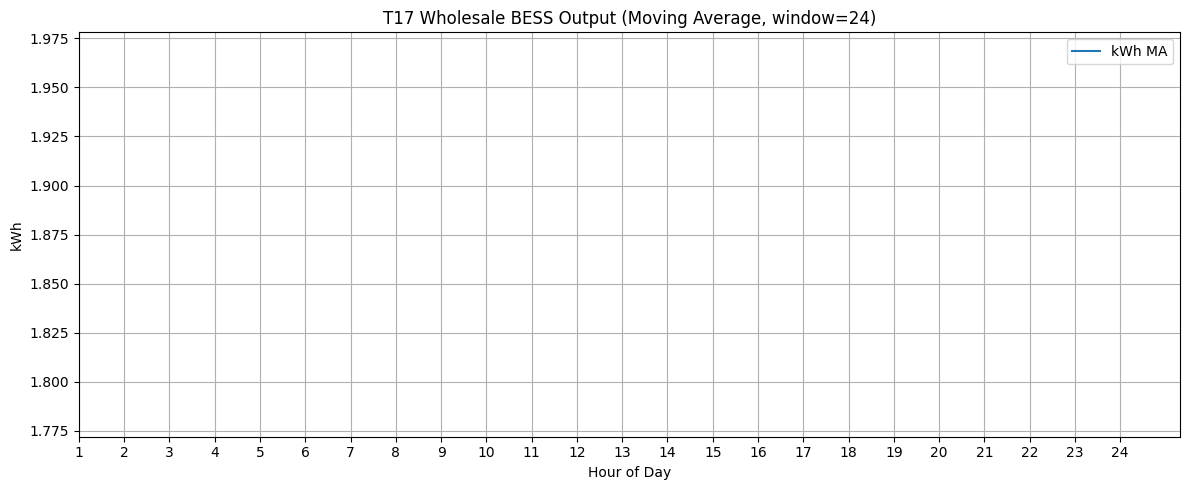

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# T17.5
soc_bess_r_vals = np.array([value(modelv1.SOC_BESS_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_r_vals}, f'{name} Residential BESS SOC', window=None)
pv_r_vals = np.array([value(modelv1.PV_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_r_vals}, f'{name} Residential PV', window=None)
bess_in_r_vals = np.array([value(modelv1.BESS_in_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_r_vals}, f'{name} Residential BESS Input', window=None)
bess_out_r_vals = np.array([value(modelv1.BESS_out_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_r_vals}, f'{name} Residential BESS Output', window=None)

soc_bess_w_vals = np.array([value(modelv1.SOC_BESS_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_w_vals}, f'{name} Wholesale BESS SOC', window=None)
pv_w_vals = np.array([value(modelv1.PV_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': pv_w_vals}, f'{name} Wholesale PV', window=None)
bess_in_w_vals = np.array([value(modelv1.BESS_in_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_w_vals}, f'{name} Wholesale BESS Input', window=None)
bess_out_w_vals = np.array([value(modelv1.BESS_out_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_w_vals}, f'{name} Wholesale BESS Output', window=None)

# T17.6
bess_in_r_vals = np.array([value(modelv1.BESS_in_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_r_vals}, f'{name} Residential BESS Input', window=24)
bess_out_r_vals = np.array([value(modelv1.BESS_out_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_r_vals}, f'{name} Residential BESS Output', window=24)

bess_in_w_vals = np.array([value(modelv1.BESS_in_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_w_vals}, f'{name} Wholesale BESS Input', window=24)
bess_out_w_vals = np.array([value(modelv1.BESS_out_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_w_vals}, f'{name} Wholesale BESS Output', window=24)

# T17.7
soc_bess_r_vals = np.array([value(modelv1.SOC_BESS_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_r_vals}, f'{name} Residential BESS SOC', window=24)
bess_in_r_vals = np.array([value(modelv1.BESS_in_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_r_vals}, f'{name} Residential BESS Input', window=24)
bess_out_r_vals = np.array([value(modelv1.BESS_out_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_r_vals}, f'{name} Residential BESS Output', window=24)

soc_bess_w_vals = np.array([value(modelv1.SOC_BESS_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': soc_bess_w_vals}, f'{name} Wholesale BESS SOC', window=24)
bess_in_w_vals = np.array([value(modelv1.BESS_in_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_in_w_vals}, f'{name} Wholesale BESS Input', window=24)
bess_out_w_vals = np.array([value(modelv1.BESS_out_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': bess_out_w_vals}, f'{name} Wholesale BESS Output', window=24)

# V-20

In [ ]:
# Testing for V-20
# T20.1
grid_imp_w_vals = np.array([value(modelv1.grid_imp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_imp_w_vals}, f'{name} Wholesale Import', window=24)
grid_imp_r_vals = np.array([value(modelv1.grid_imp_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_imp_r_vals}, f'{name} Residential Import', window=24)
grid_exp_w_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_exp_w_vals}, f'{name} Wholesale Export', window=24)

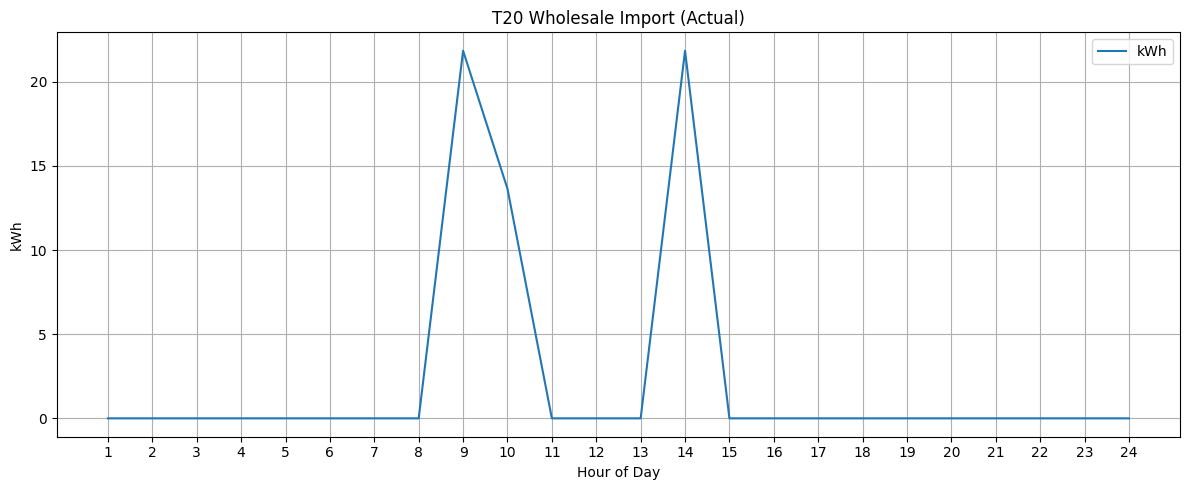

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

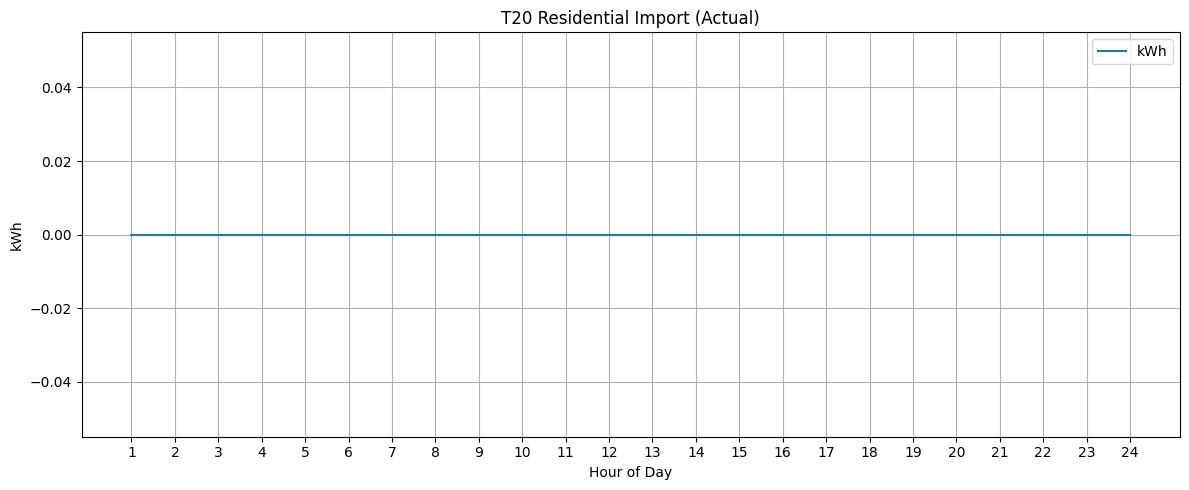

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

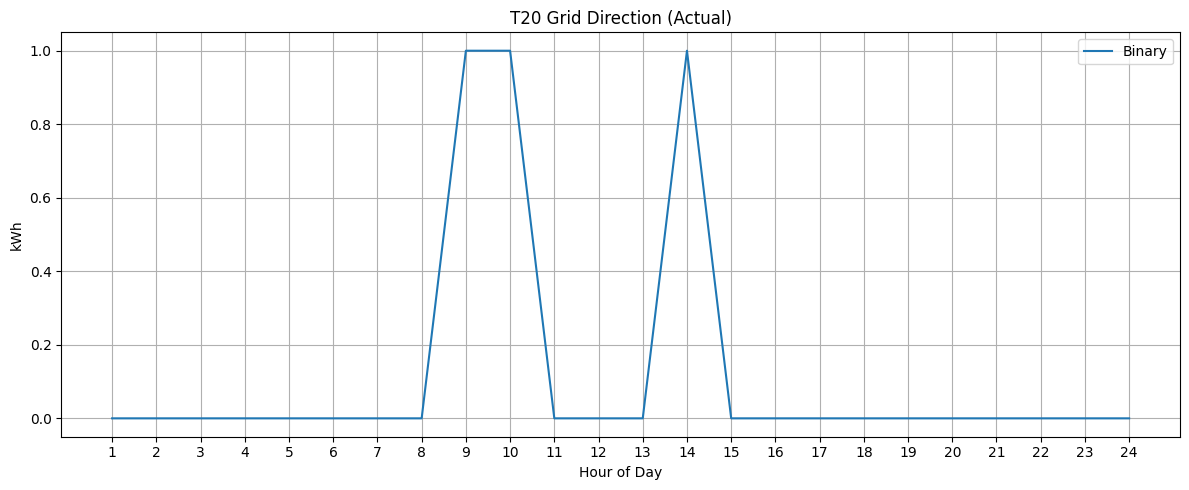

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

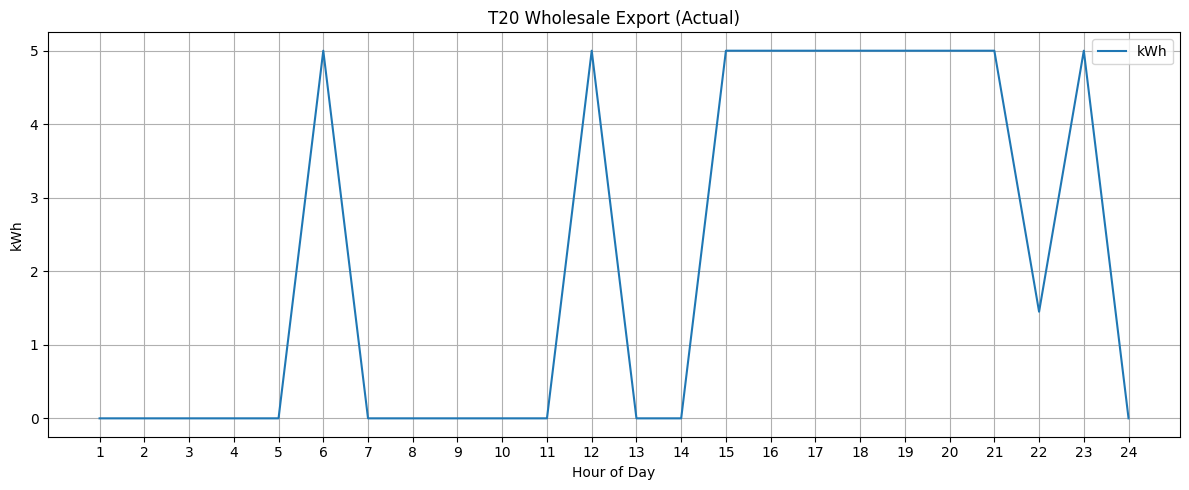

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

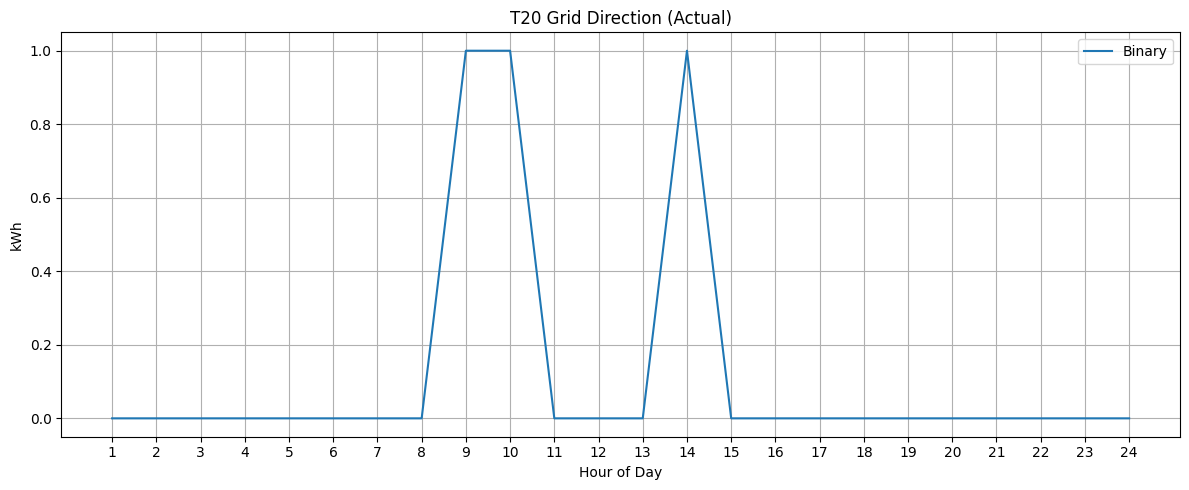

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# T20.2
grid_imp_w_vals = np.array([value(modelv1.grid_imp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_imp_w_vals}, f'{name} Wholesale Import', window=None)
grid_imp_r_vals = np.array([value(modelv1.grid_imp_R[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_imp_r_vals}, f'{name} Residential Import', window=None)
grid_dir_vals = np.array([value(modelv1.grid_dir[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary': grid_dir_vals}, f'{name} Grid Direction', window=None)

# T20.3
grid_exp_w_vals = np.array([value(modelv1.grid_exp_W[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'kWh': grid_exp_w_vals}, f'{name} Wholesale Export', window=None)
grid_dir_vals = np.array([value(modelv1.grid_dir[t]) for t in timesteps])[mask]
plot_series(filtered_dates, {'Binary': grid_dir_vals}, f'{name} Grid Direction', window=None)

# V-22